# **El precio del alquiler en España y agentes relacionados**<a id='0'></a>
![img](/Users/administrador/Documents/Bootcamp/EDA_Jose_Manuel_Gonzalez_Fornell/img/Notebook/Cabecera.png "Cabecera")

#### **Autor**  
---
* *Apellidos:* González Fornell  
* *Nombre:* José Manuel
* *Correo:* josemanuelgonzalezfornell@gmail.com
---

## **Índice**
---
1. [Introducción](#1)  
2. [Objetivo](#2)
3. [Hipótesis](#3)
4. [Exploración inicial](#4)  
    1. [Importación de librerías](#41)
    2. [Importación de bases de datos](#42)
    3. [Primera exploración de los DataFrame](#43)
        1. [Base de datos de alquileres por municipio](#431)
        2. [Base de datos de relación de comunidades autónomas (CCAA) con las provincias españolas](#432)
        3. [Base de datos de población por municipio](#433)
        4. [Base de datos del censo de vivendas en 2011](#434)
        5. [Base de datos de viviendas turísticas por municipio](#435)
        6. [Base de datos de turismo en España](436)
            1. [Turismo en 2020](#4361)
            2. [Turismo en 2021](#4362)
            3. [Turismo en 2022](#4363)
    4. [Depuración de bases de datos](#44)
        1. [Base de datos de alquileres por municipio](#441)
        2. [Base de datos de población por municipio](#442)
        3. [Base de datos de vivendas](#443)
        4. [Base de datos de viviendas turísticas](#444)
        5. [Base de datos de turismo en España](#445)
    5. [Merge y agregaciones](#45)
    6. [Análisis exploratorio de DataFrames resultantes](#46)
        1. [DataFrame final](#461)
        2. [DataFrame 2020 y 2021](#462)
    7. [Tratamiento de outliers](#47)
    8. [Exportación de los DataFrames](#48)
5. [Análisis estadístico](#5)
    1. [Análisis univariante](#51)
    2. [Análisis bivariante](#52)
    3. [Análisis multivariante](#53)
    4. [Respondiendo hipótesis](#54)
        1. [Correlación entre alquiler y población](#541)
        2. [Correlación entre alquiler y turismo](#542)
        3. [Aumento del alquiler en el tiempo](#543)
        4. [Correlación pisos turísticos y turismo](#544)
        5. [Correlación pisos turísticos y alquiler](#545)
        6. [El precio más alto es el del municipio con mayor población](#546)
        7. [Diferencia significativa entre alquiler de vivienda colectiva y alquiler de vivienda unifamiliar o rural](#547)
        8. [Diferencia entre pisos turísticos y pisos de alquiler dependiendo del turismo](#548)
6. [Conclusiones](#6)

---

## 1. Introducción<a id='1'></a>
  
El precio de la vivienda es un factor económico que afecta a toda la población. Las personas que son arrendatarias dedican un porcentaje de su sueldo a pagar la renta para poder vivir de forma independiente. En ciertas ciudades españolas, este porcentaje a pagar es muy elevado, pudiendo en ocasiones suponer en más del 50% de los ingresos del inquilino. De esta forma, la economía del arrendatario, y en general su vida íntegra, queda comprometida por este gasto elevado mensual. En consecuencia a este hecho, muchas personas se ven arrastradas a vivir compartiendo piso gran parte de su vida, a privarse de tener otros bienes materiales como un coche o incluso a tener que abstenerse de formar una familia.  
  
El entendimiento de los factores que condicionan el precio del alquiler en España y su evolución en el tiempo puede ser un buen punto de partida para investigar en que zonas es más rentable para el desarrollo de la vida del arrendatario.

## 2. Objetivo<a id='2'></a>
  
El objetivo de esta investigación es realizar un análisis exploratorio de datos (EDA, de sus siglas en inglés) del precio del alquiler en España en diferentes años y municipios para ver su evolución en el tiempo y la variación de precio dependiendo del lugar. Además, se tomaran en cuenta factores como la población, el turismo y la cantidad de pisos turísticos de la zona para comprobar si estos agentes intervienen de alguna manera en el precio del alquiler.

## 3. Hipótesis<a id='3'></a>
---
* *Hipótesis primaria:*  
  
**Cuanta mayor es la población de una zona, más altos son los precios del alquiler por metro cuadrado.**

---
* *Hipótesis secundarias:*  
    * A mayor turismo internacional recibido, mayor es el precio de los alquileres por metro cuadrado.
    * El precio del alquiler por metro cuadrado aumenta a medida que pasa el tiempo.
    * La cantidad de pisos turísticos es directamente proporcional a la cantidad de turismo internacional recibido en una zona.
    * En el caso de que la cantidad de pisos turísticos aumente, el precio del alquiler por metro cuadrado también aumentará.
    * El municipio con el precio del alquiler más alto es el municipio con mayor población.
    * Hay una diferencia significativa entre el precio del alquiler por metrocuadrado de la vivienda colectiva y el precio del alquiler de la vivienda unifamiliar o rural.
    * Existe más pisos turísticos que pisos de alquiler y esta diferencia es dependiente del turismo.

## 4. Exploración inicial y preparación de datos<a id='4'></a>

### 4.1. Importación de librerías<a id='41'></a>  
Lo primero que se realiza es la importación de las librerías necesarias para realizar el análisis. En este caso las librerías utilizadas son las siguientes:  
* Pandas. Importada con el pseudónimo "pd".
* Numpy. Importada con el pseudónimo "np".
* Regular expresion.
* Seaborn. Importada con el pseudónimo "sns".
* Functions. Librería propia importada con pseudónimo "fn"
* Matplotlib.pyplot. Importada con el pseudónimo "plt".
* Scipy.stats. Impotada con el pseudónimo "ss".
* La función filterwarnings() de la librería warnings.


In [1]:
# Importar librerias

import pandas as pd
import numpy as np
import re
import seaborn as sns
import utils.functions as fn
import matplotlib.pyplot as plt
import scipy.stats as ss
from warnings import filterwarnings


### 4.2. Importación de bases de datos<a id='42'></a>  
Se importan las bases de datos con las que se van a trabajar.  
  
Los datasets usados han sido obtenidos a través de la página del Instituto Nacional de Estadística (INE). Se han usado varios datasets para poder corroborar las hipótesis propuestas anteriormente:

1. Datos de viviendas en alquiler por municipios:
    
    Cantidad de viviendas en alquiler por municipios en España desde 2015 hasta 2021, junto con sus precios expuestos de diferentes formas. Además, este Dataset clasifica las viviendas en dos conjuntos dependiendo de la superficie de esta: Colectiva y Unifamiliar o Rural.  
      
    Los datos han sido obtenidos a partir de las tributaciones de los contribuyentes, por lo que no incluye los datos de los municipios pertenecientes a los fueros de País Vasco ni de la Comunidad Foral de Navarra.
      
    [Link del Dataset](https://www.mitma.gob.es/vivienda/alquiler/indice-alquiler)

2. Relación de municipios con Comunidades autónomas:  
      
    Relaciona los municipios de España con las comunidades autónomas a las que pertenecen.
  
    [Link del Dataset](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177031&menu=ultiDatos&idp=1254734710990)


3. Población por municipios españoles.  
      
    Población de los diferentes municipios españoles en total y por tramos de edad desde 2003 hasta 2022. También se incluye en este dataset los datos respecto a la población total nacional.
      
    [Link del Dataset](https://www.ine.es/jaxi/Tabla.htm?tpx=55200&L=0)

4. Censo de viviendas en España.
    
    Cantidad de edificios dedicados principal o exclusivamente a la vivienda en municipios de más de 2.000 habitantes hasta 2011 (fecha del último censo de viviendas realizado). En este Dataset se muestra además el estado de la vivienda y el año de construcción.
    
    [Link del Dataset](https://www.ine.es/jaxi/Tabla.htm?path=/t20/e244/edificios/p04/l0/&file=2mun00.px&L=0)

5. Censo de viviendas turísticas en España.  
  
    Cantidad de alquileres turísticos por municipios producidos en España en los meses de febrero y de agosto en los años 2020, 2021 y 2022. También se muestra las viviendas, las plazas por viviendas y solo las plazas turísticas.  
      
    Este Datasets fue obtenido mediante una técnica de Web Scraping en las 3 mayores páginas de alquiler turístico utilizadas.
    
    [Link del Dataset](https://www.ine.es/jaxiT3/Tabla.htm?t=39363)
  
6. Turismo internacional en España.
    
    Cantidad de turismo internacional recibida en España en los años 2020, 2021 y 2022 por municipio.
      
    Estos datos se obtuvieron a partir de la geolocaliación de dispositivos de telefonía móvil.
    
    [Link del Dataset](https://www.ine.es/dynt3/inebase/es/index.htm?padre=8578&capsel=8579)

In [2]:
# Ignora los warnings del todo el código
WarningFilter = filterwarnings("ignore")

In [3]:
# Datos de viviendas en alquiler por municipios
df_alq_m = pd.read_excel(
    "data/raw/Precio_alquiler_2015_21.xlsx", sheet_name="Municipios")

# Relación de municipios con Comunidades autónomas
relacion_c_p = pd.read_excel("data/raw/Relacion_CCAA_Provincia.xlsx")

# Población por municipios españoles
df_population = pd.read_csv(
    "data/raw/Poblacion_2003_22.csv", sep=";", dtype={"Total": str})

# Censo de viviendas en españa
df_livings = pd.read_csv("data/raw/Viviendas_2011.csv", sep=";")

# Censo de viviendas turisticas en españa
df_tourism_livings = pd.read_csv("data/raw/Viviendas_turisticas.csv", sep=";")

# Turismo internacional en españa 2020
df_tourism_20 = pd.read_excel(
    "data/raw/Turismo_internacional_2020.xlsx")

# Turismo internacional en españa 2021
df_tourism_21 = pd.read_excel(
    "data/raw/Turismo_internacional_2021.xlsx")

# Turismo internacional en españa 2022
df_tourism_22 = pd.read_excel(
    "data/raw/Turismo_internacional_2022.xlsx")


### 4.3. Primera exploración de los DataFrame<a id='43'></a>  
  
Tras la importación, se realiza una primera exploración de cada dataframe. De esta manera se podrá entender el funcionamiento y estructura de estos y se podrá saber como trabajar con ellos.  
  
Inicialmente se observa el número de filas y el número de columnas de los dataframes usando el atributo **shape**. También se visualizan los índices de columna del dataframe y los tipos de datos y la cantidad de valores no nulos contenidos en cada columna usando el método **info()**. En caso de que el dataframe contenga tantas columnas que no nos indique los valores no nulos, se usa el método **count()** para este mismo fin.  
  
Seguidamente, se observa las 5 primeras filas usando el método **head()**. Esto permite ver el formato de escritura de los datos y hacerse una idea de cómo está estructurado el dataframe.  
  
Finalmente, se realiza un pequeño e inicial análisis estadístico de los datos usando el método **describe()**.

#### 4.3.1. Base de datos de alquileres por municipio<a id='431'></a>

In [4]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_alq_m.shape[0]} filas. \n\t- {df_alq_m.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_alq_m.info()


El Dataframe tiene:
	- 7591 filas. 
	- 144 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Columns: 144 entries, CPRO_A to SLVM2_75_VU_21
dtypes: float64(140), int64(2), object(2)
memory usage: 8.3+ MB


In [5]:
# Recuento de valores no nulos tiene cada columna
df_alq_m.count()


CPRO_A                7591
NPRO                  7591
CUMUN_A               7591
NMUN                  7591
BI_ALVHEPCO_TVC_15    3083
                      ... 
SLVM2_25_VC_21        2181
SLVM2_75_VC_21        2181
SLVM2_M_VU_21         2693
SLVM2_25_VU_21        2693
SLVM2_75_VU_21        2693
Length: 144, dtype: int64

In [6]:
# Visualización de las 5 primeras filas del DataFrame
df_alq_m.head()


CPRO_A      NPRO  CUMUN_A       NMUN  BI_ALVHEPCO_TVC_15  \
0       2  Albacete     2001  Abengibre                 1.0   
1       2  Albacete     2002     Alatoz                 NaN   
2       2  Albacete     2003   Albacete              5334.0   
3       2  Albacete     2004   Albatana                 NaN   
4       2  Albacete     2005    Alborea                 2.0   

   BI_ALVHEPCO_TVU_15  ALQM2mes_LV_M_VC_15  ALQM2mes_LV_25_VC_15  \
0                 6.0                  NaN                   NaN   
1                 3.0                  NaN                   NaN   
2               185.0             4.318182              3.451251   
3                 NaN                  NaN                   NaN   
4                 2.0                  NaN                   NaN   

   ALQM2mes_LV_75_VC_15  ALQM2mes_LV_M_VU_15  ...  ALQTBID12_75_VC_21  \
0                   NaN                  NaN  ...                 NaN   
1                   NaN                  NaN  ...                 NaN   
2              5.217391             4.290084  ...               550.0   
3                   NaN                  NaN  ...                 NaN   
4                   NaN                  NaN  ...                 NaN   

   ALQTBID12_M_VU_21  ALQTBID12_25_VU_21  ALQTBID12_75_VU_21  SLVM2_M_VC_21  \
0                NaN                 NaN                 NaN            NaN   
1                NaN                 NaN                 NaN            NaN   
2              550.0               350.0          804.166667           93.0   
3                NaN                 NaN                 NaN            NaN   
4                NaN                 NaN                 NaN            NaN   

   SLVM2_25_VC_21  SLVM2_75_VC_21  SLVM2_M_VU_21  SLVM2_25_VU_21  \
0             NaN             NaN            NaN             NaN   
1             NaN             NaN            NaN             NaN   
2            76.0           112.0          215.0           117.0   
3             NaN             NaN            NaN             NaN   
4             NaN             NaN            NaN             NaN   

   SLVM2_75_VU_21  
0             NaN  
1             NaN  
2           263.0  
3             NaN  
4             NaN  

[5 rows x 144 columns]

In [7]:
# Breve análisis estadístico
df_alq_m.describe()


CPRO_A       CUMUN_A  BI_ALVHEPCO_TVC_15  BI_ALVHEPCO_TVU_15  \
count  7591.00000   7591.000000         3083.000000         4832.000000   
mean     26.45633  26585.072454          374.320791           32.099752   
std      14.99346  14990.590181         3818.321009           90.741249   
min       2.00000   2001.000000            0.000000            0.000000   
25%      13.00000  13008.500000            3.000000            2.000000   
50%      25.00000  25150.000000           15.000000            6.000000   
75%      41.00000  41047.500000          107.000000           23.000000   
max      52.00000  52001.000000       173199.000000         2135.000000   

       ALQM2mes_LV_M_VC_15  ALQM2mes_LV_25_VC_15  ALQM2mes_LV_75_VC_15  \
count          1747.000000           1747.000000           1747.000000   
mean              4.024457              3.173115              4.933578   
std               1.381893              1.188109              1.633403   
min               0.961538              0.677887              1.103090   
25%               3.010193              2.293380              3.735658   
50%               3.773585              2.970843              4.658548   
75%               4.761905              3.801098              5.842086   
max              10.229804              8.405596             12.777778   

       ALQM2mes_LV_M_VU_15  ALQM2mes_LV_25_VU_15  ALQM2mes_LV_75_VU_15  ...  \
count          1915.000000           1915.000000           1915.000000  ...   
mean              3.318241              2.236865              4.385760  ...   
std               1.235037              0.942927              1.546728  ...   
min               0.781808              0.434104              1.326808  ...   
25%               2.447769              1.515142              3.312636  ...   
50%               3.125000              2.111997              4.151907  ...   
75%               4.018198              2.781939              5.184123  ...   
max              10.909091              7.739219             14.177219  ...   

       ALQTBID12_75_VC_21  ALQTBID12_M_VU_21  ALQTBID12_25_VU_21  \
count         2181.000000        2693.000000         2693.000000   
mean           450.786980         442.785245          334.481114   
std            144.811672         184.818556          129.094237   
min            183.333333         125.000000           81.700000   
25%            350.000000         303.720000          250.000000   
50%            409.707256         400.000000          300.000000   
75%            504.145833         520.743312          400.000000   
max           1400.000000        1988.811881         1250.000000   

       ALQTBID12_75_VU_21  SLVM2_M_VC_21  SLVM2_25_VC_21  SLVM2_75_VC_21  \
count         2693.000000    2181.000000      2181.00000     2181.000000   
mean           576.984709      88.429161        72.65337      106.531178   
std            262.660330      13.499445        12.08332       19.570138   
min            150.000000      42.000000        36.00000       51.000000   
25%            400.000000      79.000000        65.00000       96.000000   
50%            502.161950      87.000000        71.50000      105.000000   
75%            683.910000      97.500000        79.50000      115.000000   
max           3000.000000     161.000000       119.00000      474.000000   

       SLVM2_M_VU_21  SLVM2_25_VU_21  SLVM2_75_VU_21  
count    2693.000000     2693.000000     2693.000000  
mean      173.058485      126.544374      242.242295  
std        43.460047       32.595807       69.430573  
min        61.000000       45.000000       88.000000  
25%       144.000000      104.000000      198.000000  
50%       168.000000      123.500000      233.000000  
75%       196.000000      145.000000      275.000000  
max       450.500000      340.000000     1083.000000  

[8 rows x 142 columns]

#### 4.3.2 Base de datos de relación de comunidades autónomas (CCAA) con las provincias españolas<a id='432'></a>

In [8]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {relacion_c_p.shape[0]} filas. \n\t- {relacion_c_p.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
relacion_c_p.info()


El Dataframe tiene:
	- 53 filas. 
	- 4 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CODAUTO             53 non-null     object 
 1   Comunidad Autónoma  52 non-null     object 
 2   CPRO                52 non-null     float64
 3   Provincia           52 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [9]:
# Visualización de las 5 primeras filas del DataFrame
relacion_c_p.head()


CODAUTO Comunidad Autónoma  CPRO Provincia
0       1          Andalucía   4.0   Almería
1       1          Andalucía  11.0     Cádiz
2       1          Andalucía  14.0   Córdoba
3       1          Andalucía  18.0   Granada
4       1          Andalucía  21.0    Huelva

In [10]:
# Breve análisis estadístico
relacion_c_p.describe()


CPRO
count  52.000000
mean   26.500000
std    15.154757
min     1.000000
25%    13.750000
50%    26.500000
75%    39.250000
max    52.000000

#### 4.3.3 Base de datos de población por municipio<a id='433'></a>

In [11]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_population.shape[0]} filas. \n\t- {df_population.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_population.info()


El Dataframe tiene:
	- 49792320 filas. 
	- 5 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49792320 entries, 0 to 49792319
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Sexo              object
 1   Municipios        object
 2   Edad (año a año)  object
 3   Periodo           object
 4   Total             object
dtypes: object(5)
memory usage: 1.9+ GB


In [12]:
# Recuento de valores no nulos tiene cada columna
df_population.count()


Sexo                49792320
Municipios          49792320
Edad (año a año)    49792320
Periodo             49792320
Total               49690422
dtype: int64

In [13]:
# Visualización de las 5 primeras filas del DataFrame
df_population.head()


Sexo      Municipios  Edad (año a año)             Periodo       Total
0  Total  Total Nacional  Todas las edades  1 de enero de 2022  47.475.420
1  Total  Total Nacional  Todas las edades  1 de enero de 2021  47.385.107
2  Total  Total Nacional  Todas las edades  1 de enero de 2020  47.450.795
3  Total  Total Nacional  Todas las edades  1 de enero de 2019  47.026.208
4  Total  Total Nacional  Todas las edades  1 de enero de 2018  46.722.980

In [14]:
# Breve análisis estadístico
df_population.describe()


Sexo      Municipios  Edad (año a año)             Periodo  \
count   49792320        49792320          49792320            49792320   
unique         3            8136               102                  20   
top        Total  Total Nacional  Todas las edades  1 de enero de 2022   
freq    16597440            6120            488160             2489616   

           Total  
count   49690422  
unique     39148  
top            0  
freq    12022180

#### 4.3.4 Base de datos del censo de viviendas en 2011<a id='434'></a>

In [15]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_livings.shape[0]} filas. \n\t- {df_livings.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_livings.info()


El Dataframe tiene:
	- 253880 filas. 
	- 5 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253880 entries, 0 to 253879
Data columns (total 5 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Estado del edificio                       253880 non-null  object
 1   Municipios (con más de 2.000 habitantes)  253880 non-null  object
 2   Año de construcción (agregado)            253880 non-null  object
 3   Tipo de indicador                         253880 non-null  object
 4   Total                                     253880 non-null  object
dtypes: object(5)
memory usage: 9.7+ MB


In [16]:
# Visualización de las 5 primeras filas del DataFrame
df_livings.head()


Estado del edificio Municipios (con más de 2.000 habitantes)  \
0               Total                            27001  Abadín   
1               Total                            27001  Abadín   
2               Total                            27001  Abadín   
3               Total                            27001  Abadín   
4               Total                            27001  Abadín   

  Año de construcción (agregado) Tipo de indicador  Total  
0                          Total         edificios  1.577  
1                          Total         inmuebles  1.662  
2                  Antes de 1900         edificios    421  
3                  Antes de 1900         inmuebles    422  
4                 De 1900 a 1920         edificios    226

In [17]:
# Breve análisis estadístico
df_livings.describe()


Estado del edificio Municipios (con más de 2.000 habitantes)  \
count               253880                                   253880   
unique                   5                                     2308   
top                  Total                            27001  Abadín   
freq                 50776                                      110   

       Año de construcción (agregado) Tipo de indicador   Total  
count                          253880            253880  253880  
unique                             11                 2    7869  
top                             Total         edificios      ..  
freq                            23080            126940   55236

#### 4.3.5 Base de datos de viviendas turísticas por municipio<a id='435'></a>

In [18]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_tourism_livings.shape[0]} filas. \n\t- {df_tourism_livings.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_tourism_livings.info()


El Dataframe tiene:
	- 122805 filas. 
	- 7 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122805 entries, 0 to 122804
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Total Nacional                    122805 non-null  object
 1   Comunidades y Ciudades Autónomas  122790 non-null  object
 2   Provincias                        122505 non-null  object
 3   Municipios                        121725 non-null  object
 4   Viviendas y plazas                122805 non-null  object
 5   Periodo                           122805 non-null  object
 6   Total                             106683 non-null  object
dtypes: object(7)
memory usage: 6.6+ MB


In [19]:
# Visualización de las 5 primeras filas del DataFrame
df_tourism_livings.head()


Total Nacional Comunidades y Ciudades Autónomas Provincias Municipios  \
0  Total Nacional                              NaN        NaN        NaN   
1  Total Nacional                              NaN        NaN        NaN   
2  Total Nacional                              NaN        NaN        NaN   
3  Total Nacional                              NaN        NaN        NaN   
4  Total Nacional                              NaN        NaN        NaN   

     Viviendas y plazas  Periodo    Total  
0  Viviendas turísticas  2022M08  311.518  
1  Viviendas turísticas  2022M02  285.868  
2  Viviendas turísticas  2021M08  306.974  
3  Viviendas turísticas  2021M02  294.698  
4  Viviendas turísticas  2020M08  321.496

In [20]:
# Breve análisis estadístico
df_tourism_livings.describe()


Total Nacional Comunidades y Ciudades Autónomas Provincias  \
count           122805                           122790     122505   
unique               1                               19         52   
top     Total Nacional               07 Castilla y León  09 Burgos   
freq            122805                            33870       5580   

           Municipios    Viviendas y plazas  Periodo   Total  
count          121725                122805   122805  106683  
unique           8115                     3        5    3569  
top     04013 Almería  Viviendas turísticas  2022M08       0  
freq               15                 40935    24561   32244

#### 4.3.6 Bases de datos de turismo en España<a id='436'></a>

##### 4.3.6.1 Turismo en 2020<a id='4361'></a>

In [21]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_tourism_20.shape[0]} filas. \n\t- {df_tourism_20.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_tourism_20.info()


El Dataframe tiene:
	- 254003 filas. 
	- 8 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254003 entries, 0 to 254002
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   mes            254003 non-null  object
 1   pais_orig_cod  254003 non-null  int64 
 2   pais_orig      254003 non-null  object
 3   mun_dest_cod   254003 non-null  int64 
 4   mun_dest       254003 non-null  object
 5   turistas       254003 non-null  int64 
 6   prov_dest_cod  254003 non-null  int64 
 7   prov_dest      254003 non-null  object
dtypes: int64(4), object(4)
memory usage: 15.5+ MB


In [22]:
# Visualización de las 5 primeras filas del DataFrame
df_tourism_20.head()


mes  pais_orig_cod            pais_orig  mun_dest_cod  \
0  2020-01              0                Total          1001   
1  2020-01             10         Total Europa          1001   
2  2020-01             11  Total Unión Europea          1001   
3  2020-01              0                Total          1002   
4  2020-01             10         Total Europa          1002   

           mun_dest  turistas  prov_dest_cod    prov_dest  
0  Alegría-Dulantzi        87              1  Araba/Álava  
1  Alegría-Dulantzi        72              1  Araba/Álava  
2  Alegría-Dulantzi        67              1  Araba/Álava  
3           Amurrio       320              1  Araba/Álava  
4           Amurrio       298              1  Araba/Álava

In [23]:
# Breve análisis estadístico
df_tourism_20.describe()


pais_orig_cod   mun_dest_cod       turistas  prov_dest_cod
count  254003.000000  254003.000000  254003.000000  254003.000000
mean       68.095042   24393.193506     441.785735      24.282213
std        78.966777   14508.243853    3432.605814      14.503921
min         0.000000    1001.000000      30.000000       1.000000
25%        10.000000   10169.000000      46.000000      10.000000
50%        20.000000   24134.000000      82.000000      24.000000
75%       121.000000   37040.000000     208.000000      37.000000
max       505.000000   52001.000000  472152.000000      52.000000

##### 4.3.6.2 Turismo en 2021<a id='4362'></a>

In [24]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_tourism_21.shape[0]} filas. \n\t- {df_tourism_21.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_tourism_21.info()


El Dataframe tiene:
	- 274198 filas. 
	- 8 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274198 entries, 0 to 274197
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   mes            274198 non-null  object
 1   pais_orig_cod  274198 non-null  int64 
 2   pais_orig      274198 non-null  object
 3   mun_dest_cod   274198 non-null  int64 
 4   mun_dest       274198 non-null  object
 5   turistas       274198 non-null  int64 
 6   prov_dest_cod  274198 non-null  int64 
 7   prov_dest      274198 non-null  object
dtypes: int64(4), object(4)
memory usage: 16.7+ MB


In [25]:
# Visualización de las 5 primeras filas del DataFrame
df_tourism_21.head()


mes  pais_orig_cod            pais_orig  mun_dest_cod mun_dest  \
0  2021-01              0                Total          1002  Amurrio   
1  2021-01             10         Total Europa          1002  Amurrio   
2  2021-01             11  Total Unión Europea          1002  Amurrio   
3  2021-01            110              Francia          1002  Amurrio   
4  2021-01            121         Países Bajos          1002  Amurrio   

   turistas  prov_dest_cod    prov_dest  
0       313              1  Araba/Álava  
1       302              1  Araba/Álava  
2       287              1  Araba/Álava  
3        48              1  Araba/Álava  
4        37              1  Araba/Álava

In [26]:
# Breve análisis estadístico
df_tourism_21.describe()


pais_orig_cod   mun_dest_cod       turistas  prov_dest_cod
count  274198.000000  274198.000000  274198.000000  274198.000000
mean       72.119312   24330.297424     532.983585      24.219848
std        78.288290   14425.164905    3892.015787      14.421020
min         0.000000    1002.000000      30.000000       1.000000
25%        10.000000   10164.000000      47.000000      10.000000
50%        33.000000   24116.000000      87.000000      24.000000
75%       121.000000   36057.000000     229.000000      36.000000
max       504.000000   52001.000000  358891.000000      52.000000

##### 4.3.6.3 Turismo en 2022<a id='4363'></a>

In [27]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_tourism_22.shape[0]} filas. \n\t- {df_tourism_22.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_tourism_22.info()


El Dataframe tiene:
	- 332118 filas. 
	- 8 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332118 entries, 0 to 332117
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   mes            332118 non-null  object
 1   pais_orig_cod  332118 non-null  int64 
 2   pais_orig      332118 non-null  object
 3   mun_dest_cod   332118 non-null  int64 
 4   mun_dest       332118 non-null  object
 5   turistas       332118 non-null  int64 
 6   prov_dest_cod  332118 non-null  int64 
 7   prov_dest      332118 non-null  object
dtypes: int64(4), object(4)
memory usage: 20.3+ MB


In [28]:
# Visualización de las 5 primeras filas del DataFrame
df_tourism_22.head()


mes  pais_orig_cod            pais_orig  mun_dest_cod mun_dest  \
0  2022-01              0                Total          1002  Amurrio   
1  2022-01             10         Total Europa          1002  Amurrio   
2  2022-01             11  Total Unión Europea          1002  Amurrio   
3  2022-01            110              Francia          1002  Amurrio   
4  2022-01            121         Países Bajos          1002  Amurrio   

   turistas  prov_dest_cod    prov_dest  
0       256              1  Araba/Álava  
1       231              1  Araba/Álava  
2       218              1  Araba/Álava  
3        52              1  Araba/Álava  
4        39              1  Araba/Álava

In [29]:
# Breve análisis estadístico
df_tourism_22.describe()


pais_orig_cod   mun_dest_cod       turistas  prov_dest_cod
count  332118.000000  332118.000000  332118.000000  332118.000000
mean       79.489492   24123.706499     824.224152      24.014537
std        86.011597   14390.214007    7332.289719      14.385012
min         0.000000    1001.000000      30.000000       1.000000
25%        10.000000   10069.000000      49.000000      10.000000
50%       102.000000   24031.000000      93.000000      24.000000
75%       122.000000   36050.000000     255.750000      36.000000
max       505.000000   52001.000000  628197.000000      52.000000

### 4.4. Depuración de bases de datos<a id='44'></a>  
  
Tras la primera exploración y toma de contacto con las base de datos a trabajar, se procede a realizar la depuración de los datos. En este proceso se eliminarán los datos no deseados y se trataran los valores nulos de las base de datos.

#### 4.4.1 Base de datos de alquileres por municipio<a id='441'></a>    
  
Se revisa la documentación de esta base da datos puesto que los títulos de las columnas no son autoexplicativos (no es el caso de las demás base de datos con las que se trabajarán, por lo que esto no se hará con el resto). A continuación, en la *Tabla 1* se detalla el significado del título de cada columna y el tipo de valor que contiene cada columna:  
  
><span style="font-size: 10px;">***Tabla 1.** Leyenda de los nombre de cada columna de la base de datos de alquileres por municipio y los tipos de valores que contiene cada columna.*</span>
>| **Código** | **Significado** | **tipo de valor** |
>|------------|-----------------|-------------------|
>| **CPRO**        | Código de Provincia Censo Población 2011 INE (numérico) | INT |
>| **NPRO** | Nombre de Provincia Censo Población 2011 INE | VARCHAR(50) |
>| **CUMUN** | Código único de Municipio Censo Población 2011 INE (numérico) | INT |
>| **NMUN** | Nombre de Municipio Censo Población 2011 INE | VARCHAR(50) |
>| **BI_ALVHEPCO_TVC_AA** | Recuento subconjunto alquiler Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | INT |
>| **BI_ALVHEPCO_TVU_AA** | Recuento subconjunto alquiler Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | INT |
>| **ALQM2mes_LV_M_VC_AA** | Alquiler mensual m2 mediano m2 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQM2mes_LV_25_VC_AA** | Alquiler mensual m2 percentil 25 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQM2mes_LV_75_VC_AA** | Alquiler mensual m2 percentil 75 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQM2mes_LV_M_VU_AA** | Alquiler mensual m2 mediano m2 Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **ALQM2mes_LV_25_VU_AA** | Alquiler mensual m2 percentil 25 Grupo GGT01 VC: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **ALQM2mes_LV_75_VU_AA** | Alquiler mensual m2 percentil 75 Grupo GGT01 VC: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **ALQTBID12_M_VC_AA** | Alquiler mensual todo el bien inmueble mediana Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQTBID12_25_VC_AA** | Alquiler mensual todo el bien inmueble percentil 25 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQTBID12_75_VC_AA** | Alquiler mensual todo el bien inmueble percentil 75 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **ALQTBID12_M_VU_AA** | Alquiler mensual todo el bien inmueble mediana Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **ALQTBID12_25_VU_AA** | Alquiler mensual todo el bien inmueble percentil 25 Grupo GGT01 VC: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **ALQTBID12_75_VU_AA** | Alquiler mensual todo el bien inmueble percentil 75 Grupo GGT01 VC: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **SLVM2_M_VC_AA** | Superficie m2 mediana Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **SLVM2_25_VC_AA** | Superficie m2 percentil 25 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **SLVM2_75_VC_AA** | Superficie m2 percentil 75 Grupo GGT01 VC: Vivienda Colectiva como tipología de más superficie | FLOAT |
>| **SLVM2_M_VU_AA** | Superficie m2 mediana Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **SLVM2_25_VU_AA** | Superficie m2 percentil 25 Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>| **SLVM2_75_VU_AA** | Superficie m2 percentil 75 Grupo GGT01 VU: Vivienda Unifamiliar o Rural como tipología de más superficie | FLOAT |
>
>*La denominación del campo se marca al final con "_AA" para señalar el año*
  
De esta base de datos, solo se requieren las columnas que contienen los siguientes datos:
* Códigos de provincia (**CPRO**)
* Nombre de la provincia (**NPRO**)
* Código único de municipio (**CUMUN**)
* Nombre de municipio (**NMUN**)
* Recuento de alquileres tanto de vivienda colectiva como de vivienda unifamiliar o rural (**BI_ALVHEPCO_TVC_AA** y **BI_ALVHEPCO_TVU_AA**)
* Mediana del alquiler mensual por metro cuadrado en viviendas colectivas y unifamiliares o rurales (**ALQM2mes_LV_M_VC_AA** y **ALQM2mes_LV_M_VU_AA**)  
  
El resto de columnas que no contienen datos de interés para el propásito de este EDA son eliminadas. Para ello se realiza un bucle **for** en las columnas del dataframe con el atributo **columns** para recorrer los índices de las columnas. Dentro del bucle, usando un condicional **if** y expresiones regulares se eliminan las columnas que no coinciden con nuestras expresiones regulares o nuestros títulos deseados usando el método **drop**.

In [30]:
# ReGex que permite detectar las columnas que contienen la mediana del alquiler mensual por metro cuadrado en viviendas colectivas y unifamiliares o rurales de todos los años propuestos
median = r'^ALQM2mes_LV_M.*'

# ReGex que permite detectar las columnas que contienen el recuento de alquileres de viviendas colectivas y unifamiliares o rurales de todos los años propuestos.
count = r'^BI_ALVHEPCO.*'

# Elimina las columnas no deseadas del DataFrame
for col_name in df_alq_m.columns:
    if not re.search(median, col_name) and col_name != "CPRO_A" and col_name != "NPRO" and col_name != "CUMUN_A" and col_name != "NMUN" and not re.search(count, col_name):
        df_alq_m.drop(col_name, inplace=True, axis=1)


Seguidamente, se determina la columna **NMUN** como índice del DataFrame, ya que a partir de este momento, se trabajará con los nombres de municipios como índice de todas las bases de datos. Para ello se utiliza el método **set_index()**.

In [31]:
# Determina la columna NMUN como índice del DataFrame
df_alq_m.set_index(["NMUN"], inplace=True)


Posteriormente, se eliminan las columnas y las filas donde todos los valores son nulos, puesto que estas filas no son de utilidad. A la hora de eliminar las filas no se tendran en cuenta las columnas **CPRO_A**, **NPRO** ni **CUMUN_A** debido a que una instancia, aunque tenga valores no nulos en estas columnas, si en el resto de columnas todos los valores son nulos, estas instancias no contienen datos de relevancia. Para esta tarea se utiliza el método **dropna()**.

In [32]:
# Elimina las columnas y filas donde todos los valores son nulos. No se tienen en cuenta las columnas CPRO_A, NPRO ni CUMUN_A a la hora de eliminar las filas con valores nulos.
df_alq_m.dropna(axis=1, how='all', inplace=True)
df_alq_m.dropna(axis=0, how='all', inplace=True,
                subset=df_alq_m.columns.drop(["CPRO_A", "NPRO", "CUMUN_A"]))


Después, se cambia la forma en la que se indican los años en los índices de las columnas para que aparezcan 4 dígitos en vez de dos. Para ello se usa un bucle **for** sobre el índice de columnas del DataFrame usando el atributo **columns**. Dentro del bucle, se usa el método **replace()** junto con expresiones regulares para obtener el cambio de formato de los años.

In [33]:
# Año por el cual se comienza el bucle
age = 15

# Siglo que se añadirá antes del año
century = 20

# Permita sustituir el formato de dos dígitos por 4 dígitos en los años del índice de columnas
for num in range(7):
    df_alq_m.columns = df_alq_m.columns.str.replace(
        f"{age}$", str(century)+str(age), regex=True)
    age += 1


Finalmente, los valores nulos son cambiados por la media de la provincia usando el el método **fillna()**, junto con la función **groupby()** y **transform()** para obtener la media por provincias. Son cambiados por estos datos debido a que, de esta manera, no se obtienen outliers y el análisis se ajusta más a la realidad.

In [34]:
medias_NPRO = df_alq_m.groupby("NPRO").transform("mean")
df_alq_m = df_alq_m.fillna(medias_NPRO)


#### 4.4.2 Base de datos de población por municipios<a id='442'></a>  
  
De esta base de datos únicamente son de interés para el objetivo de este EDA los valores de población totales, sin estar clasificado por sexos ni por edades, de todos los municipios. Por ello se realiza una máscara para filtrar estos datos y desechar el resto.

In [35]:
# Máscara para obtener los datos de la población total, independientemente del sexo y la edad, por municipios
mask = (df_population["Sexo"] == "Total") & (df_population["Edad (año a año)"]
                                             == "Todas las edades") & ~ (df_population["Municipios"] == "Total Nacional")

# Filtra los datos deseados
df_population = df_population[mask]


Una vez obtenidos los datos deseados, se procede a cambiar el separador decimal de la columna **TOTAL** de coma a punto, con el método **replace()**, y a cambiar el formato de los datos de esta columna a float, con el método **astype()**. También se cambian los datos de la columna **Periodo** paraque muestre únicamente el año del periodo y se cambia el formato de los datos de esta columna a datetime64[Y] usando el método **astype()**. Además, para que únicamente se muestre el año, se usa el atributo **dt.year**. Además, se elimina de la columna **Municipios** todo lo que no sea el nombre del municipio usando el método **replace()** con expresiones regulares.

In [36]:
# Cambia el formato de la columna Total a float
df_population["Total"] = df_population["Total"].str.replace(
    ".", "").astype(float)

# Cambia el formato de la columna Perido a datetime64[Y] y muestra únicamente el año
df_population["Periodo"] = df_population["Periodo"].str[-4:].astype(
    "datetime64[Y]").dt.year

# Elimina de la columna Municipios todo lo que no sea el nombre del municipio
df_population['Municipios'].replace(r'^(\d+) ', '', regex=True, inplace=True)


Finalmente, se realiza una tabla pivote, usando el método **pivot_table()**, para obtener una tabla que tenga como índice los municipios y como columnas las poblaciones totales de cada municipio desglosada por años. Además, se utiliza el método **add_prefix()** para añadir el prefijo **Población_** a los índices de columnas.

In [37]:
# Crea tabla pivote con los datos de población desglosadas por año y los municipios como índice.
df_population = df_population.pivot_table(
    index="Municipios", columns="Periodo").add_prefix("Poblacion_")
df_population = df_population["Poblacion_Total"]


#### 4.4.3 Base de datos de viviendas<a id='443'></a>    
    
De esta base de datos únicamente son de interés los datos de los inmuebles totales por municipios. Por ello, se usa un filtro para obtener únicamente estos datos. Además, se requiere que se muestren los nombres de los municipios como índice y los inmuebles totales como columna. Para obtener un DataFrame con esas características, antes del filtrado se determina como índice del DataFrame la columna **Municipios (con más de 2.000 habitantes)** usando el método **set_index()** y junto al filtrado se determina que solo se muestre la columna **Total**.  
  
También se cambia el nombre de la columna **Total** a **Inmuebles_totales** usando el método **rename()**.

In [38]:
# Determina la columna Municipios como índice del DataFrame
df_livings.set_index('Municipios (con más de 2.000 habitantes)', inplace=True)

# Filtra para obtener únicamente la columna Total con los datos de inmuebles totales por municipio
df_livings = df_livings[(df_livings["Estado del edificio"] == "Total") & (
    df_livings["Año de construcción (agregado)"] == "Total") & (df_livings["Tipo de indicador"] == "inmuebles")][["Total"]]

# Cambia el nombre de la columna Total
df_livings.rename(columns={"Total": "Inmuebles_totales"}, inplace=True)


Una vez obtenido un DataSet con los datos deseados, cambiamos el índice para que únicamente aparezca el nombre de los municipios, sin el código postal, usando la función **replace()** junto con expresiones regulares. Esto se realiza para que el índice tenga el mismo formato que los demás DataSet que han sido depurados y el futuro merge sea más sencillo.  
  
Además, usando la misma función que anteriormente, se elimina el separador millares de la columna **Inmuebles_totales**. También se cambia el formato de los datos a float usando el método **astype()**.

In [39]:
# Elimina de la columna Municipios todo lo que no sea el nombre del municipio
df_livings.index = df_livings.index.str.replace(
    r'^(\d+ ) ', '', regex=True)

# Elimina el separador de millares de la columna Inmuebles_totales y cambia el formato a float
df_livings["Inmuebles_totales"] = df_livings["Inmuebles_totales"].str.replace(
    ".", "").astype(float)


#### 4.4.4 Base de datos de viviendas turísticas<a id='444'></a>    
  
En esta base de datos, únicamente son de interés las viviendas turísticas por municipio clasificadas por año. Por ello se realiza un filtro para obtener dichos datos.

In [40]:
# Filtra las viviendas turísticas por municipios y clasificadas por año
df_tourism_livings = df_tourism_livings[df_tourism_livings["Viviendas y plazas"]
                                        == "Viviendas turísticas"][["Municipios", "Periodo", "Total"]]


Tras obtener los datos deseados, se les aporta el formato deseado. Inicialmente, al igual que se ha realizado anteriormente en el resto de DataSets, se elimina de la columna **Municipios** todo aquello que no sea el nombre del municipio usando la función **replace()** junto con expresiones regulares. Posteriormente, se elimina el separador de millares de la columna **Total** usando el mismo método. Además, se formatea los datos de esta columna a enteros usando el método **astype()**. También se modifica la columna **Periodo** para que tenga un formato datetime64[Y] usando los métodos anteriormente menciones. Para que la columna periodo muestre únicamente el año, se usa el atributo **dt.year**.

In [41]:
# En la columna Municipios muestra únicamente el nombre del municipio
df_tourism_livings['Municipios'].replace(
    r'^(\d+) ', '', regex=True, inplace=True)

# Elimina el separador de millares de la columna Total y formatea los datos a integer
df_tourism_livings["Total"] = df_tourism_livings["Total"].str.replace(
    ".", "").astype(int)

# Elimina todo lo que no sea el año de la columna Periodo, la formatea a datetime64[Y] y muestra únicamente el año
df_tourism_livings["Periodo"] = df_tourism_livings["Periodo"].str.replace(
    r"M\d{2}", "", regex=True).astype("datetime64[Y]").dt.year


Finalmente, se realiza una tabla pivote, usando el método **pivot_table()**, que contenga los municipios como índice y los valores totales de viviendas turísticas divididos por año. Al producir esta tabla pivote se usa la función de agregado suma para sumar las viviendas turísticas de todos los meses de cada año. Además, se le agrega el prefijo **Viviendas_turisticas_** a los índices de columna.

In [42]:
# Produce una tabla pivote con los municipios por índice y los valores totales de las viviendas turísticas divididas por año como columnas
df_tourism_livings = df_tourism_livings.pivot_table(
    index="Municipios", columns="Periodo", values="Total", aggfunc="sum").add_prefix("Viviendas_turisticas_")


#### 4.4.5 Base de datos de turismo<a id='445'></a>    
  
Los datos del turismo están divididos en 3 DataFrames diferentes para cada uno de los años. Sin embargo, el formato de estos 3 DataFrame es el mismo, por lo que para trabajar con ellos se creara una lista con los tres DataSets y se recorrerá dicha lista con un bucle **for**, aplicando la modificaciones necesarias.  
  
Lo primero que se realiza es el formateo de la columna **mes**, aplicándole un formato datetime64[Y] usando el método **astype()** y mostrando únicamente el año con el atributo **dt.year**. Seguidamente, se crea una tabla pivote, donde el índice es el municipio de destino y las columnas son los turistas totales por año. Esto se realiza usando la función **pivottable()** junto con la función de agregación **sum**. Tras la creación de la tabla pivote, se agrega el prefijo **Turistas_** a los índices de columna. Por último, se mergea todas las tablas pivotes creadas con el bucle usando el método **merge()**.

In [43]:
# Lista con los dataframes con los datos de turismo por municipio y año
df_tourism = [df_tourism_20, df_tourism_21, df_tourism_22]

# Variable donde se va a guardar el dataframe final tras depurar los datos de turismo
df_tourism_total = None

# Recorre los dataframe de turismo
for dataframe in df_tourism:
    # Formatea la columna mes a datetime64[Y] y muestra únicamente el año
    dataframe["mes"] = dataframe["mes"].astype("datetime64[Y]").dt.year
    # Crea una tabla pivote con los municipios como índice y el turismo total anual como columnas
    if df_tourism_total is None:
        df_tourism_total = dataframe.pivot_table(
            index="mun_dest", columns="mes", values="turistas", aggfunc="sum").add_prefix("Turistas_")
    elif df_tourism_total is not None:
        df_tourism_total = pd.merge(df_tourism_total, dataframe.pivot_table(
            index="mun_dest", columns="mes", values="turistas", aggfunc="sum").add_prefix("Turistas_"), left_index=True, right_index=True)


### 4.5. Merge y agregaciones<a id='45'></a>  
  
Una vez se depuran todos los datos de todas las bases de datos se procede a hacer un merge de todas las bases de datos. Primero, se realiza un merge de los datos de alquiler con la relación de CCAA con los municipios. Para este merge, toma de la base de datos de relación de CCAA con provincias únicamente las columnas **CPRO** y **Comunidad Autónoma**. Se realiza el merge, usando la función **merge()** fijándonos en la columna **CPRO** de la base de datos de relación de CCAA con provincias y en la columna **CPRO_A** de la base de datos del alquiler. Posteriormente, se elimina la columna **CPRO** del DataFrame resultante con el método **drop()** y se establece la columna **NMUN** como índice con la función **set_index()**.  
  
El resto de merge se realizan utilizando también el método **merge()**, pero fijando únicamente los índices.

In [44]:
# Merge del df de relación CCAA con provincias y del df de datos del alquiler
df_final = pd.merge(df_alq_m.reset_index(), relacion_c_p[[
                    "CPRO", "Comunidad Autónoma"]], left_on="CPRO_A", right_on="CPRO")
df_final.drop("CPRO", axis=1, inplace=True)
df_final.set_index("NMUN", inplace=True)

# Merge del df_final con los datos de población
df_final = pd.merge(df_final, df_population, left_index=True, right_index=True)

# Merge del df_final con los datos de viviendas
df_final = pd.merge(df_final, df_livings, left_index=True, right_index=True)

# Merge del df_final con los datos de viviendas turísticas
df_final = pd.merge(df_final, df_tourism_livings,
                    left_index=True, right_index=True)

# Merge del df_final con los datos de turismo
df_final = pd.merge(df_final, df_tourism_total,
                    left_index=True, right_index=True)


Tras obtener un DataSet con todos los datos deseados de las diferentes bases de datos, se procede a realizar las siguientes operaciones:
* Añadir columnas con el porcentaje de viviendas turísticas por año.
* Añadir columnas con el total de casas en alquiler por año.
* Añadir columnas con el porcentaje de viviendas en alquiler por año.
* Añadir columnas con el porcentaje de alquiler de viviendas colectivas por año.
* Añadir columnas con el porcentaje de alquiler de viviendas individuales y familiares por año.
* Renombrar el índice de columnas, usando el método **rename()**, para que tenga una leyenda autoexplicativa, sin espacios ni caracteres extraños.

In [45]:
# Añade columnas nuevas al DataSet final y renombra el índice de columnas
for age in range(2015, 2023):
    try:
        df_final[f"Porcentaje_viviendas_turisticas_{age}"] = df_final[
            f"Viviendas_turisticas_{age}"]*100/df_final[f"Inmuebles_totales"]
    except:
        pass
    try:
        df_final[f"Total_casas_alquiler_{age}"] = df_final[f"BI_ALVHEPCO_TVC_{age}"] + \
            df_final[f"BI_ALVHEPCO_TVU_{age}"]
    except:
        pass
    try:
        df_final[f"Porcentaje_viviendas_alquiler_{age}"] = df_final[
            f"Total_casas_alquiler_{age}"]*100/df_final[f"Inmuebles_totales"]
    except:
        pass
    try:
        df_final[f"Porcentaje_vc_alquiler_{age}"] = df_final[f"BI_ALVHEPCO_TVC_{age}"] * \
            100/df_final[f"Inmuebles_totales"]
    except:
        pass
    try:
        df_final[f"Porcentaje_vu_alquiler_{age}"] = df_final[f"BI_ALVHEPCO_TVU_{age}"] * \
            100/df_final[f"Inmuebles_totales"]
    except:
        pass
    try:
        df_final.rename(columns={"CPRO_A": "Codigo_provincia", "NPRO": "Provincia", "CUMUN_A": "Codigo_municipio", "NOMM_A": "Municipio", "CPRO_D": "Codigo_provincia_destino", "NPRO_D": "Provincia_destino", "CUMUN_D": "Codigo_municipio_destino", "Comunidad Autónoma": "Comunidad_autonoma",
                        "NOMM_D": "Municipio_destino", "BI_ALVHEPCO_TVC_"+str(age): "Total_vc_"+str(age), "BI_ALVHEPCO_TVU_"+str(age): "Total_vu_"+str(age), "ALQM2mes_LV_M_VC_"+str(age): "Alquiler_mes_vc_m2_"+str(age),  "ALQM2mes_LV_M_VU_"+str(age): "Alquiler_mes_vu_m2_"+str(age)}, inplace=True)
    except:
        pass


Una vez obtenido el DataSet final deseado, se procede a crear otro DataSet con los mismos datos que el ya obtenido pero únicamente con aquellos correspondientes a los años 2020 y 2021 usando la función **filter()** y la función **drop()**. Esto se realiza debido a que son los dos años donde coincide que existen todos los datos de todas las bases de datos.

In [46]:
# Elimina todas las columnas que no representen datos de los años 2020 o 2021
df_filter = df_final.filter(regex=f"\w+_(19\d{2}|200\d|201\d|2022)$")
df_data_2020_2021 = df_final.drop(df_filter.columns, axis=1)
df_data_2020_2021


Codigo_provincia   Provincia  Codigo_municipio  Total_vc_2020  \
Abadín                  27        Lugo             27001     204.615385   
Abanilla                30      Murcia             30001      15.000000   
Abarán                  30      Murcia             30002     188.000000   
Abegondo                15   Coruña, A             15001       7.000000   
Abrera                   8   Barcelona              8001     374.000000   
...                    ...         ...               ...            ...   
Íscar                   47  Valladolid             47075     123.000000   
Òdena                    8   Barcelona              8143      92.000000   
Ólvega                  42       Soria             42134     124.000000   
Órgiva                  18     Granada             18147      75.000000   
Úbeda                   23        Jaén             23092    1064.000000   

          Total_vu_2020  Alquiler_mes_vc_m2_2020  Alquiler_mes_vu_m2_2020  \
Abadín             11.0                 2.793878                 1.346634   
Abanilla           22.0                 3.036911                 1.546392   
Abarán             54.0                 2.961165                 2.727273   
Abegondo           60.0                 3.585766                 3.200000   
Abrera            153.0                 6.782946                 6.734083   
...                 ...                      ...                      ...   
Íscar              63.0                 3.479208                 3.070720   
Òdena              33.0                 6.428560                 2.760386   
Ólvega             17.0                 3.506387                 2.262327   
Órgiva             45.0                 2.857850                 2.475649   
Úbeda             101.0                 3.320443                 2.503347   

          Total_vc_2021  Total_vu_2021  Alquiler_mes_vc_m2_2021  ...  \
Abadín              0.0            9.0                 2.821674  ...   
Abanilla           20.0           27.0                 3.016350  ...   
Abarán            193.0           52.0                 3.000000  ...   
Abegondo            7.0           56.0                 3.660036  ...   
Abrera            383.0          140.0                 7.142857  ...   
...                 ...            ...                      ...  ...   
Íscar             121.0           61.0                 3.611111  ...   
Òdena              90.0           37.0                 6.563283  ...   
Ólvega            134.0           17.0                 3.642857  ...   
Órgiva             76.0           54.0                 3.092784  ...   
Úbeda            1086.0          115.0                 3.407879  ...   

          Porcentaje_viviendas_turisticas_2020 Total_casas_alquiler_2020  \
Abadín                                0.300842                215.615385   
Abanilla                              0.401517                 37.000000   
Abarán                                0.015117                242.000000   
Abegondo                              0.255836                 67.000000   
Abrera                                0.243263                527.000000   
...                                        ...                       ...   
Íscar                                 0.000000                186.000000   
Òdena                                 0.059844                125.000000   
Ólvega                                0.000000                141.000000   
Órgiva                                1.058512                120.000000   
Úbeda                                 0.351669               1165.000000   

          Porcentaje_viviendas_alquiler_2020  Porcentaje_vc_alquiler_2020  \
Abadín                             12.973248                    12.311395   
Abanilla                            0.825340                     0.334597   
Abarán                              3.658352                     2.842026   
Abegondo                            2.142629                     0.223857   
Abrera               

### 4.6. Análisis exploratorio<a id='46'></a>  
Una vez obtenidos los dos DataSets con los que se trabajaran, se realiza un breve análisis inicial, como realizamos anteriormente con las otras bases de datos, para comprobar que hemos obtenido los DataSets correctamente.  
  
Para realizar esta comprobación se usaran los métodos **info()**, **head()** y **describe()** y el atributo **shape**. 
  
#### 4.6.1. DataFrame final<a id='461'></a>  

In [47]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_final.shape[0]} filas. \n\t- {df_final.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_final.info()


El Dataframe tiene:
	- 2033 filas. 
	- 90 columnas.

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, Abadín to Úbeda
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Codigo_provincia                      2033 non-null   int64  
 1   Provincia                             2033 non-null   object 
 2   Codigo_municipio                      2033 non-null   int64  
 3   Total_vc_2015                         2033 non-null   float64
 4   Total_vu_2015                         2033 non-null   float64
 5   Alquiler_mes_vc_m2_2015               2033 non-null   float64
 6   Alquiler_mes_vu_m2_2015               2033 non-null   float64
 7   Total_vc_2016                         2033 non-null   float64
 8   Total_vu_2016                         2033 non-null   float64
 9   Alquiler_mes_vc_m2_2016               2033 non-null   float64
 10  Alquiler_mes_vu_m2_2016       

In [48]:
# Visualización de las 5 primeras filas del DataFrame
df_final.head()


Codigo_provincia  Provincia  Codigo_municipio  Total_vc_2015  \
Abadín                  27       Lugo             27001     136.577778   
Abanilla                30     Murcia             30001       3.000000   
Abarán                  30     Murcia             30002      98.000000   
Abegondo                15  Coruña, A             15001       5.000000   
Abrera                   8  Barcelona              8001     256.000000   

          Total_vu_2015  Alquiler_mes_vc_m2_2015  Alquiler_mes_vu_m2_2015  \
Abadín              6.0                 2.502694                 1.829905   
Abanilla            7.0                 3.073617                 2.676214   
Abarán             21.0                 2.388987                 2.669522   
Abegondo           24.0                 3.116878                 2.215190   
Abrera            114.0                 5.464324                 5.555556   

          Total_vc_2016  Total_vu_2016  Alquiler_mes_vc_m2_2016  ...  \
Abadín       152.022222            7.0                 2.495782  ...   
Abanilla       2.000000            8.0                 3.134286  ...   
Abarán       119.000000           26.0                 2.577460  ...   
Abegondo       7.000000           33.0                 3.141088  ...   
Abrera       309.000000          128.0                 5.483628  ...   

          Total_casas_alquiler_2020  Porcentaje_viviendas_alquiler_2020  \
Abadín                   215.615385                           12.973248   
Abanilla                  37.000000                            0.825340   
Abarán                   242.000000                            3.658352   
Abegondo                  67.000000                            2.142629   
Abrera                   527.000000                            9.861527   

          Porcentaje_vc_alquiler_2020  Porcentaje_vu_alquiler_2020  \
Abadín                      12.311395                     0.661853   
Abanilla                     0.334597                     0.490743   
Abarán                       2.842026                     0.816327   
Abegondo                     0.223857                     1.918772   
Abrera                       6.998503                     2.863024   

          Porcentaje_viviendas_turisticas_2021  Total_casas_alquiler_2021  \
Abadín                                0.601685                        9.0   
Abanilla                              0.758421                       47.0   
Abarán                                0.120937                      245.0   
Abegondo                              0.543652                       63.0   
Abrera                                0.449102                      523.0   

          Porcentaje_viviendas_alquiler_2021  Porcentaje_vc_alquiler_2021  \
Abadín                              0.541516                     0.000000   
Abanilla                            1.048405                     0.446130   
Abarán                              3.703704                     2.917611   
Abegondo                            2.014711                     0.223857   
Abrera                              9.786677                     7.166916   

          Porcentaje_vu_alquiler_2021  Porcentaje_viviendas_turisticas_2022  
Abadín                       0.541516                              0.361011  
Abanilla                     0.602275                              0.780727  
Abarán                       0.786092                              0.166289  
Abegondo                     1.790854                              0.671570  
Abrera                       2.619760                              0.542665  

[5 rows x 90 columns]

In [49]:
# Breve análisis estadístico
df_final.describe()


Codigo_provincia  Codigo_municipio  Total_vc_2015  Total_vu_2015  \
count       2033.000000       2033.000000    2033.000000    2033.000000   
mean          24.630103      24728.374816     563.112335      68.582307   
std           14.398262      14396.898838    4633.799383     129.787110   
min            2.000000       2003.000000       1.000000       1.000000   
25%           11.000000      11030.000000      16.000000      10.000000   
50%           24.000000      24223.000000      77.000000      27.000000   
75%           38.000000      38030.000000     266.000000      72.000000   
max           52.000000      52001.000000  173199.000000    2135.000000   

       Alquiler_mes_vc_m2_2015  Alquiler_mes_vu_m2_2015  Total_vc_2016  \
count              2033.000000              2033.000000    2033.000000   
mean                  3.931301                 3.252448     628.289391   
std                   1.307739                 1.180241    5123.227812   
min                   1.324518                 0.980769       0.000000   
25%                   2.988095                 2.458527      18.000000   
50%                   3.639706                 3.021359      85.000000   
75%                   4.668621                 3.814554     307.000000   
max                  10.229804                10.909091  192770.000000   

       Total_vu_2016  Alquiler_mes_vc_m2_2016  Alquiler_mes_vu_m2_2016  ...  \
count    2033.000000              2033.000000              2033.000000  ...   
mean       76.563459                 3.960468                 3.322249  ...   
std       143.039283                 1.347887                 1.217352  ...   
min         1.000000                 1.469170                 0.877529  ...   
25%        11.000000                 3.000000                 2.500000  ...   
50%        30.000000                 3.639108                 3.066986  ...   
75%        82.000000                 4.690537                 3.921569  ...   
max      2333.000000                10.734977                10.963348  ...   

       Total_casas_alquiler_2020  Porcentaje_viviendas_alquiler_2020  \
count                 2033.00000                         2033.000000   
mean                   971.82851                            6.504461   
std                   6826.52737                            6.521453   
min                      2.00000                            0.049318   
25%                     62.00000                            2.321429   
50%                    184.00000                            4.985472   
75%                    553.00000                            9.226826   
max                 259884.00000                           81.770074   

       Porcentaje_vc_alquiler_2020  Porcentaje_vu_alquiler_2020  \
count                  2033.000000                  2033.000000   
mean                      4.817282                     1.687179   
std                       6.117396                     1.640207   
min                       0.008220                     0.000000   
25%                       1.052950                     0.568720   
50%                       3.182257                     1.073208   
75%                       6.932277                     2.268405   
max                      77.921453                    13.374309   

       Porcentaje_viviendas_turisticas_2021  Total_casas_alquiler_2021  \
count                           2033.000000                2033.000000   
mean                               2.210585                1000.175005   
std                                4.785380                7065.619083   
min                                0.000000                   0.000000   
25%                                0.168103                  58.000000   
50%                                0.533511                 175.000000   
75%                                1.789264                 550.000000   
max                               52.586357              269258.000000   

       Porcentaje_viviendas_alqu

#### 4.6.2. DataFrame 2020 y 2021<a id='462'></a>  

In [50]:
# Visualizción del número de filas y columnas
print(
    f"El Dataframe tiene:\n\t- {df_data_2020_2021.shape[0]} filas. \n\t- {df_data_2020_2021.shape[1]} columnas.\n")

# Visualización de índices, de los tipos de datos del DataFrame
df_data_2020_2021.info()


El Dataframe tiene:
	- 2033 filas. 
	- 29 columnas.

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, Abadín to Úbeda
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Codigo_provincia                      2033 non-null   int64  
 1   Provincia                             2033 non-null   object 
 2   Codigo_municipio                      2033 non-null   int64  
 3   Total_vc_2020                         2033 non-null   float64
 4   Total_vu_2020                         2033 non-null   float64
 5   Alquiler_mes_vc_m2_2020               2033 non-null   float64
 6   Alquiler_mes_vu_m2_2020               2033 non-null   float64
 7   Total_vc_2021                         2033 non-null   float64
 8   Total_vu_2021                         2033 non-null   float64
 9   Alquiler_mes_vc_m2_2021               2033 non-null   float64
 10  Alquiler_mes_vu_m2_2021       

In [51]:
# Visualización de las 5 primeras filas del DataFrame
df_data_2020_2021.head()


Codigo_provincia  Provincia  Codigo_municipio  Total_vc_2020  \
Abadín                  27       Lugo             27001     204.615385   
Abanilla                30     Murcia             30001      15.000000   
Abarán                  30     Murcia             30002     188.000000   
Abegondo                15  Coruña, A             15001       7.000000   
Abrera                   8  Barcelona              8001     374.000000   

          Total_vu_2020  Alquiler_mes_vc_m2_2020  Alquiler_mes_vu_m2_2020  \
Abadín             11.0                 2.793878                 1.346634   
Abanilla           22.0                 3.036911                 1.546392   
Abarán             54.0                 2.961165                 2.727273   
Abegondo           60.0                 3.585766                 3.200000   
Abrera            153.0                 6.782946                 6.734083   

          Total_vc_2021  Total_vu_2021  Alquiler_mes_vc_m2_2021  ...  \
Abadín              0.0            9.0                 2.821674  ...   
Abanilla           20.0           27.0                 3.016350  ...   
Abarán            193.0           52.0                 3.000000  ...   
Abegondo            7.0           56.0                 3.660036  ...   
Abrera            383.0          140.0                 7.142857  ...   

          Porcentaje_viviendas_turisticas_2020 Total_casas_alquiler_2020  \
Abadín                                0.300842                215.615385   
Abanilla                              0.401517                 37.000000   
Abarán                                0.015117                242.000000   
Abegondo                              0.255836                 67.000000   
Abrera                                0.243263                527.000000   

          Porcentaje_viviendas_alquiler_2020  Porcentaje_vc_alquiler_2020  \
Abadín                             12.973248                    12.311395   
Abanilla                            0.825340                     0.334597   
Abarán                              3.658352                     2.842026   
Abegondo                            2.142629                     0.223857   
Abrera                              9.861527                     6.998503   

          Porcentaje_vu_alquiler_2020  Porcentaje_viviendas_turisticas_2021  \
Abadín                       0.661853                              0.601685   
Abanilla                     0.490743                              0.758421   
Abarán                       0.816327                              0.120937   
Abegondo                     1.918772                              0.543652   
Abrera                       2.863024                              0.449102   

          Total_casas_alquiler_2021  Porcentaje_viviendas_alquiler_2021  \
Abadín                          9.0                            0.541516   
Abanilla                       47.0                            1.048405   
Abarán                        245.0                            3.703704   
Abegondo                       63.0                            2.014711   
Abrera                        523.0                            9.786677   

          Porcentaje_vc_alquiler_2021  Porcentaje_vu_alquiler_2021  
Abadín                       0.000000                     0.541516  
Abanilla                     0.446130                     0.602275  
Abarán                       2.917611                     0.786092  
Abegondo                     0.223857                     1.790854  
Abrera                       7.166916                     2.619760  

[5 rows x 29 columns]

In [52]:
# Breve análisis estadístico
df_data_2020_2021.describe()


Codigo_provincia  Codigo_municipio  Total_vc_2020  Total_vu_2020  \
count       2033.000000       2033.000000    2033.000000    2033.000000   
mean          24.630103      24728.374816     863.826968     108.001542   
std           14.398262      14396.898838    6716.929723     186.783305   
min            2.000000       2003.000000       1.000000       0.000000   
25%           11.000000      11030.000000      30.000000      20.000000   
50%           24.000000      24223.000000     121.000000      51.000000   
75%           38.000000      38030.000000     421.000000     124.000000   
max           52.000000      52001.000000  256903.000000    2981.000000   

       Alquiler_mes_vc_m2_2020  Alquiler_mes_vu_m2_2020  Total_vc_2021  \
count              2033.000000              2033.000000    2033.000000   
mean                  4.590670                 3.685202     888.735253   
std                   1.688096                 1.503601    6953.047247   
min                   1.648352                 0.881049       0.000000   
25%                   3.313753                 2.590191      24.000000   
50%                   4.166667                 3.333333     108.000000   
75%                   5.483860                 4.455446     412.000000   
max                  12.121212                14.024390  266196.000000   

       Total_vu_2021  Alquiler_mes_vc_m2_2021  Alquiler_mes_vu_m2_2021  ...  \
count    2033.000000              2033.000000              2033.000000  ...   
mean      111.439752                 4.761812                 3.835967  ...   
std       192.373629                 1.754545                 1.551642  ...   
min         0.000000                 1.691968                 1.164412  ...   
25%        21.000000                 3.428956                 2.703437  ...   
50%        52.000000                 4.324324                 3.454601  ...   
75%       126.000000                 5.714286                 4.602713  ...   
max      3062.000000                12.437483                14.045214  ...   

       Porcentaje_viviendas_turisticas_2020  Total_casas_alquiler_2020  \
count                           2033.000000                 2033.00000   
mean                               1.135120                  971.82851   
std                                2.438868                 6826.52737   
min                                0.000000                    2.00000   
25%                                0.082610                   62.00000   
50%                                0.265957                  184.00000   
75%                                0.915192                  553.00000   
max                               23.771915               259884.00000   

       Porcentaje_viviendas_alquiler_2020  Porcentaje_vc_alquiler_2020  \
count                         2033.000000                  2033.000000   
mean                             6.504461                     4.817282   
std                              6.521453                     6.117396   
min                              0.049318                     0.008220   
25%                              2.321429                     1.052950   
50%                              4.985472                     3.182257   
75%                              9.226826                     6.932277   
max                             81.770074                    77.921453   

       Porcentaje_vu_alquiler_2020  Porcentaje_viviendas_turisticas_2021  \
count                  2033.000000                           2033.000000   
mean                      1.687179                              2.210585   
std                       1.640207                              4.785380   
min                       0.000000                              0.000000   
25%                       0.568720                              0.168103   
50%                       1.073208                              0.533511   
75%                       2.268405                              1.789264   
max       

### 4.7. Tratamiento de outliers<a id='47'></a>    
  
Tras comprobar que los DataFrame obtenidos están correctamente se comprueba los outliers que pudieran existir, para ello se usa una función de creación propia llamada **get_outliers()**. Esta función recibe como parámetro un DataFrame y devuelve una lista con 2 diccionarios: El primero indica la cantidad de outliers en cada columna y el segundo los outliers de cada columna.

In [53]:
# Determina la canidad de outliers por cada columna y cuales son
fn.get_outliers(df_final)


[{'Total_vc_2015': 235,
  'Total_vu_2015': 215,
  'Alquiler_mes_vc_m2_2015': 49,
  'Alquiler_mes_vu_m2_2015': 55,
  'Total_vc_2016': 231,
  'Total_vu_2016': 206,
  'Alquiler_mes_vc_m2_2016': 50,
  'Alquiler_mes_vu_m2_2016': 53,
  'Total_vc_2017': 230,
  'Total_vu_2017': 199,
  'Alquiler_mes_vc_m2_2017': 54,
  'Alquiler_mes_vu_m2_2017': 60,
  'Total_vc_2018': 234,
  'Total_vu_2018': 192,
  'Alquiler_mes_vc_m2_2018': 55,
  'Alquiler_mes_vu_m2_2018': 64,
  'Total_vc_2019': 239,
  'Total_vu_2019': 191,
  'Alquiler_mes_vc_m2_2019': 49,
  'Alquiler_mes_vu_m2_2019': 58,
  'Total_vc_2020': 248,
  'Total_vu_2020': 173,
  'Alquiler_mes_vc_m2_2020': 45,
  'Alquiler_mes_vu_m2_2020': 51,
  'Total_vc_2021': 262,
  'Total_vu_2021': 181,
  'Alquiler_mes_vc_m2_2021': 43,
  'Alquiler_mes_vu_m2_2021': 53,
  'Poblacion_2003': 214,
  'Poblacion_2004': 214,
  'Poblacion_2005': 216,
  'Poblacion_2006': 218,
  'Poblacion_2007': 219,
  'Poblacion_2008': 226,
  'Poblacion_2009': 225,
  'Poblacion_2010': 224,
  

Tras observar que existen outliers, se crea un nuevo DataFrame donde los outliers que estén por encima del máximo se cambiarán a este máximo y los que estén por debajo del mínimo se cambiaran al mínimo. En este caso se usará otra función de creación propio denominada **change_outliers()**. En esta función, el atributo es un DataFrame y devuelve una copia con los outliers del DataFrame pasado como atributos cambiados.

In [54]:
# Cambia los outliers
df_final_no_out = fn.change_outliers(df_final)


Se comprueba que los outliers han sido eliminados usando nuevamente sobre el nuevo DataFrame la función **get_outliers()**.

In [55]:
# Determina la canidad de outliers por cada columna y cuales son
fn.get_outliers(df_final_no_out)


[{'Total_vc_2015': 0,
  'Total_vu_2015': 0,
  'Alquiler_mes_vc_m2_2015': 0,
  'Alquiler_mes_vu_m2_2015': 0,
  'Total_vc_2016': 0,
  'Total_vu_2016': 0,
  'Alquiler_mes_vc_m2_2016': 0,
  'Alquiler_mes_vu_m2_2016': 0,
  'Total_vc_2017': 0,
  'Total_vu_2017': 0,
  'Alquiler_mes_vc_m2_2017': 0,
  'Alquiler_mes_vu_m2_2017': 0,
  'Total_vc_2018': 0,
  'Total_vu_2018': 0,
  'Alquiler_mes_vc_m2_2018': 0,
  'Alquiler_mes_vu_m2_2018': 0,
  'Total_vc_2019': 0,
  'Total_vu_2019': 0,
  'Alquiler_mes_vc_m2_2019': 0,
  'Alquiler_mes_vu_m2_2019': 0,
  'Total_vc_2020': 0,
  'Total_vu_2020': 0,
  'Alquiler_mes_vc_m2_2020': 0,
  'Alquiler_mes_vu_m2_2020': 0,
  'Total_vc_2021': 0,
  'Total_vu_2021': 0,
  'Alquiler_mes_vc_m2_2021': 0,
  'Alquiler_mes_vu_m2_2021': 0,
  'Poblacion_2003': 0,
  'Poblacion_2004': 0,
  'Poblacion_2005': 0,
  'Poblacion_2006': 0,
  'Poblacion_2007': 0,
  'Poblacion_2008': 0,
  'Poblacion_2009': 0,
  'Poblacion_2010': 0,
  'Poblacion_2011': 0,
  'Poblacion_2012': 0,
  'Poblacion_2

Con el DataFrame sin outliers preparado, se repite el mismo proceso para los outliers de los años 2020 y 2021.

In [56]:
# # Determina la canidad de outliers por cada columna y cuales son
fn.get_outliers(df_data_2020_2021)


[{'Total_vc_2020': 248,
  'Total_vu_2020': 173,
  'Alquiler_mes_vc_m2_2020': 45,
  'Alquiler_mes_vu_m2_2020': 51,
  'Total_vc_2021': 262,
  'Total_vu_2021': 181,
  'Alquiler_mes_vc_m2_2021': 43,
  'Alquiler_mes_vu_m2_2021': 53,
  'Poblacion_2020': 214,
  'Poblacion_2021': 215,
  'Inmuebles_totales': 228,
  'Viviendas_turisticas_2020': 316,
  'Viviendas_turisticas_2021': 307,
  'Turistas_2020': 281,
  'Turistas_2021': 310,
  'Porcentaje_viviendas_turisticas_2020': 260,
  'Total_casas_alquiler_2020': 233,
  'Porcentaje_viviendas_alquiler_2020': 36,
  'Porcentaje_vc_alquiler_2020': 47,
  'Porcentaje_vu_alquiler_2020': 133,
  'Porcentaje_viviendas_turisticas_2021': 263,
  'Total_casas_alquiler_2021': 241,
  'Porcentaje_viviendas_alquiler_2021': 13,
  'Porcentaje_vc_alquiler_2021': 38,
  'Porcentaje_vu_alquiler_2021': 132},
 {'Total_vc_2020': [1767.0,
   1344.0,
   1038.0,
   8366.0,
   1015.0,
   10848.0,
   5914.0,
   7807.0,
   2173.0,
   1052.0,
   1288.0,
   2304.0,
   15394.0,
   6652

In [57]:
# Cambia los outliers
df_20_21_no_out = fn.change_outliers(df_data_2020_2021)


In [58]:
# Determina la canidad de outliers por cada columna y cuales son
fn.get_outliers(df_20_21_no_out)


[{'Total_vc_2020': 0,
  'Total_vu_2020': 0,
  'Alquiler_mes_vc_m2_2020': 0,
  'Alquiler_mes_vu_m2_2020': 0,
  'Total_vc_2021': 0,
  'Total_vu_2021': 0,
  'Alquiler_mes_vc_m2_2021': 0,
  'Alquiler_mes_vu_m2_2021': 0,
  'Poblacion_2020': 0,
  'Poblacion_2021': 0,
  'Inmuebles_totales': 0,
  'Viviendas_turisticas_2020': 0,
  'Viviendas_turisticas_2021': 0,
  'Turistas_2020': 0,
  'Turistas_2021': 0,
  'Porcentaje_viviendas_turisticas_2020': 0,
  'Total_casas_alquiler_2020': 0,
  'Porcentaje_viviendas_alquiler_2020': 0,
  'Porcentaje_vc_alquiler_2020': 0,
  'Porcentaje_vu_alquiler_2020': 0,
  'Porcentaje_viviendas_turisticas_2021': 0,
  'Total_casas_alquiler_2021': 0,
  'Porcentaje_viviendas_alquiler_2021': 0,
  'Porcentaje_vc_alquiler_2021': 0,
  'Porcentaje_vu_alquiler_2021': 0},
 {'Total_vc_2020': [],
  'Total_vu_2020': [],
  'Alquiler_mes_vc_m2_2020': [],
  'Alquiler_mes_vu_m2_2020': [],
  'Total_vc_2021': [],
  'Total_vu_2021': [],
  'Alquiler_mes_vc_m2_2021': [],
  'Alquiler_mes_vu_m

### 4.8. Exportación de los DataFrames<a id='48'></a>    
  
Finalmente, tras todo el proceso de depuración, se exportan los DataFrames obtenidos y tratados a un archivo csv, para poder utilizarlos posteriormente en otras bases de datos. Para ello se usa el método **to_csv()**, utilizando como separador ";".

In [59]:
# Exporta los DataFrames a CSV
df_final.to_csv("data/processed/df_alquiler_processed.csv", sep=";")
df_data_2020_2021.to_csv(
    "data/processed/df_alquiler_2020_21_processed.csv", sep=";")
df_final_no_out.to_csv("data/processed/df_alquiler_no_outliers.csv", sep=";")
df_20_21_no_out.to_csv(
    "data/processed/df_alquiler_2020_21_no_outliers.csv", sep=";")


## 5. Análisis estadístico<a id='5'></a>    
  
Una vez depurados y preparados los DataFrames con los que se trabajará, se procede a realizar el análisis estadístico y a corroborar las diferentes hipótesis propuestas.

### 5.1. Análisis univariante<a id='51'></a>  
  
Se realiza un análisis de los datos de cada columna. En este análisis se intentará conocer las diferentes variables contenidas en el dataframe. Para ello, se obtendrá la media, la mediana, la moda, la varianza, la desviación estándar, el percentil 25 y el percentil 75 . Además, se obtendrá un histograma de los datos para saber si los datos siguen una distribución normal y se corroborará este hecho con el test de hipótesis Kolmogorov-Smirnov. Por último, se realiza un boxplot para observar los outliers y el rango de los datos. Estos datos se obtienen usando los métodos **mean()**, **meadian()**, **moda()**, **var()**, **std()**, **quantile()**, **displot()**, **kstest()** y **boxplot()**. Por otro lado, las variables categóricas se analizarán mostrando los valores únicos y la cantidad de veces que aparecen y el número total de valores únicos que tiene dicha variable. Esto se realizará con los métodos **value_counts()** y **nunique()**. Todos estos métodos mencionados anteriormente están contenidos dentro de la función propia **get_univariate_analysis()**. Para las gráficas usamos el DataFrame sin outliers para mejorar la visualización.  

Análisis univariante de Codigo_provincia:
Variable categórica:
-Valores únicos:
8     181
46    116
28    109
45     86
15     80
41     80
3      74
18     64
17     63
43     62
36     57
6      57
29     55
23     54
7      52
38     48
39     47
14     45
21     44
33     42
27     42
13     39
4      39
30     38
25     36
50     36
11     36
24     33
35     32
10     31
32     29
12     26
47     24
2      24
26     20
19     19
16     17
5      15
22     13
9      11
44     11
34     11
37     11
40     10
42      8
49      4
51      1
52      1
Name: Codigo_provincia, dtype: int64
-Número de valores únicos: 48




Análisis univariante de Provincia:
Variable categórica:
-Valores únicos:
Barcelona                 181
Valencia/Valéncia         116
Madrid                    109
Toledo                     86
Coruña, A                  80
Sevilla                    80
Alicante                   74
Granada                    64
Girona                     63
Tarragona                 

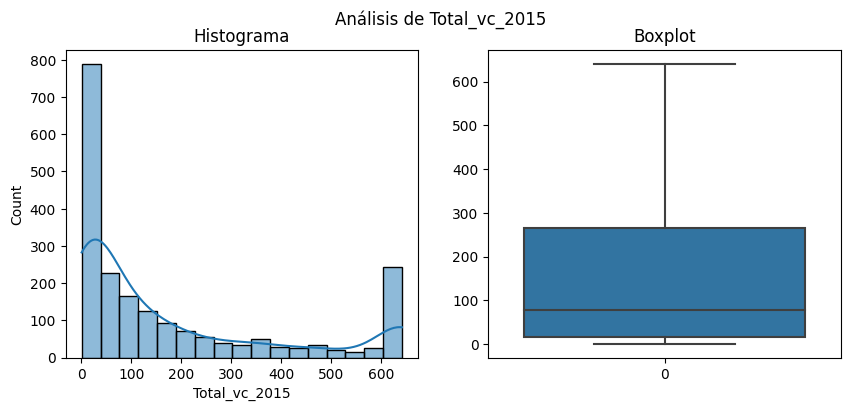

La columna Total_vc_2015 no presenta una distribución normal



Análisis univariante de Total_vu_2015:


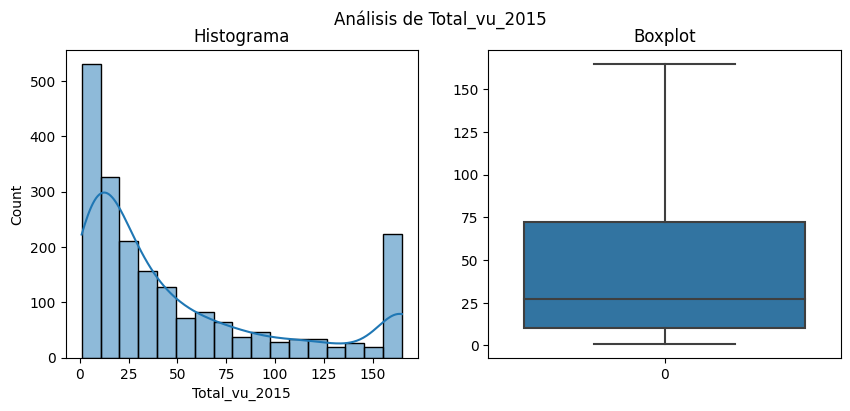

La columna Total_vu_2015 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2015:


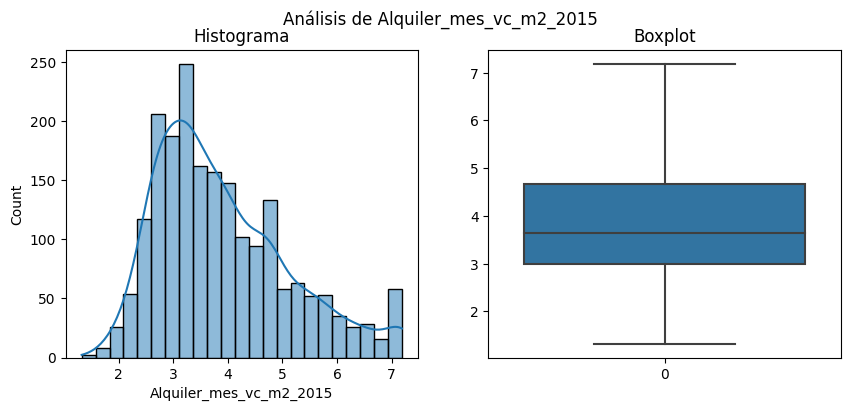

La columna Alquiler_mes_vc_m2_2015 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2015:


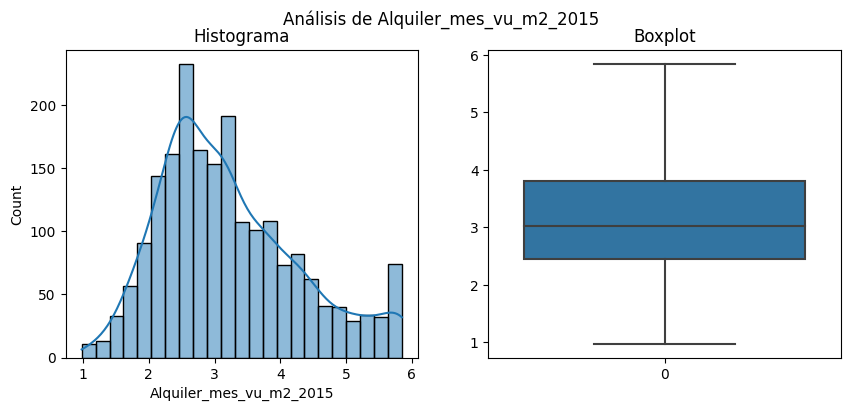

La columna Alquiler_mes_vu_m2_2015 no presenta una distribución normal



Análisis univariante de Total_vc_2016:


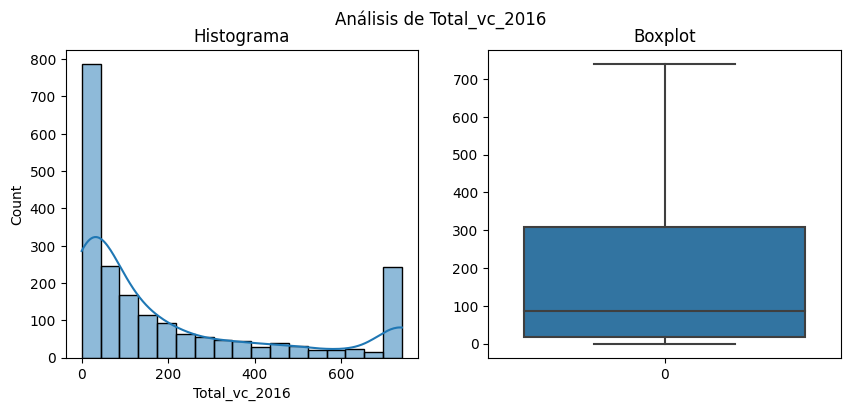

La columna Total_vc_2016 no presenta una distribución normal



Análisis univariante de Total_vu_2016:


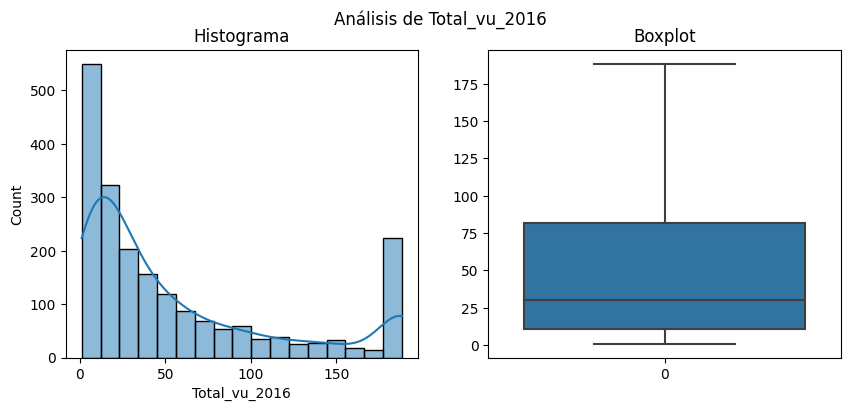

La columna Total_vu_2016 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2016:


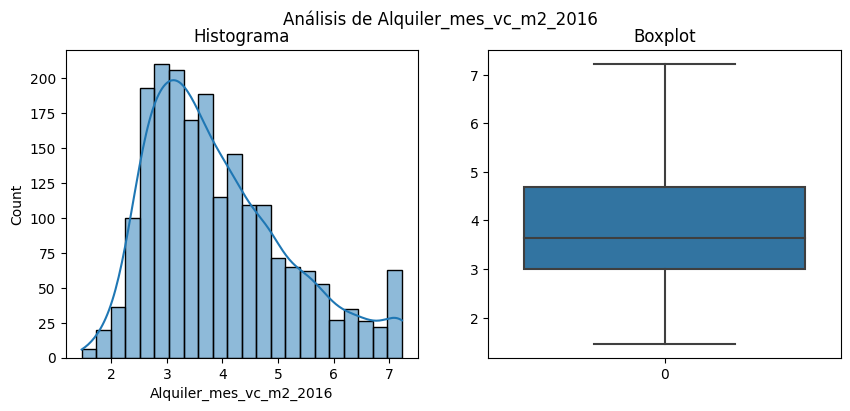

La columna Alquiler_mes_vc_m2_2016 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2016:


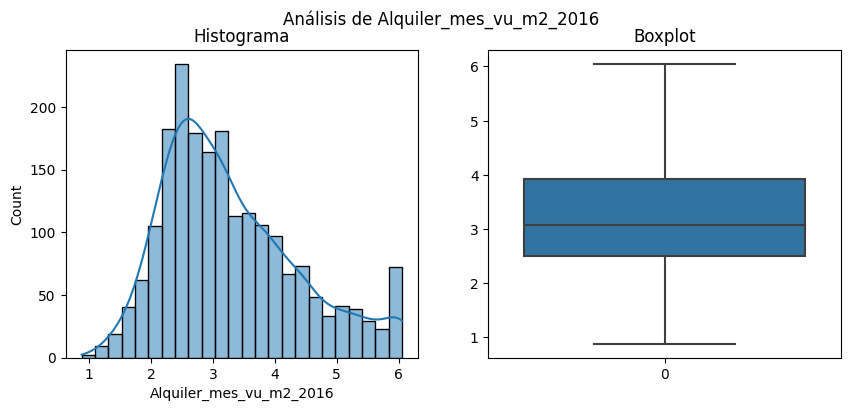

La columna Alquiler_mes_vu_m2_2016 no presenta una distribución normal



Análisis univariante de Total_vc_2017:


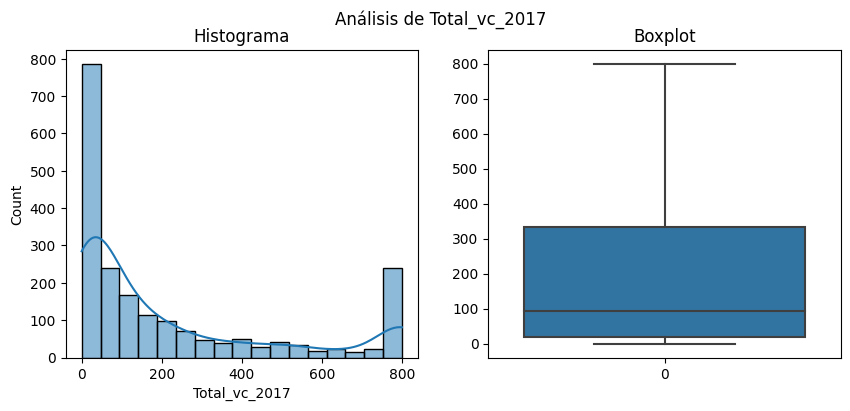

La columna Total_vc_2017 no presenta una distribución normal



Análisis univariante de Total_vu_2017:


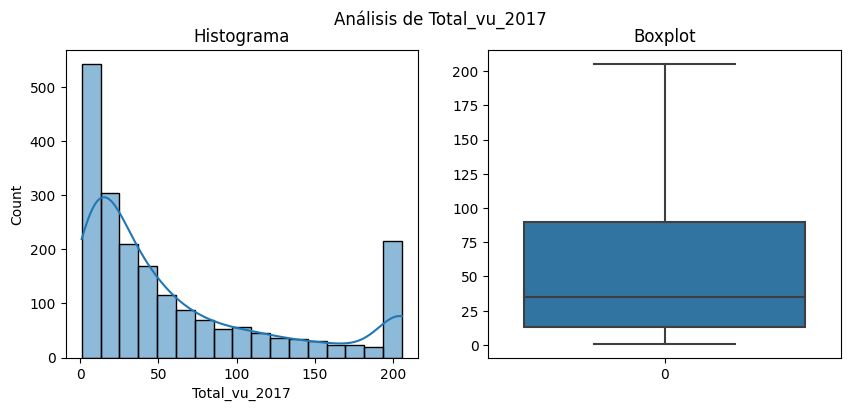

La columna Total_vu_2017 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2017:


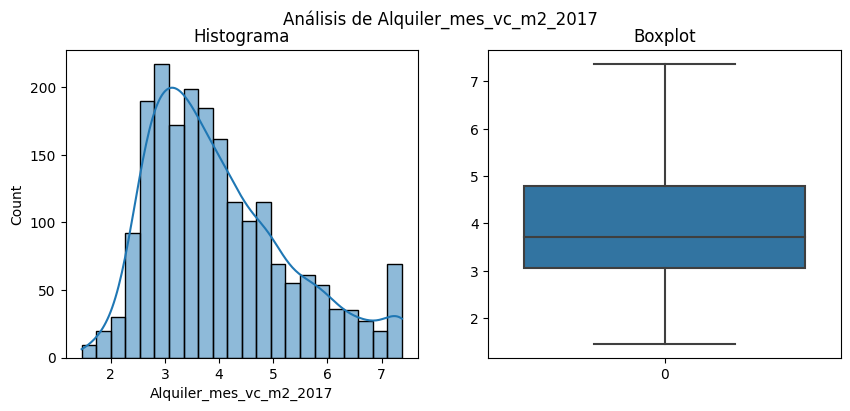

La columna Alquiler_mes_vc_m2_2017 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2017:


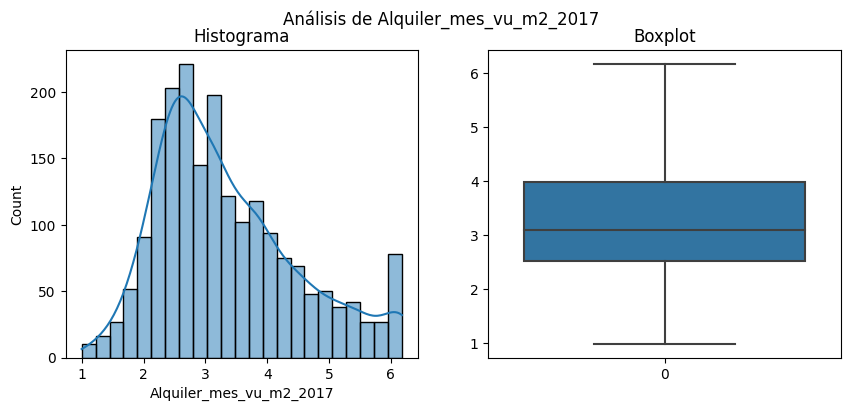

La columna Alquiler_mes_vu_m2_2017 no presenta una distribución normal



Análisis univariante de Total_vc_2018:


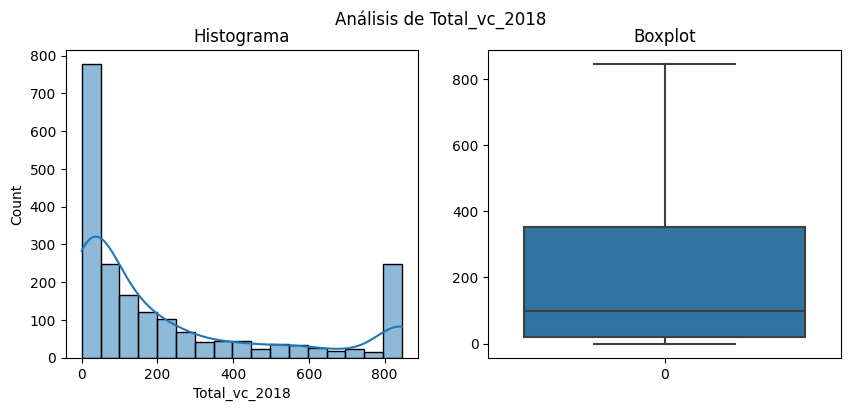

La columna Total_vc_2018 no presenta una distribución normal



Análisis univariante de Total_vu_2018:


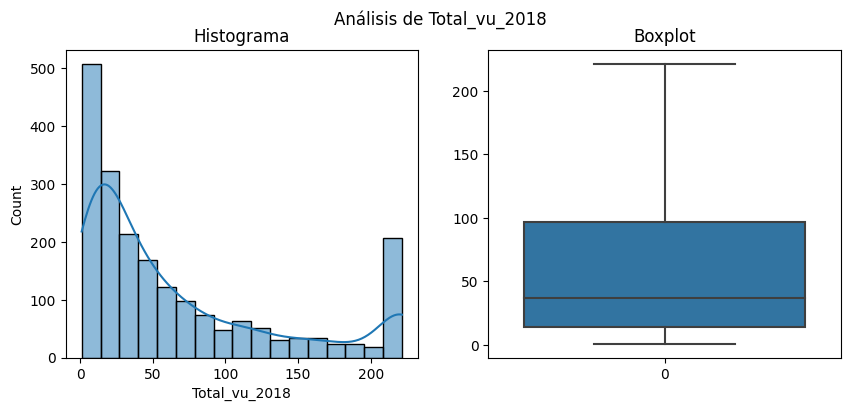

La columna Total_vu_2018 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2018:


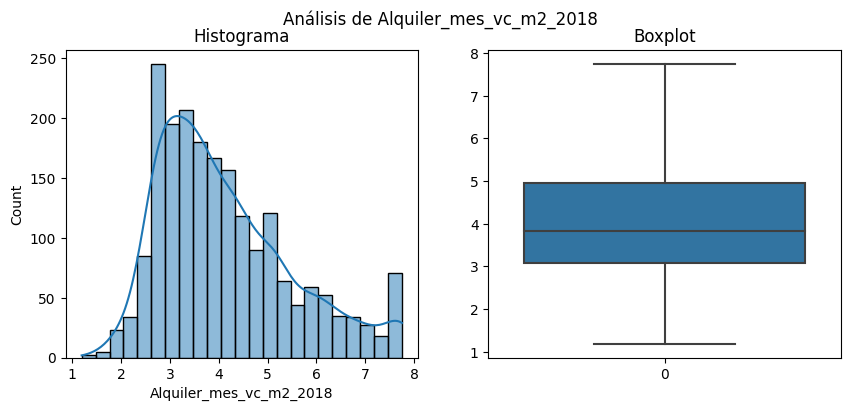

La columna Alquiler_mes_vc_m2_2018 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2018:


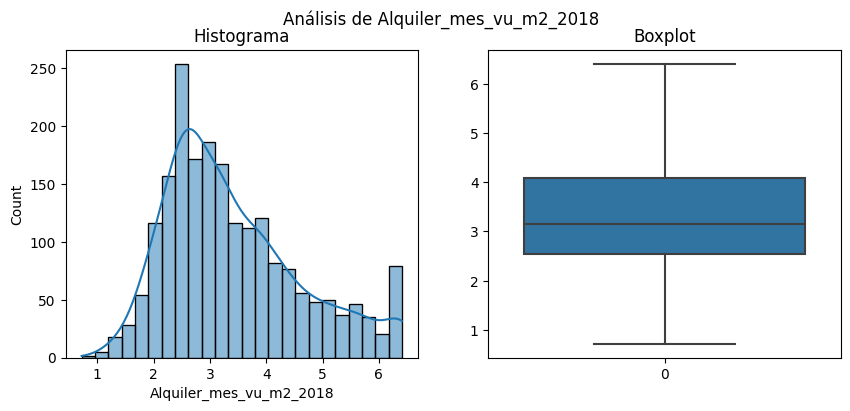

La columna Alquiler_mes_vu_m2_2018 no presenta una distribución normal



Análisis univariante de Total_vc_2019:


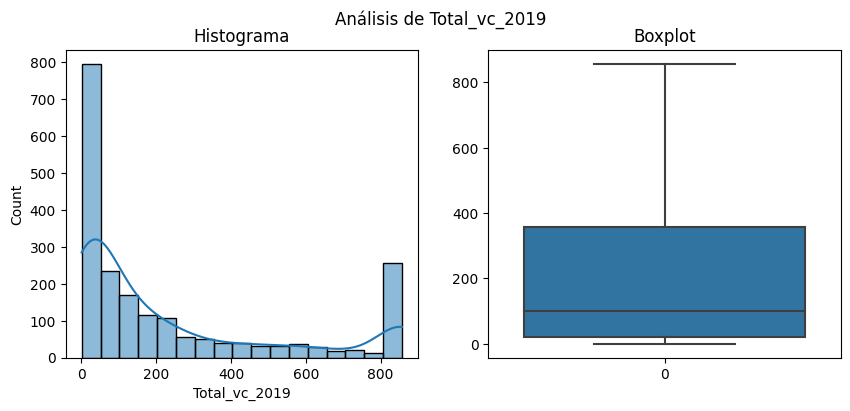

La columna Total_vc_2019 no presenta una distribución normal



Análisis univariante de Total_vu_2019:


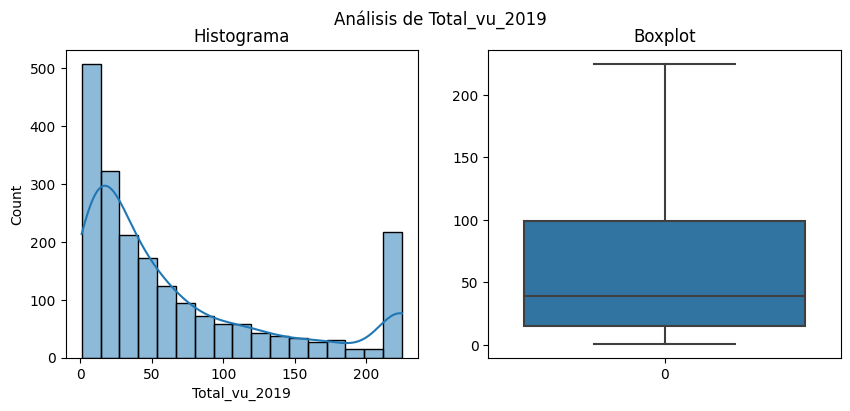

La columna Total_vu_2019 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2019:


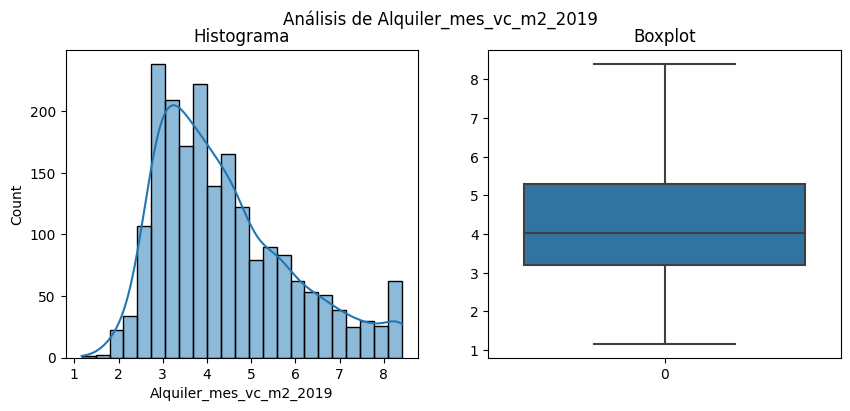

La columna Alquiler_mes_vc_m2_2019 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2019:


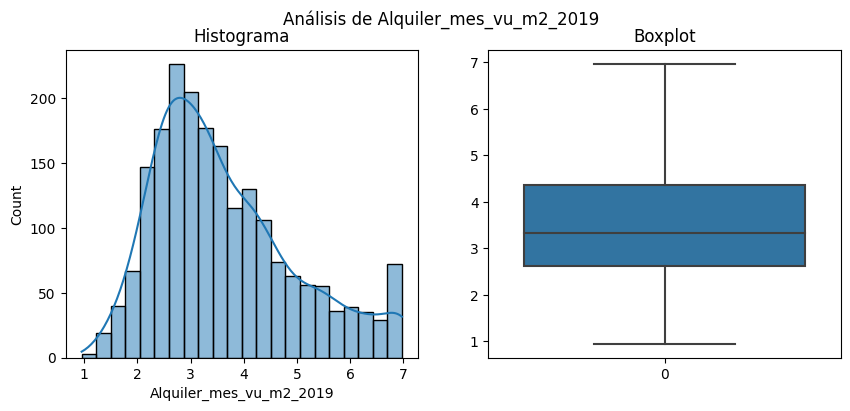

La columna Alquiler_mes_vu_m2_2019 no presenta una distribución normal



Análisis univariante de Total_vc_2020:


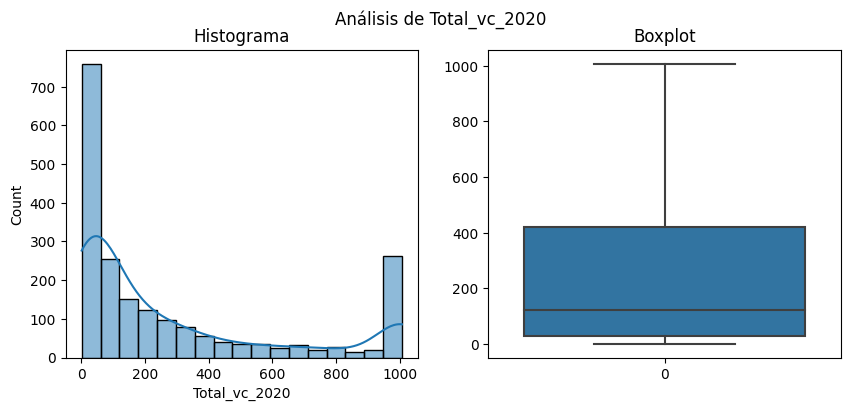

La columna Total_vc_2020 no presenta una distribución normal



Análisis univariante de Total_vu_2020:


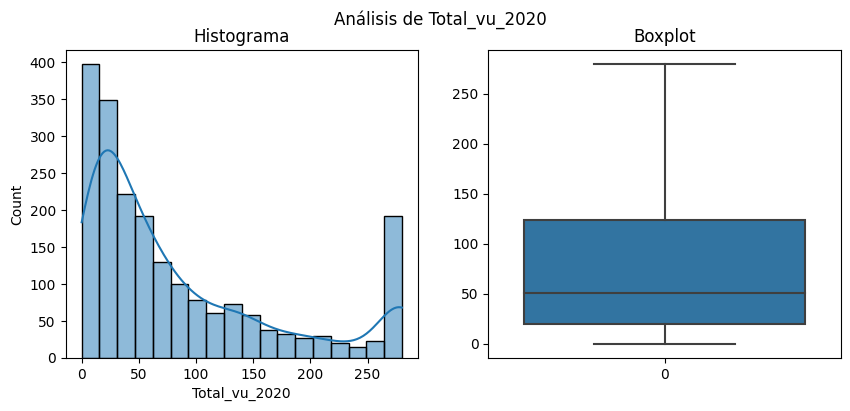

La columna Total_vu_2020 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2020:


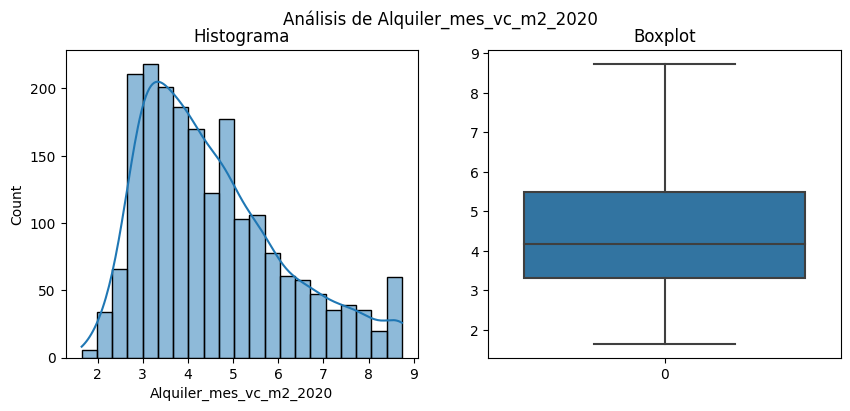

La columna Alquiler_mes_vc_m2_2020 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2020:


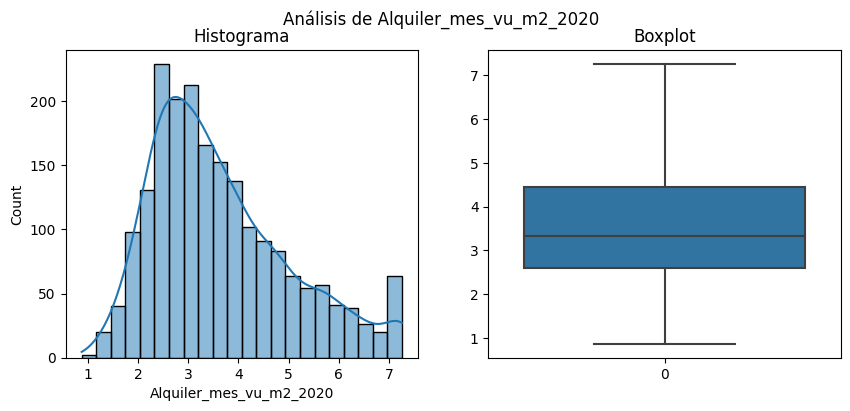

La columna Alquiler_mes_vu_m2_2020 no presenta una distribución normal



Análisis univariante de Total_vc_2021:


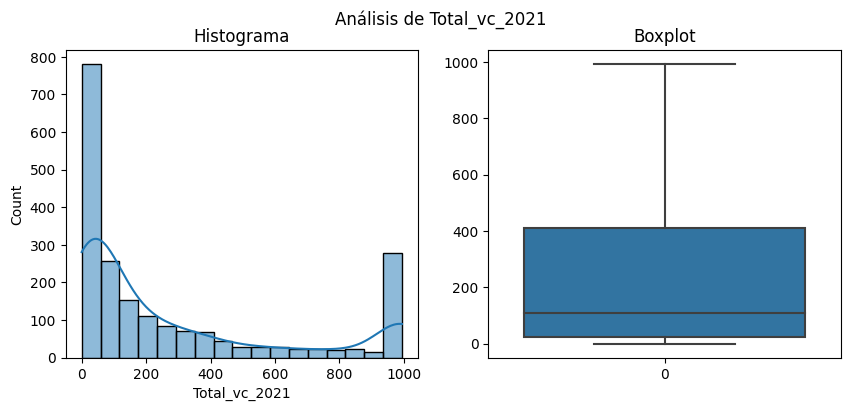

La columna Total_vc_2021 no presenta una distribución normal



Análisis univariante de Total_vu_2021:


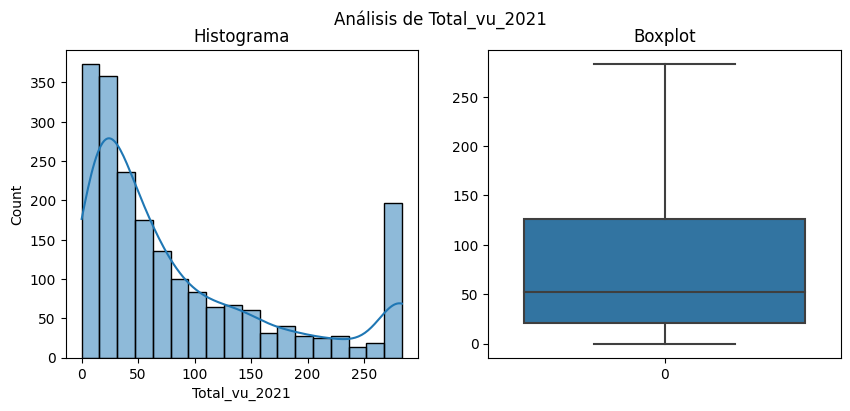

La columna Total_vu_2021 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2_2021:


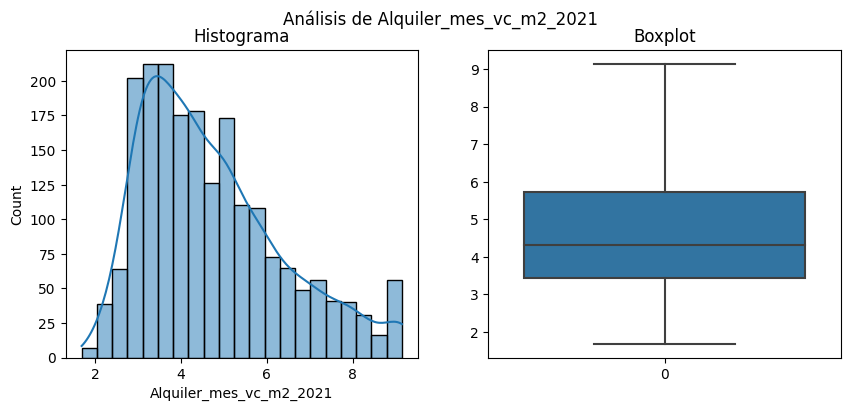

La columna Alquiler_mes_vc_m2_2021 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2_2021:


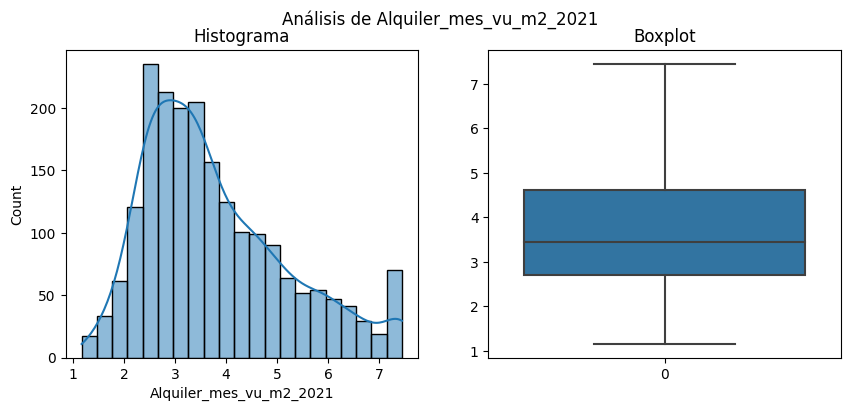

La columna Alquiler_mes_vu_m2_2021 no presenta una distribución normal



Análisis univariante de Comunidad_autonoma:
Variable categórica:
-Valores únicos:
Andalucía                  417
Cataluña                   342
Comunitat Valenciana       216
Galicia                    208
Castilla-La Mancha         185
Castilla y León            127
Madrid, Comunidad de       109
Extremadura                 88
Canarias                    80
Aragón                      60
Balears, Illes              52
Cantabria                   47
Asturias, Principado de     42
Murcia, Región de           38
Rioja, La                   20
Ceuta                        1
Melilla                      1
Name: Comunidad_autonoma, dtype: int64
-Número de valores únicos: 17




Análisis univariante de Poblacion_2003:


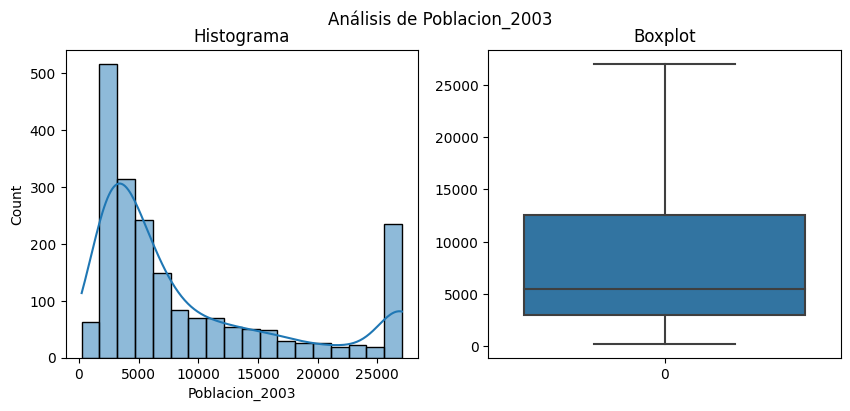

La columna Poblacion_2003 presenta una distribución normal



Análisis univariante de Poblacion_2004:


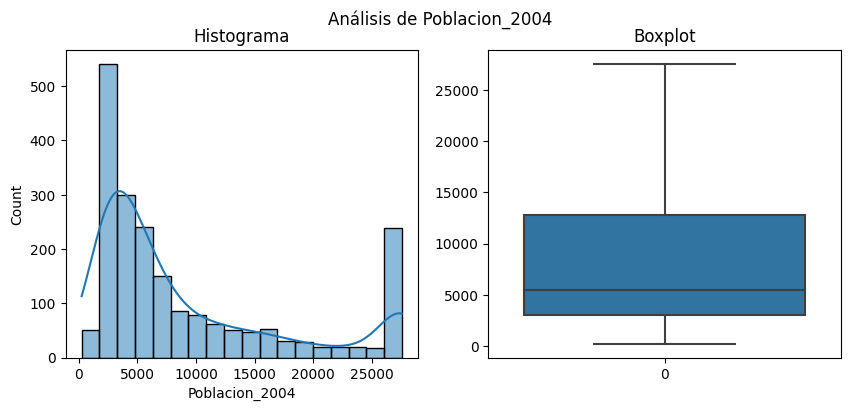

La columna Poblacion_2004 presenta una distribución normal



Análisis univariante de Poblacion_2005:


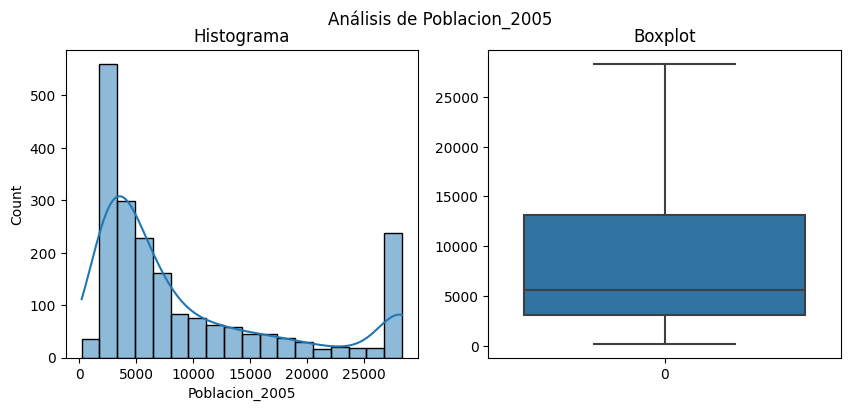

La columna Poblacion_2005 presenta una distribución normal



Análisis univariante de Poblacion_2006:


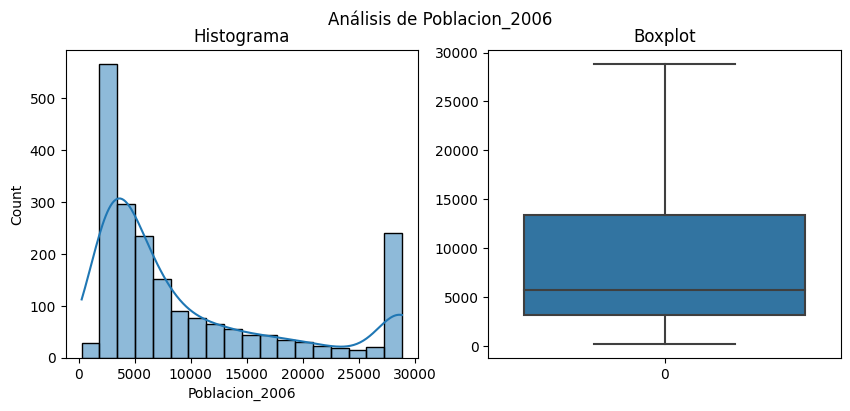

La columna Poblacion_2006 presenta una distribución normal



Análisis univariante de Poblacion_2007:


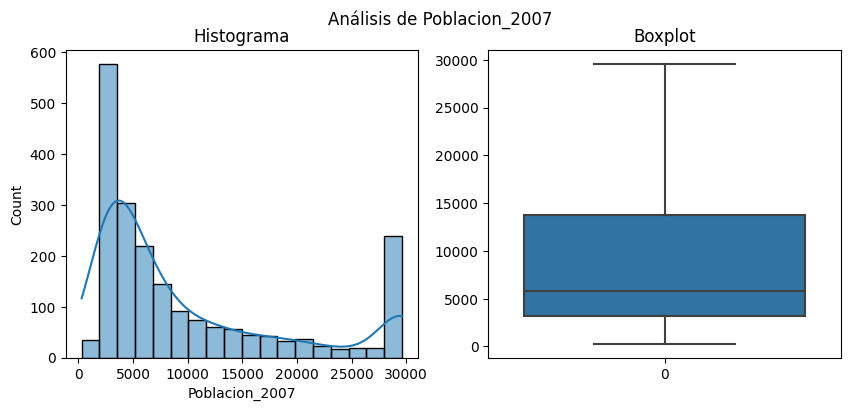

La columna Poblacion_2007 presenta una distribución normal



Análisis univariante de Poblacion_2008:


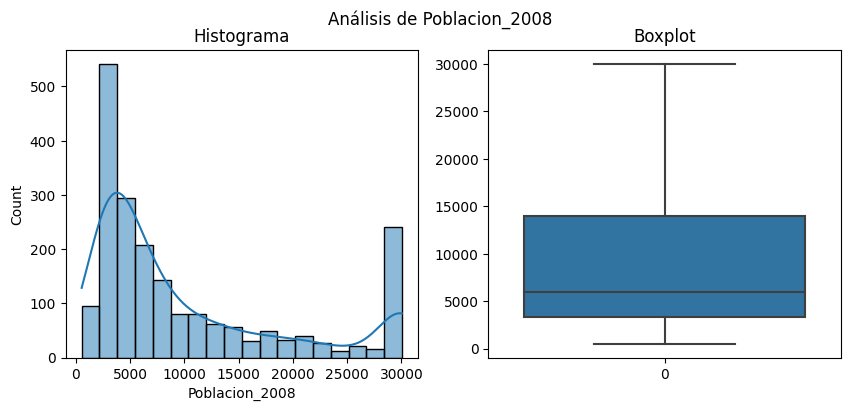

La columna Poblacion_2008 presenta una distribución normal



Análisis univariante de Poblacion_2009:


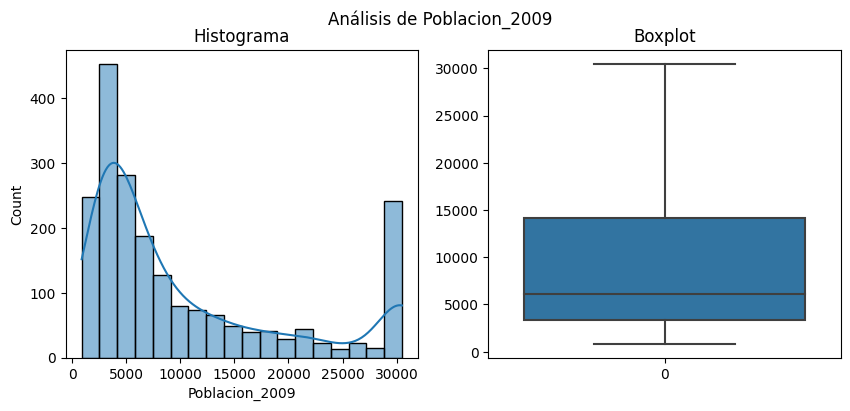

La columna Poblacion_2009 presenta una distribución normal



Análisis univariante de Poblacion_2010:


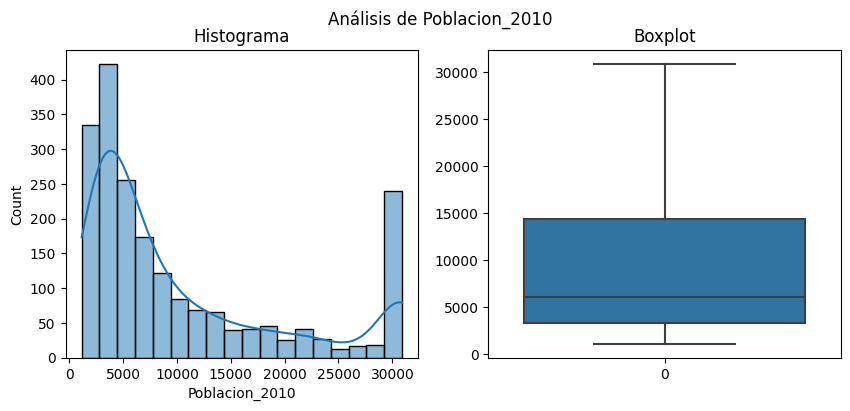

La columna Poblacion_2010 presenta una distribución normal



Análisis univariante de Poblacion_2011:


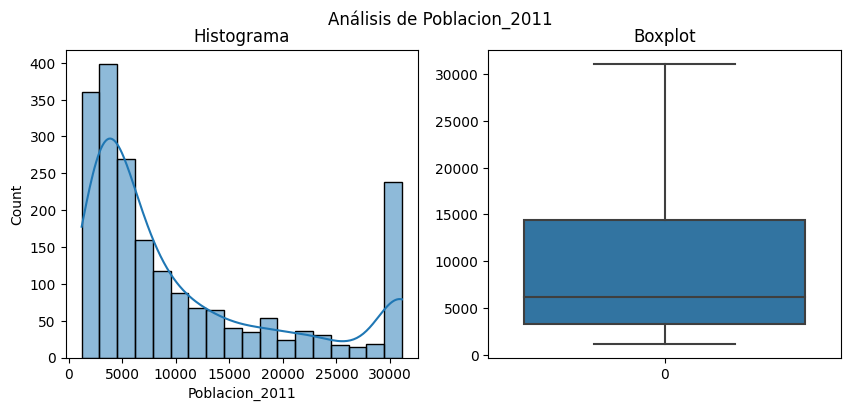

La columna Poblacion_2011 no presenta una distribución normal



Análisis univariante de Poblacion_2012:


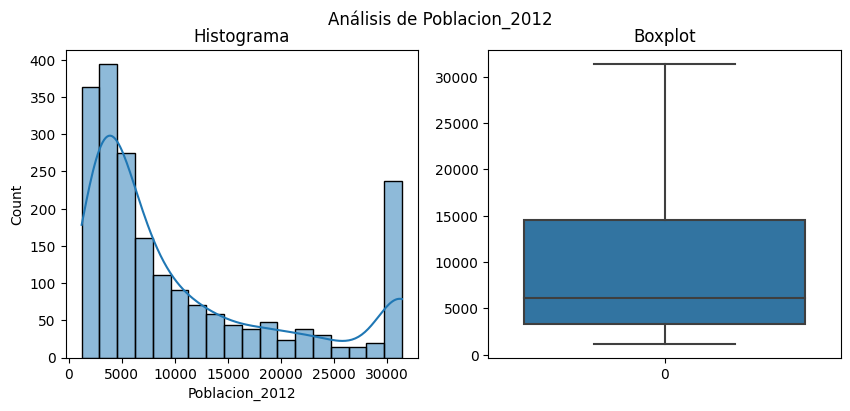

La columna Poblacion_2012 no presenta una distribución normal



Análisis univariante de Poblacion_2013:


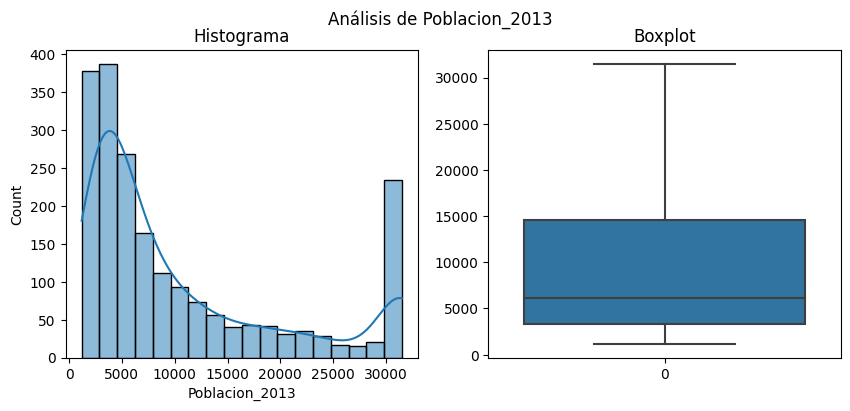

La columna Poblacion_2013 no presenta una distribución normal



Análisis univariante de Poblacion_2014:


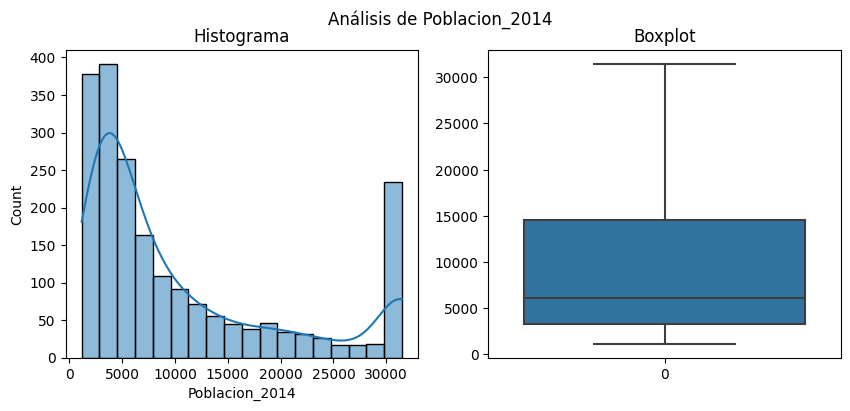

La columna Poblacion_2014 no presenta una distribución normal



Análisis univariante de Poblacion_2015:


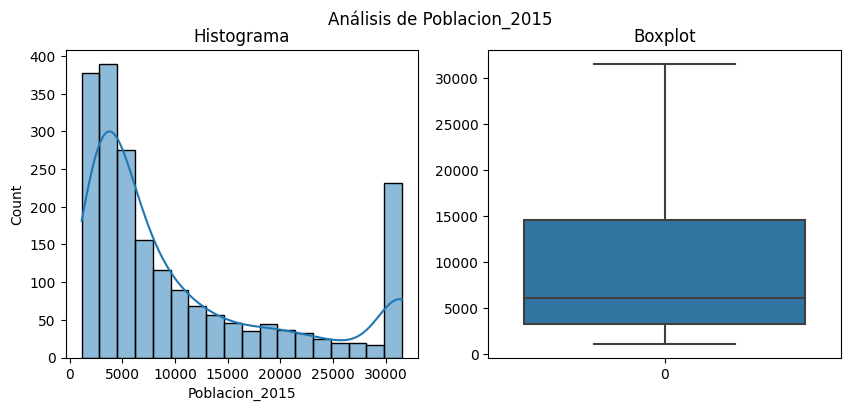

La columna Poblacion_2015 no presenta una distribución normal



Análisis univariante de Poblacion_2016:


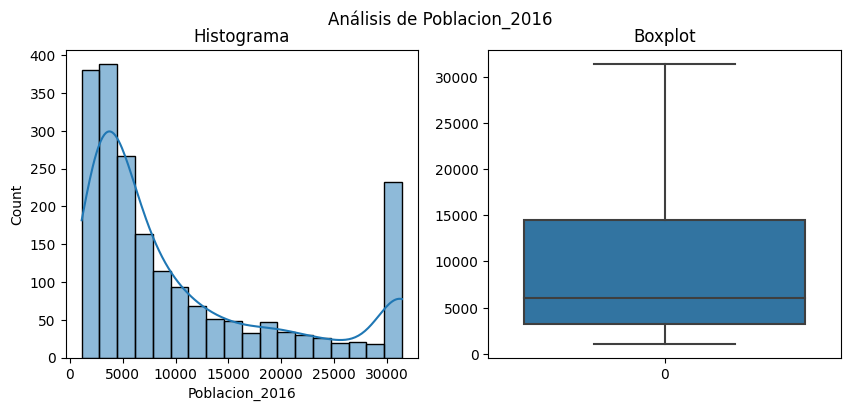

La columna Poblacion_2016 no presenta una distribución normal



Análisis univariante de Poblacion_2017:


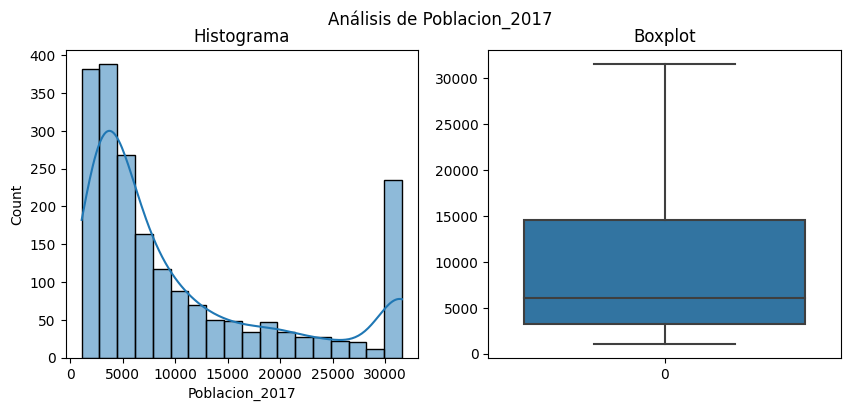

La columna Poblacion_2017 no presenta una distribución normal



Análisis univariante de Poblacion_2018:


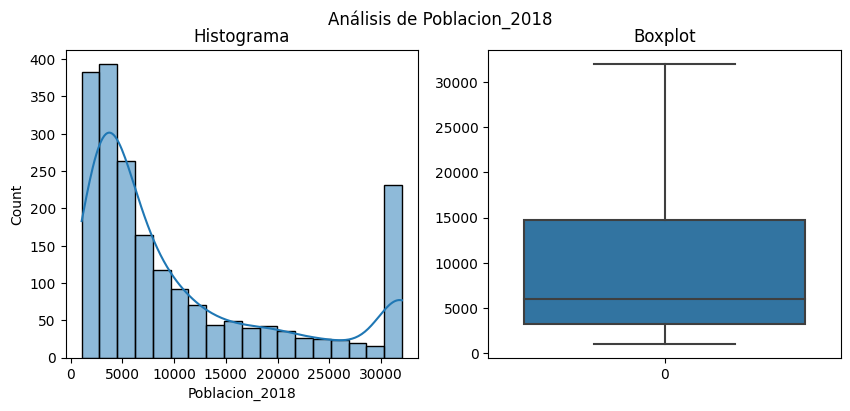

La columna Poblacion_2018 no presenta una distribución normal



Análisis univariante de Poblacion_2019:


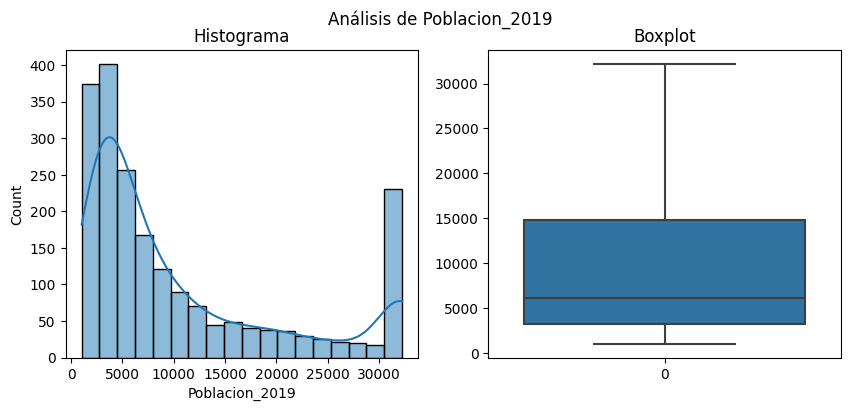

La columna Poblacion_2019 no presenta una distribución normal



Análisis univariante de Poblacion_2020:


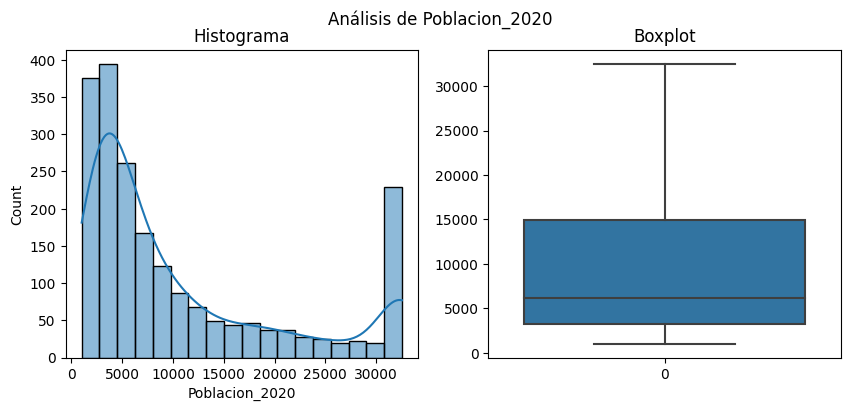

La columna Poblacion_2020 no presenta una distribución normal



Análisis univariante de Poblacion_2021:


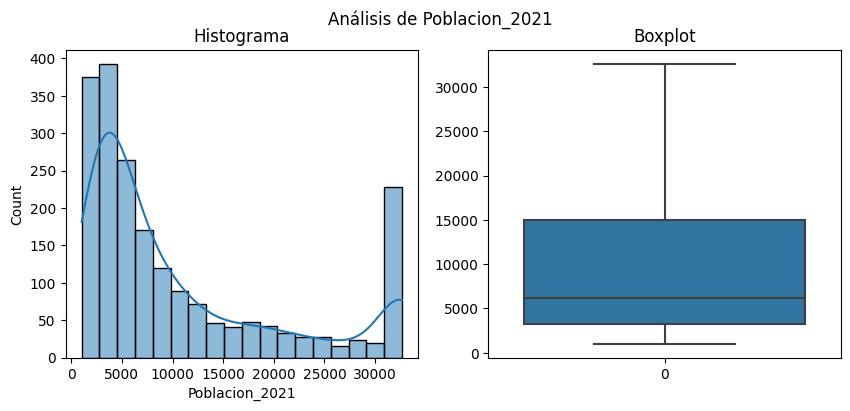

La columna Poblacion_2021 no presenta una distribución normal



Análisis univariante de Poblacion_2022:


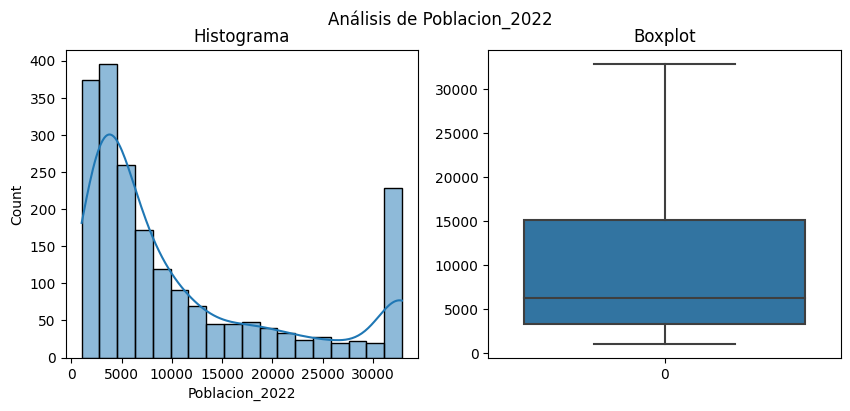

La columna Poblacion_2022 no presenta una distribución normal



Análisis univariante de Inmuebles_totales:


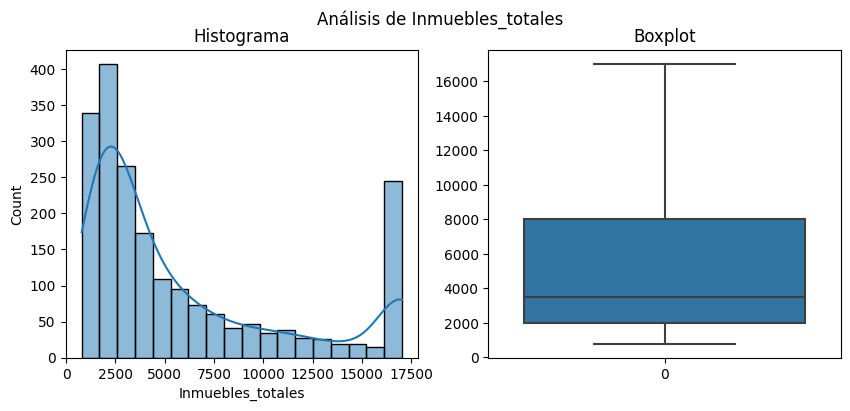

La columna Inmuebles_totales no presenta una distribución normal



Análisis univariante de Viviendas_turisticas_2020:


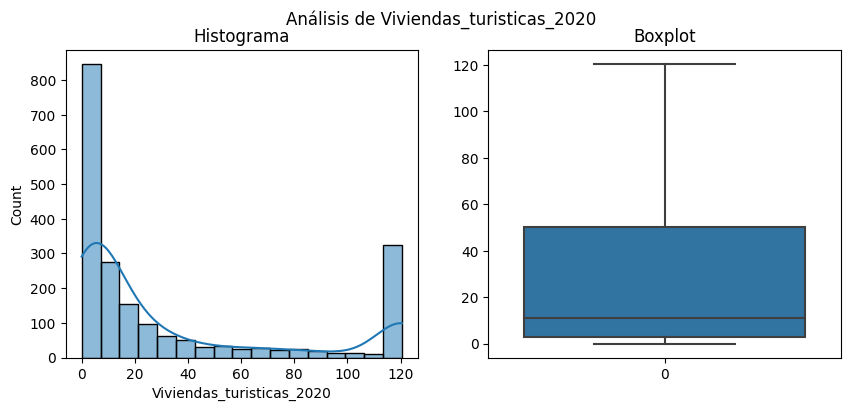

La columna Viviendas_turisticas_2020 no presenta una distribución normal



Análisis univariante de Viviendas_turisticas_2021:


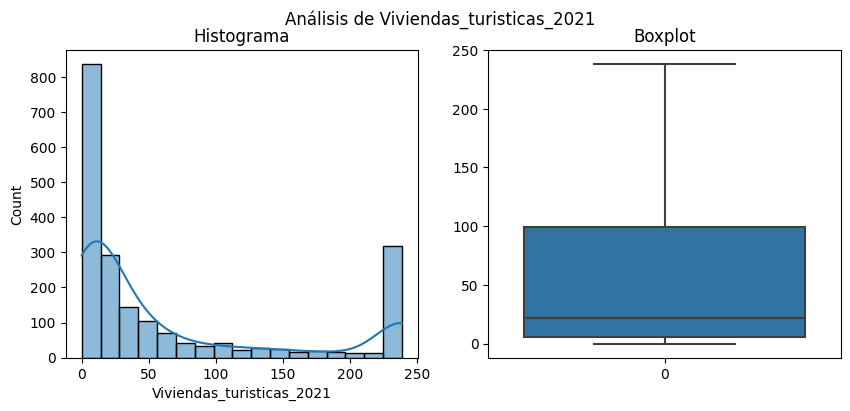

La columna Viviendas_turisticas_2021 no presenta una distribución normal



Análisis univariante de Viviendas_turisticas_2022:


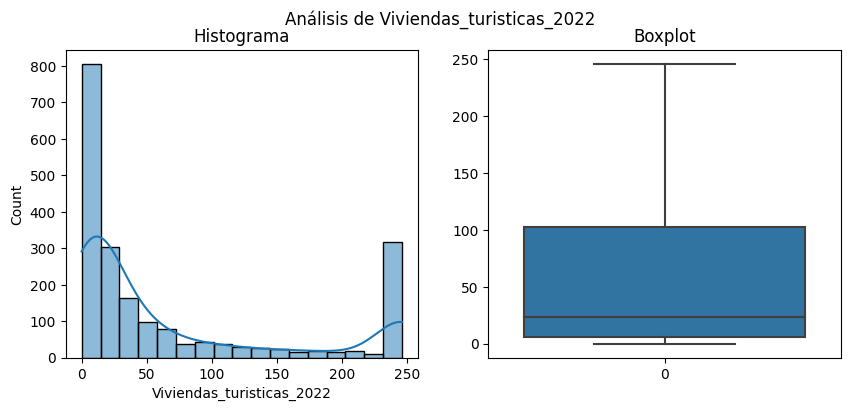

La columna Viviendas_turisticas_2022 no presenta una distribución normal



Análisis univariante de Turistas_2020:


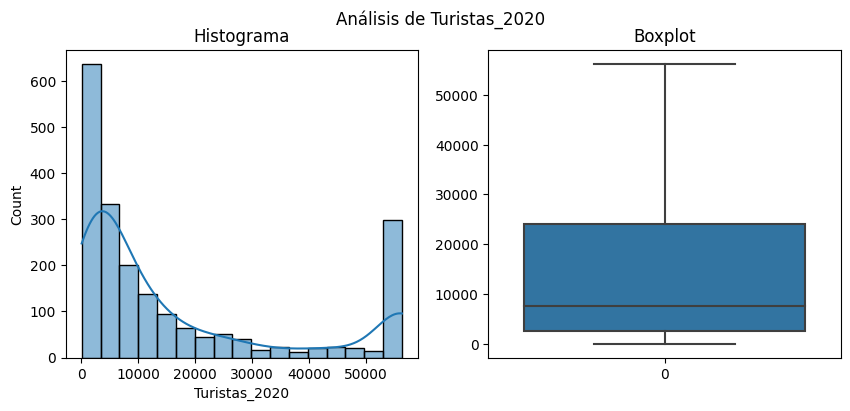

La columna Turistas_2020 no presenta una distribución normal



Análisis univariante de Turistas_2021:


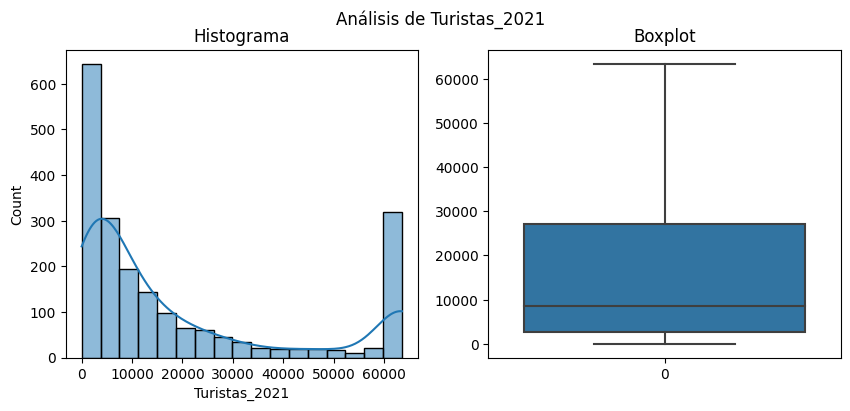

La columna Turistas_2021 no presenta una distribución normal



Análisis univariante de Turistas_2022:


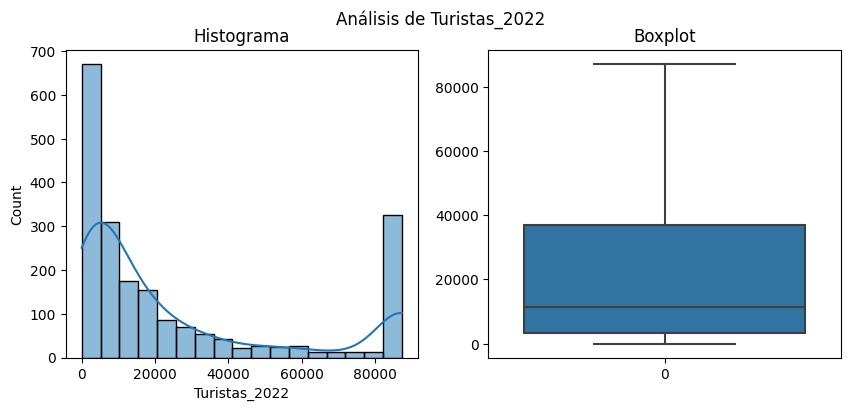

La columna Turistas_2022 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2015:


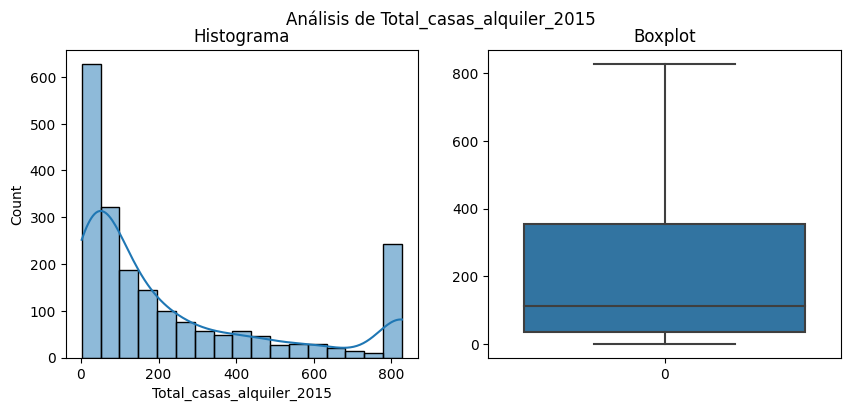

La columna Total_casas_alquiler_2015 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2015:


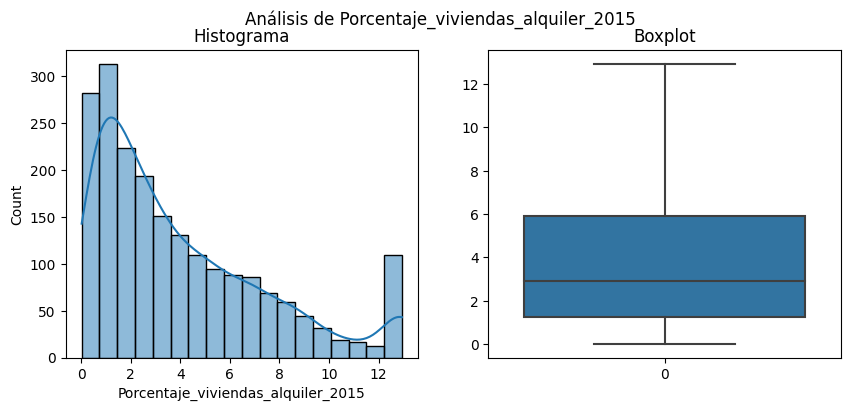

La columna Porcentaje_viviendas_alquiler_2015 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2015:


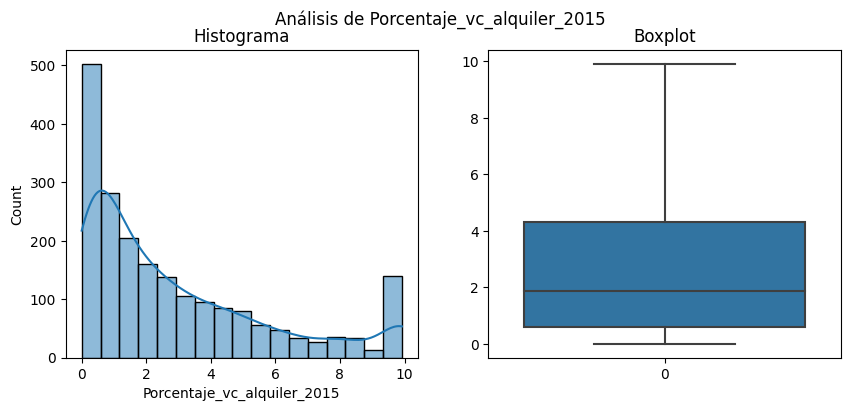

La columna Porcentaje_vc_alquiler_2015 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2015:


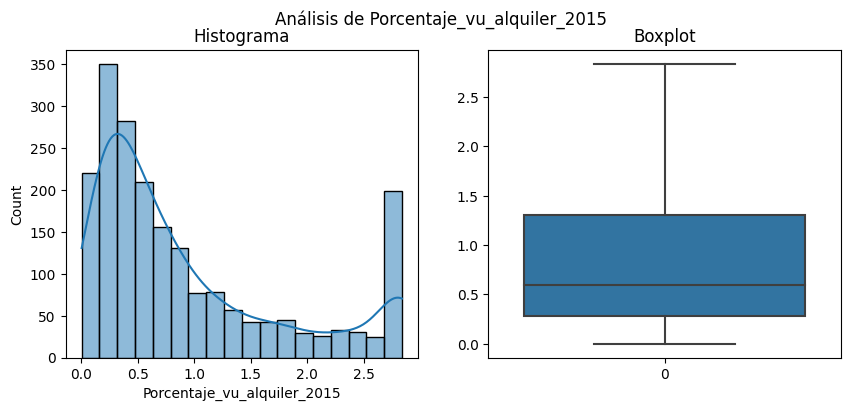

La columna Porcentaje_vu_alquiler_2015 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2016:


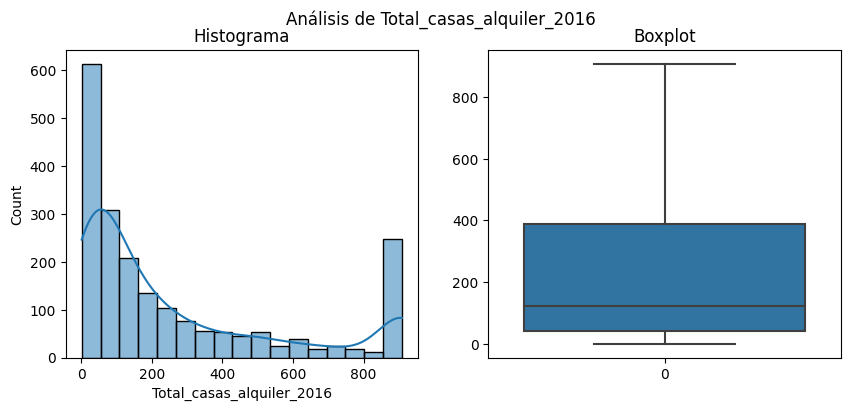

La columna Total_casas_alquiler_2016 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2016:


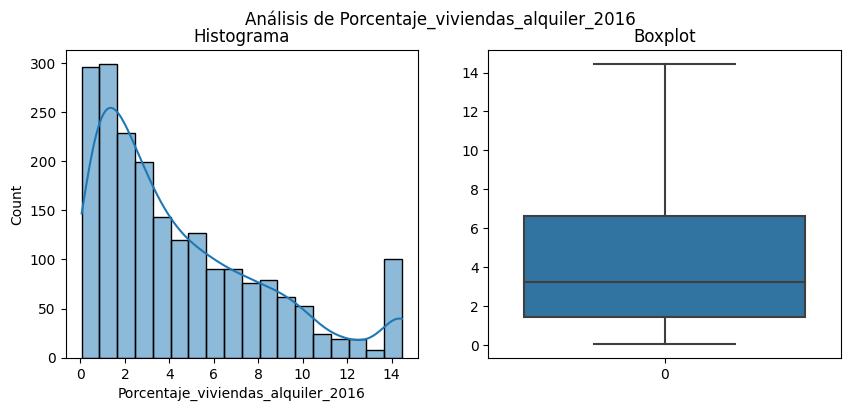

La columna Porcentaje_viviendas_alquiler_2016 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2016:


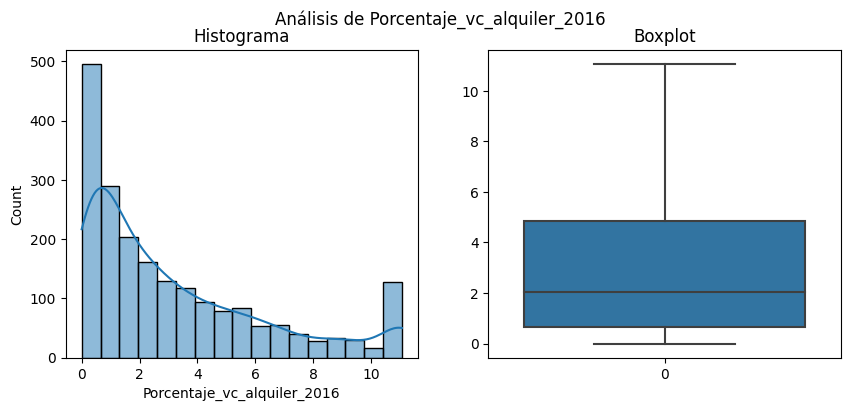

La columna Porcentaje_vc_alquiler_2016 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2016:


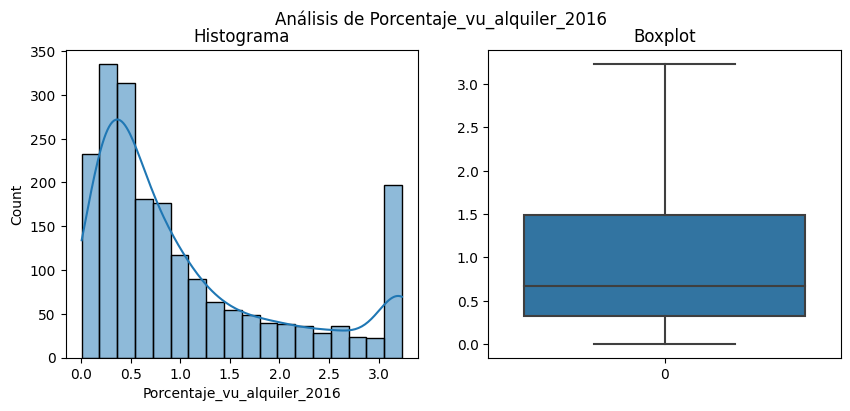

La columna Porcentaje_vu_alquiler_2016 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2017:


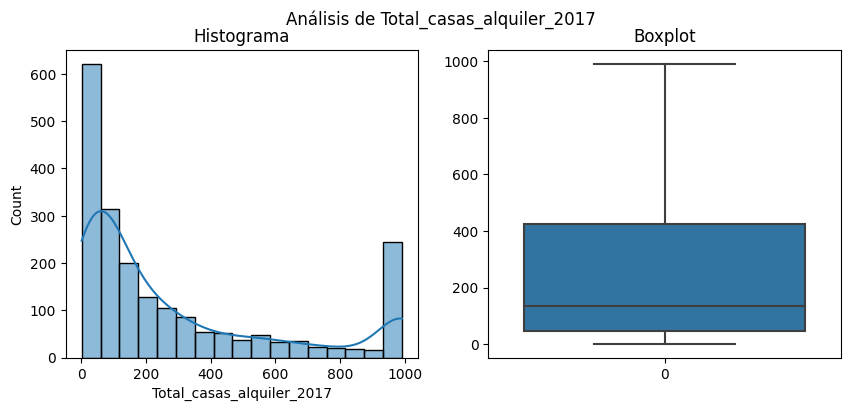

La columna Total_casas_alquiler_2017 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2017:


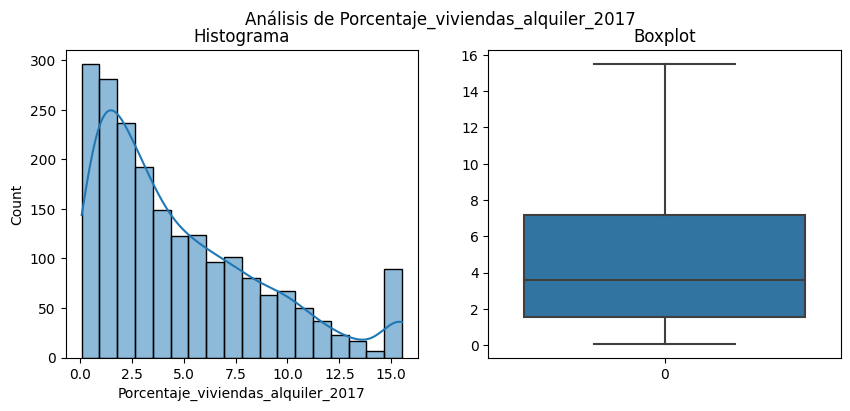

La columna Porcentaje_viviendas_alquiler_2017 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2017:


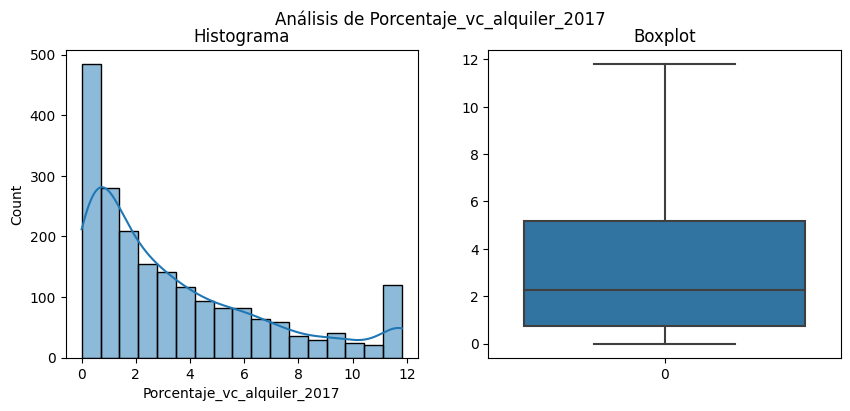

La columna Porcentaje_vc_alquiler_2017 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2017:


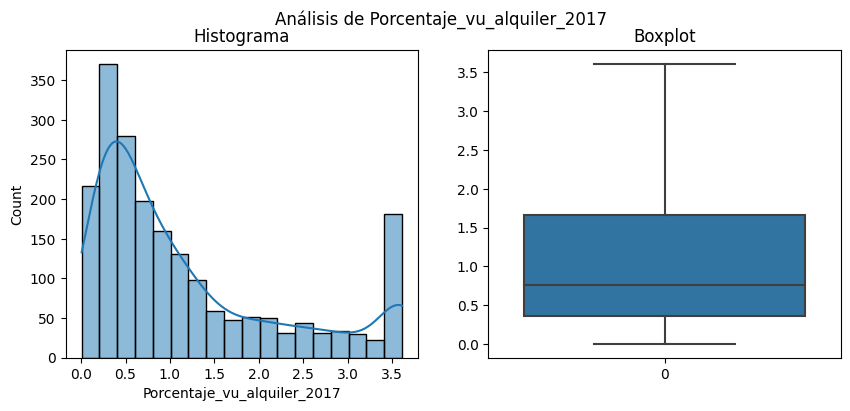

La columna Porcentaje_vu_alquiler_2017 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2018:


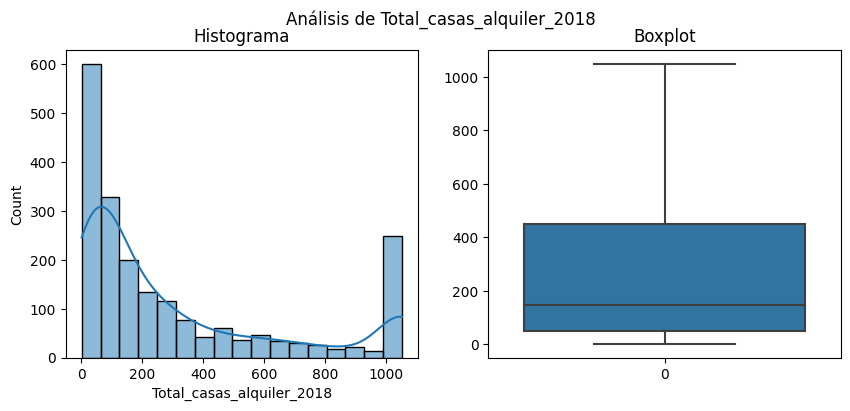

La columna Total_casas_alquiler_2018 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2018:


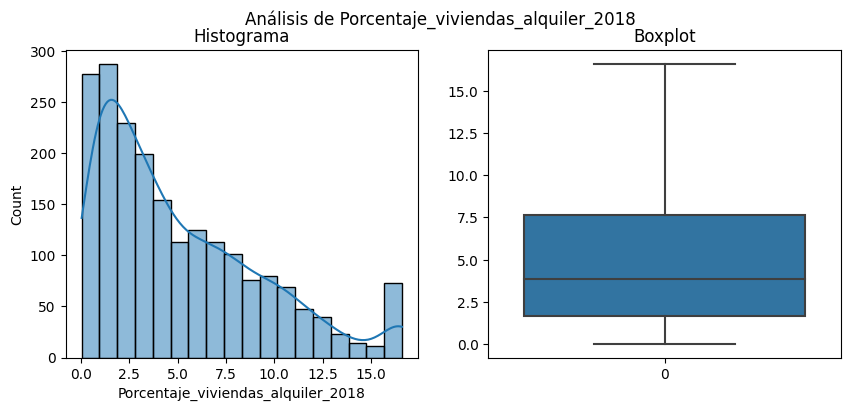

La columna Porcentaje_viviendas_alquiler_2018 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2018:


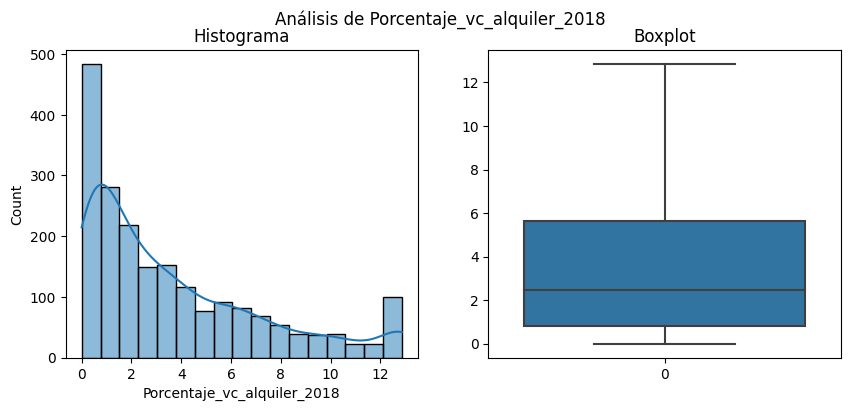

La columna Porcentaje_vc_alquiler_2018 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2018:


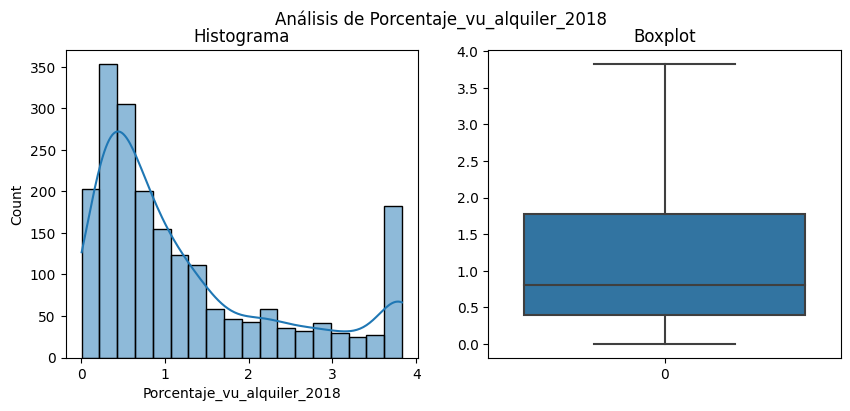

La columna Porcentaje_vu_alquiler_2018 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2019:


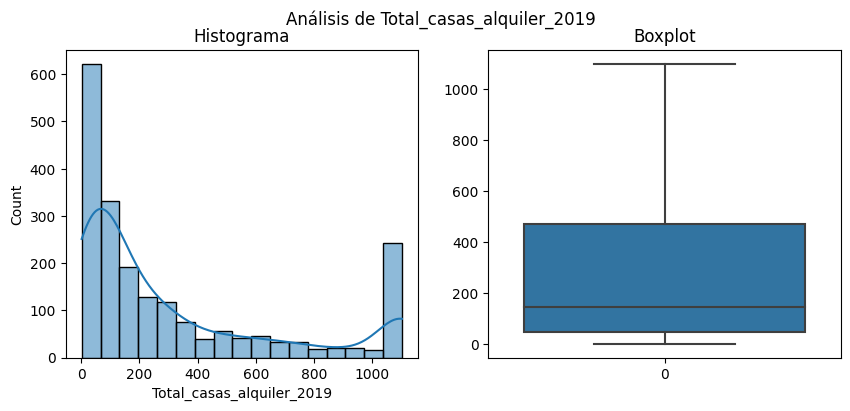

La columna Total_casas_alquiler_2019 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2019:


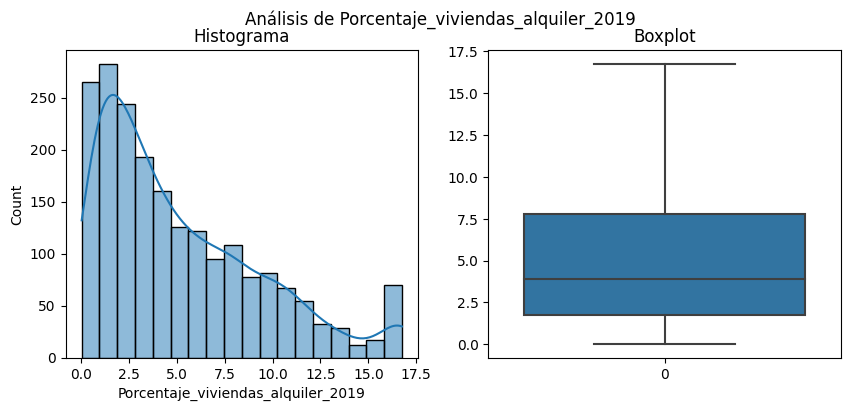

La columna Porcentaje_viviendas_alquiler_2019 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2019:


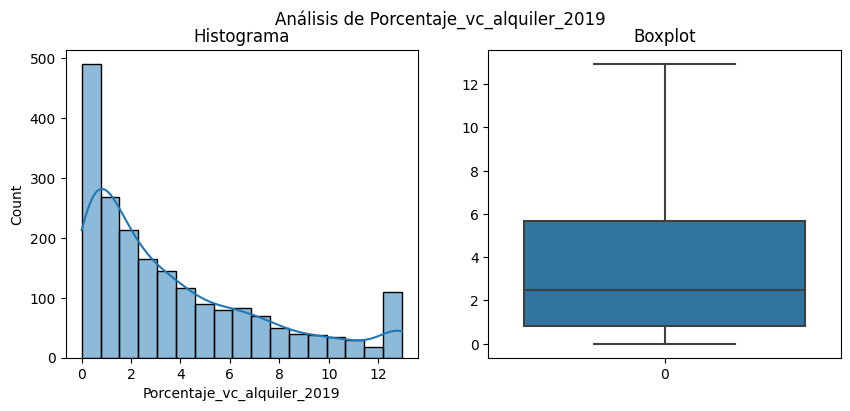

La columna Porcentaje_vc_alquiler_2019 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2019:


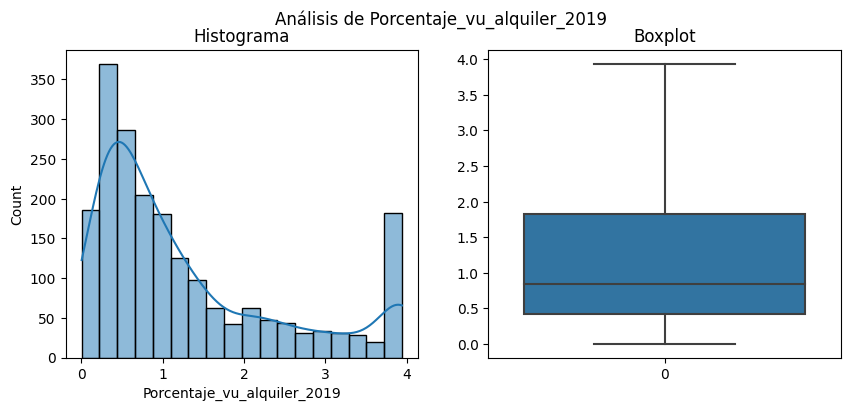

La columna Porcentaje_vu_alquiler_2019 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_turisticas_2020:


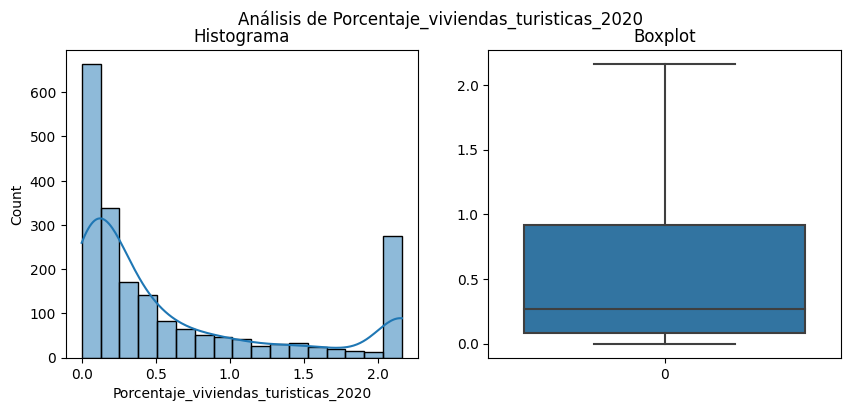

La columna Porcentaje_viviendas_turisticas_2020 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2020:


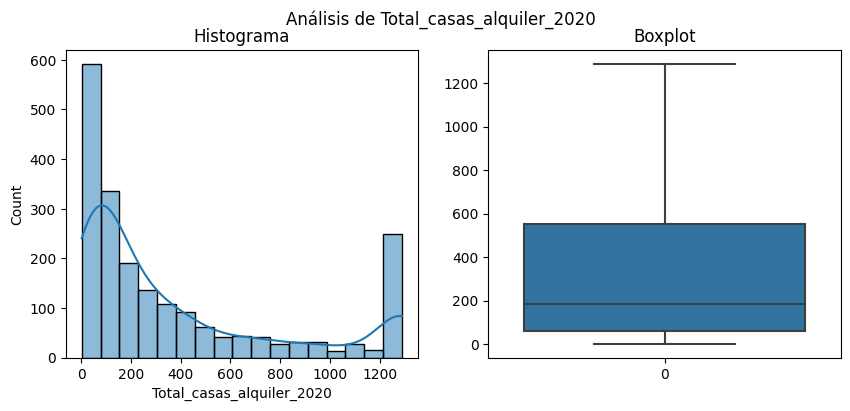

La columna Total_casas_alquiler_2020 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2020:


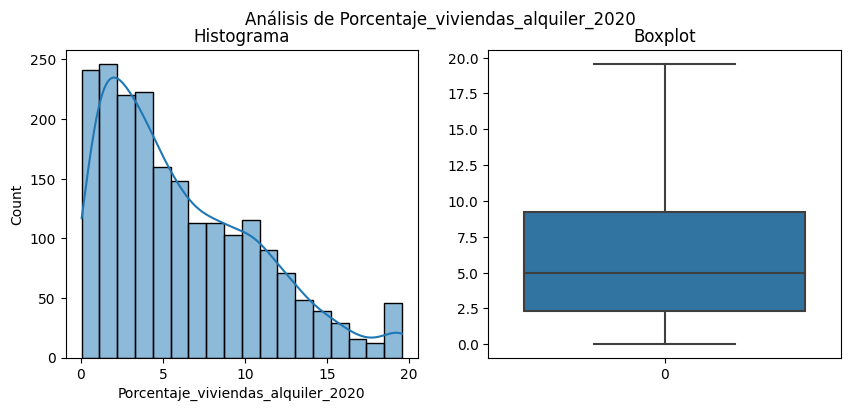

La columna Porcentaje_viviendas_alquiler_2020 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2020:


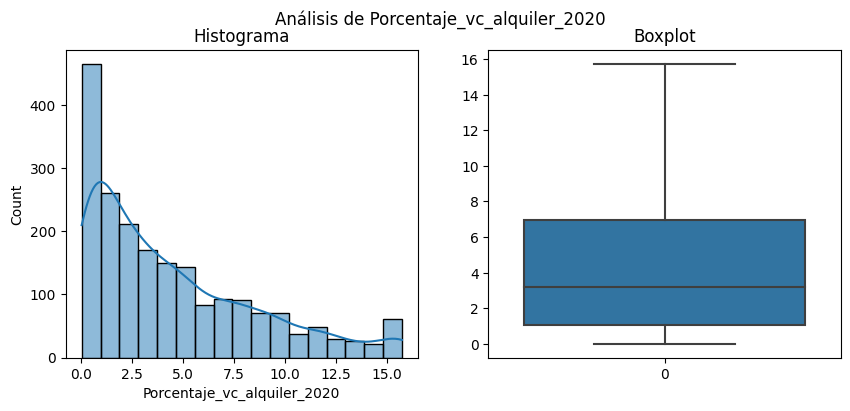

La columna Porcentaje_vc_alquiler_2020 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2020:


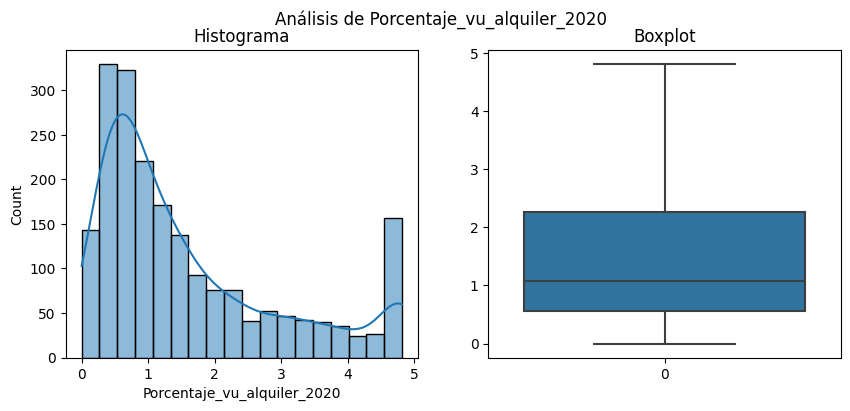

La columna Porcentaje_vu_alquiler_2020 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_turisticas_2021:


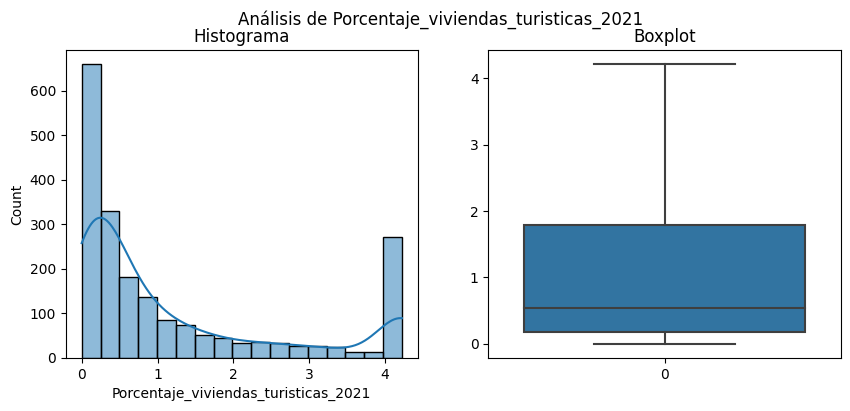

La columna Porcentaje_viviendas_turisticas_2021 no presenta una distribución normal



Análisis univariante de Total_casas_alquiler_2021:


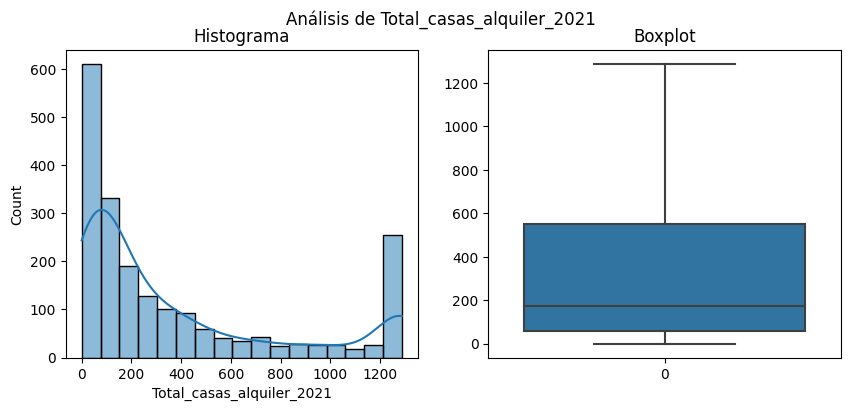

La columna Total_casas_alquiler_2021 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler_2021:


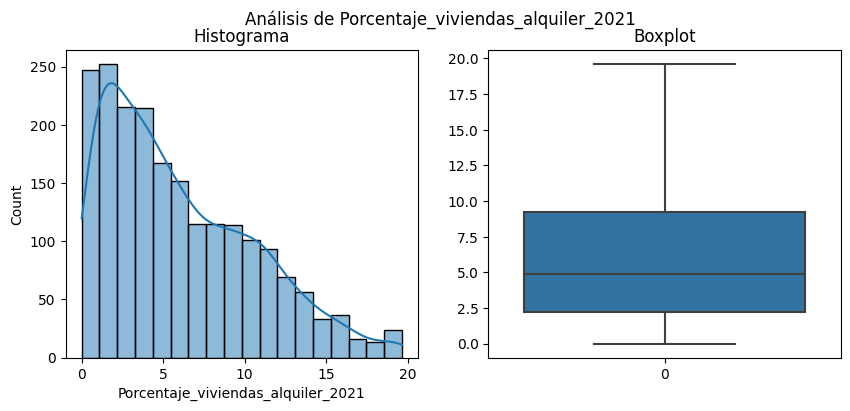

La columna Porcentaje_viviendas_alquiler_2021 no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler_2021:


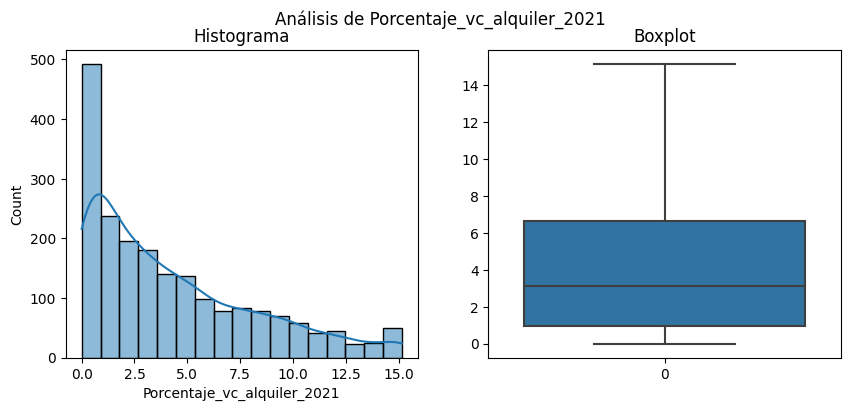

La columna Porcentaje_vc_alquiler_2021 no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler_2021:


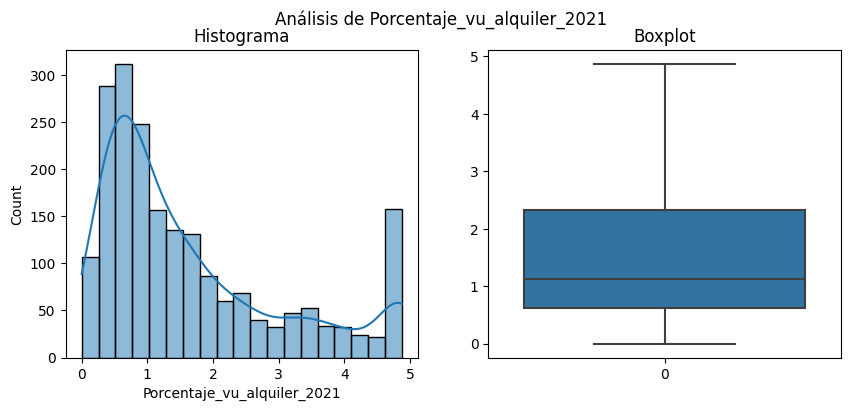

La columna Porcentaje_vu_alquiler_2021 no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_turisticas_2022:


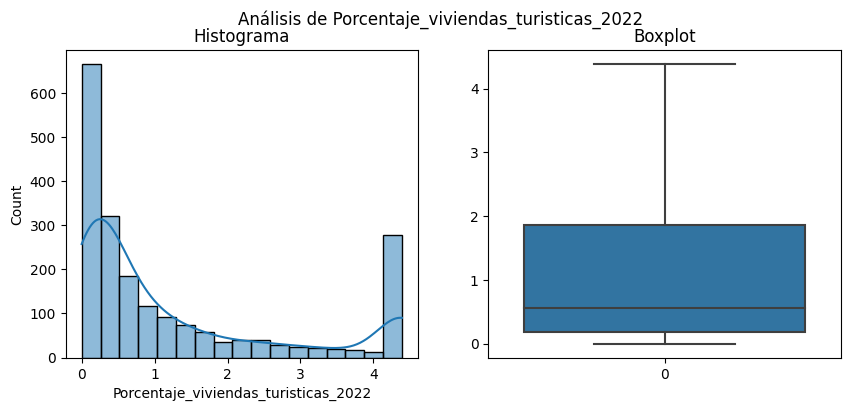

La columna Porcentaje_viviendas_turisticas_2022 no presenta una distribución normal



Número de variables que siguen una distribución normal: 8
Número de variables que no siguen una distribución normal: 78


Media     Mediana       Moda  \
Municipio                                                                  
Total_vc_2015                          563.112335   77.000000   1.000000   
Total_vu_2015                           68.582307   27.000000   4.000000   
Alquiler_mes_vc_m2_2015                  3.931301    3.639706   4.024286   
Alquiler_mes_vu_m2_2015                  3.252448    3.021359   2.520190   
Total_vc_2016                          628.289391   85.000000   1.000000   
...                                           ...         ...        ...   
Total_casas_alquiler_2021             1000.175005  175.000000  11.000000   
Porcentaje_viviendas_alquiler_2021       6.060227    4.904925   0.533808   
Porcentaje_vc_alquiler_2021              4.324845    3.116939   0.000000   
Porcentaje_vu_alquiler_2021              1.735382    1.117735   0.000000   
Porcentaje_viviendas_turisticas_2022     2.252719    0.559006   0.000000   

                                          Varianza  Desviacion_estandar  \
Municipio                                                                 
Total_vc_2015                         2.147210e+07          4633.799383   
Total_vu_2015                         1.684469e+04           129.787110   
Alquiler_mes_vc_m2_2015               1.710181e+00             1.307739   
Alquiler_mes_vu_m2_2015               1.392968e+00             1.180241   
Total_vc_2016                         2.624746e+07          5123.227812   
...                                            ...                  ...   
Total_casas_alquiler_2021             4.992297e+07          7065.619083   
Porcentaje_viviendas_alquiler_2021    2.157268e+01             4.644640   
Porcentaje_vc_alquiler_2021           1.682505e+01             4.101835   
Porcentaje_vu_alquiler_2021           2.740985e+00             1.655592   
Porcentaje_viviendas_turisticas_2022  2.270520e+01             4.764998   

                                      Percentil_25  Percentil_75    K_test  \
Municipio                                                                    
Total_vc_2015                            16.000000    266.000000  0.937407   
Total_vu_2015                            10.000000     72.000000  0.953148   
Alquiler_mes_vc_m2_2015                   2.988095      4.668621  0.966793   
Alquiler_mes_vu_m2_2015                   2.458527      3.814554  0.921019   
Total_vc_2016                            18.000000    307.000000  0.933964   
...                                            ...           ...       ...   
Total_casas_alquiler_2021                58.000000    550.000000  0.994715   
Porcentaje_viviendas_alquiler_2021        2.236422      9.196740  0.765504   
Porcentaje_vc_alquiler_2021               0.950540      6.633785  0.615078   
Porcentaje_vu_alquiler_2021               0.611933      2.317042  0.550686   
Porcentaje_viviendas_turisticas_2022      0.176278      1.862197  0.500000   

                                      p_value Distribución  
Municipio                                                   
Total_vc_2015                             0.0    No normal  
Total_vu_2015                             0.0    No normal  
Alquiler_mes_vc_m2_2015                   0.0    No normal  
Alquiler_mes_vu_m2_2015                   0.0    No normal  
Total_vc_2016                             0.0    No normal  
...                                       ...          ...  
Total_casas_alquiler_2021                 0.0    No normal  
Porcentaje_viviendas_alquiler_2021        0.0    No normal  
Porcentaje_vc_alquiler_2021               0.0    No normal  
Porcentaje_vu_alquiler_2021               0.0    No normal  
Porcentaje_viviendas_turisticas_2022      0.0    No normal  

[86 rows x 10 columns]

In [60]:
# Realiza el análisis univariante de los datos de cada columna del DataFrame
fn.get_univariate_analysis(df_final, df_final_no_out)


Se observa que la mayoría de los variables contienen una gran cantidad de outliers. Además, también se puede determinar tan solo 8 variables parecen seguir una distribución normal, el resto no.

### 5.2. Análisis bivariante<a id='52'></a>  


Tras el análisis univariante, se debe realizar un análisis bivariante de las columnas principales del DataFrame. Las columnas que seleccionaremos son aquellas que corresponden a los datos de 2021 y la columna de **Inmuebles_totales**. Posteriormente, se realiza un heatmap y gráficos de dispersión por pares, de esta forma se obtendrá una idea de la correlación entre columnas. Para esta labor, se utilizan las funciones **heatmap()** y **pairplot()** de seaborn contenidas en una función propia denominada **get_bivariate_analysis()**.

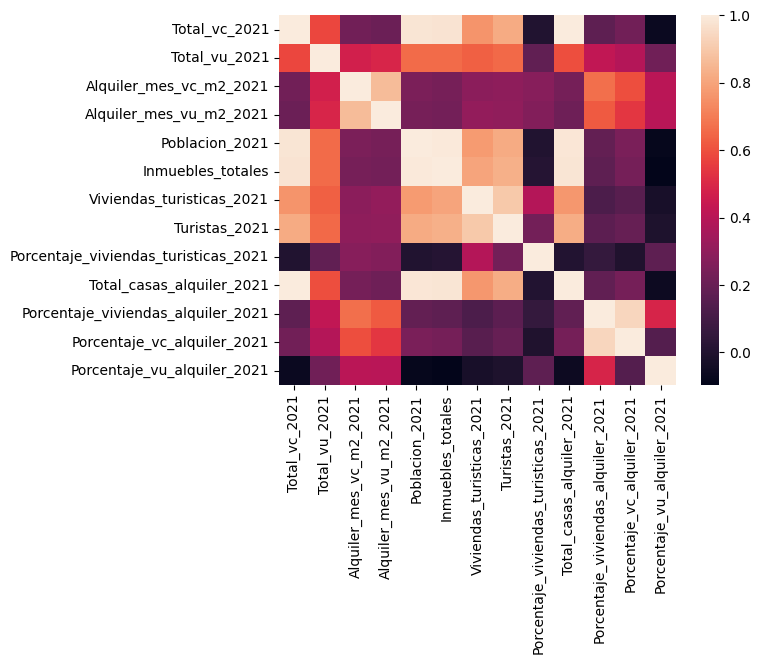

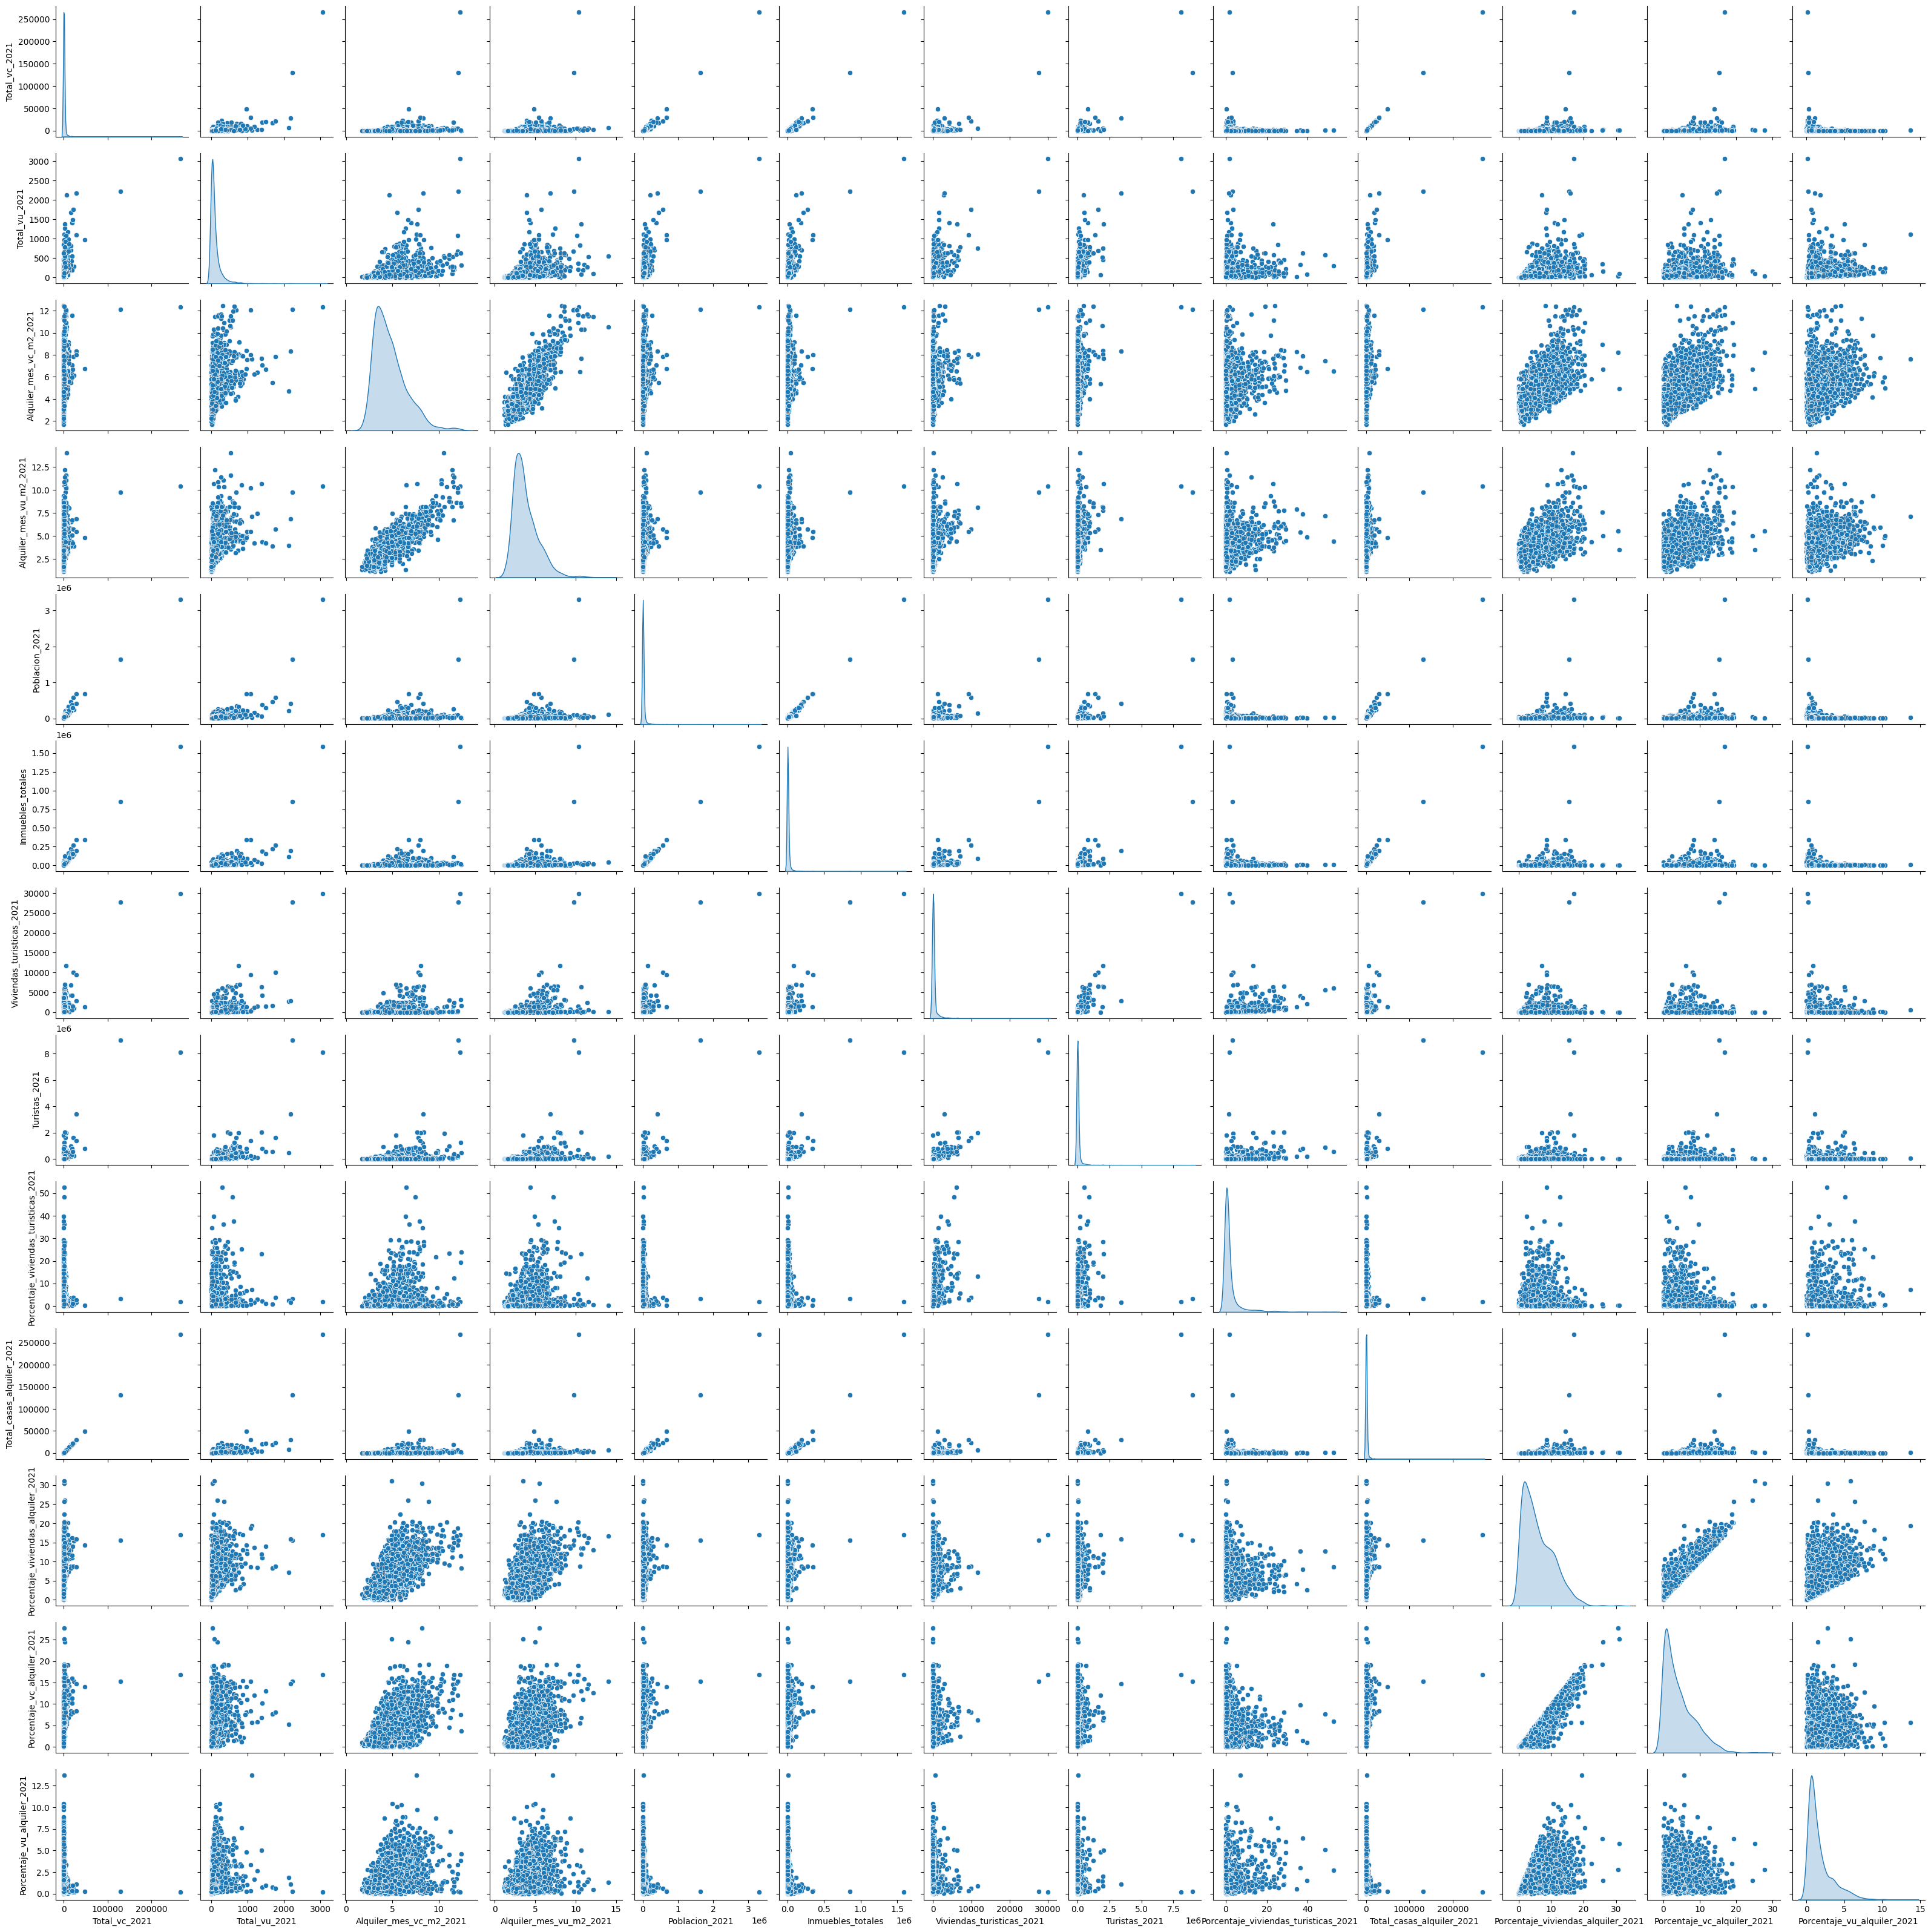

In [61]:
# Obtiene un análisis bivariante de las columnas principales del DataFrame
fn.get_bivariate_analysis(df_final)


Se puede observar en el análisis bivariante que existe una alta correlación entre los datos de viviendas colectivas con los datos de población e inmuebles totales, entre otros.

### 5.3 Análisis multivariante<a id='53'></a>  
  
Por último, se realiza un análisis multivariante de los datos. Para este análisis se realizará un gráfico de tarta donde se representarán la media de la cantidad de las viviendas turísticas, de las viviendas colectivas en alquiler y de las viviendas unifamiliares o rurales en alquiler en 2021. Se realiza con estas columnas puesto que son las más interesantes. Con este análisis se visualiza cual de todos los tipos de viviendas es el que se encuentra en mayor cantidad. Para este análisis se utiliza el método **pie()** y las columnas **Total_vc_2021**, **Total_vu_2021** y **Viviendas_turisticas_2021**.

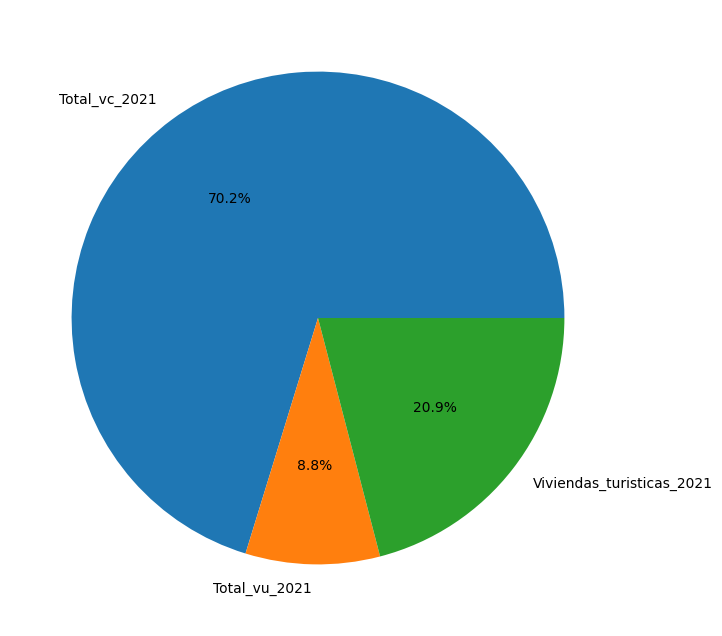

In [62]:
# Crea un gráfico de tarta
plt.figure(figsize=(8,8));
plt.pie(df_data_2020_2021[["Total_vc_2021", "Total_vu_2021", "Viviendas_turisticas_2021"]].mean().values, labels=df_data_2020_2021[["Total_vc_2021", "Total_vu_2021", "Viviendas_turisticas_2021"]].columns, autopct='%1.1f%%');


Se puede apreciar que las viviendas colectivas en alquiler son las mayoritarias, seguidas de las viviendas turísticas y por último, en menor cantidad se encuentran las viviendas unifamiliares o rurales.  
  
No se realizan más análisis multivariantes porque en el apartado siguiente, al responder a las hipótesis, se realizarán más.

### 5.4. Respondiendo las hipótesis<a id='54'></a>    
  
Una vez obtenido los análisis univariantes, bivariantes y multivariantes se comienzan a responder las hipótesis planteadas inicialmente. Las hipótesis se responderán una por una siguiendo el orden en el cual se presentaron al inicio del notebook. 

#### 5.4.1. Correlación entre alquiler y población<a id='541'></a>    
  
La primera hipótesis determina que existe una correlación entre el precio del alquiler y la población de cada municipio. Para comprobarlo, inicialmente se realiza un gráfico lineal de las columnas de **Alquiler_mes_vc_m2_2021** y **Poblacion_2021** del DataFrame final sin outliers para mejorar la visualización. Usamos los datos de 2021 porque son los últimos que tenemos. Para realizar esta gráfica se usa la función **lmplot()** de seaborn.

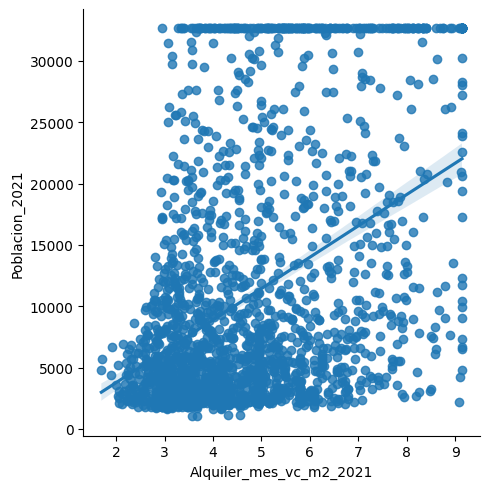

In [63]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vc_m2_2021",
           y="Poblacion_2021", data=df_final_no_out);


A simple vista, observando el gráfico lineal resultante, no parece existir una correlación, pero para asegurar este hecho, se realiza una correlación de spearman, usando el método **spearmanr()**. Se usa este método debido a que ambas variables no siguen una distribución normal. Tras usar este método, se obtiene el dato estadístico y el cual sirve para determinar si tienen correlación o no. Si este dato es superior a 0,5 se determinará que ambas variables tienen una fuerte correlación, en caso contrario se determinará que no existe correlación entre ambos datos. Se usa el dato estádistico y no el p valor porque con el p valor estaba dando problemas y datos que no tienen ninguna correlación aparecen como si las tuviera, por eso tomamos como referencia el valor estadístico en esta prueba de correlación y en el resto de pruebas de correlación del EDA.  
  
Para este test se usan los datos con los outliers.

In [64]:
# Realiza una correlación de Spearmen
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vc_m2_2021"], df_final["Poblacion_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


Este proceso se repite pero para comparar las viviendas unifamiliares o rurales en vez de las viviendas colectivas. En este caso se usarán los datos presentes en las columnas **Alquiler_mes_vu_m2_2021** y **Poblacion_2021**

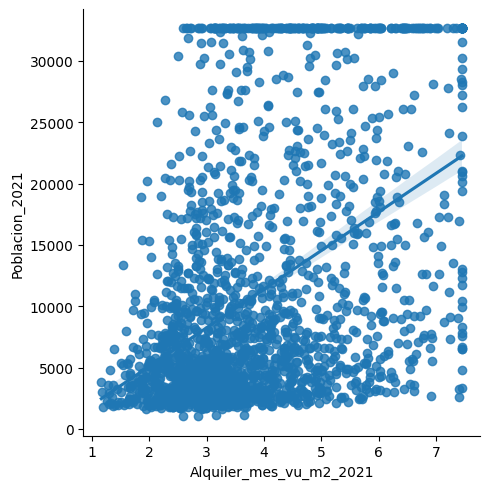

In [65]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vu_m2_2021",
           y="Poblacion_2021", data=df_final_no_out);


In [66]:
# Realiza una correlación de Spearman
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vu_m2_2021"], df_final["Poblacion_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


#### 5.4.2. Correlación entre alquiler y turismo<a id='542'></a>    
  
Para corroborar esta hipótesis se realizan los mismos análisis que en el apartado anterior, solamente que usando las columnas **Alquiler_mes_vu_m2_2021** y **Turistas_2021**.

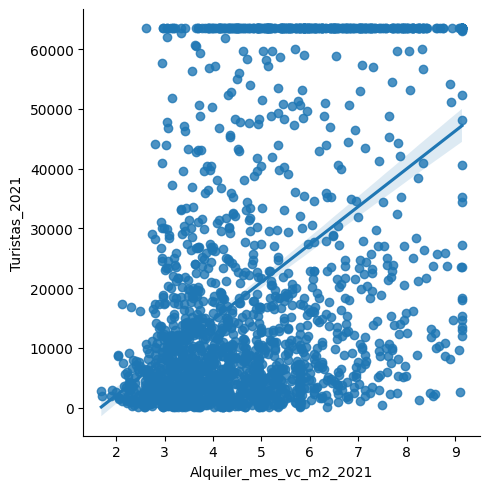

In [67]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vc_m2_2021",
           y="Turistas_2021", data=df_final_no_out);


In [68]:
# Realiza una correlación de Pearson
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vc_m2_2021"], df_final["Turistas_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


Este proceso se repite pero para comparar las viviendas unifamiliares o rurales en vez de las viviendas colectivas. En este caso se usarán los datos presentes en las columnas **Alquiler_mes_vu_m2_2021** y **Turistas_2021**.

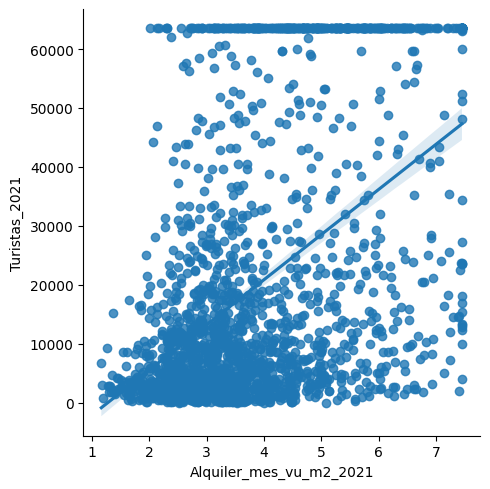

In [69]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vu_m2_2021",
           y="Turistas_2021", data=df_final_no_out);


In [70]:
# Realiza una correlación de Pearson
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vu_m2_2021"], df_final["Turistas_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


#### 5.4.3. Aumento del alquiler con el tiempo<a id='543'></a>    
  
Para esta hipótesis, se toman las columnas que indican el precio del alquiler por metro cuadrado de cada año y se realiza un gráfico de barras de la media de estos precios, usando los métodos **bar()** y **mean()**. Además, se realiza un gráfico de línea usando la función **plot()** para observar la tendencia de la media en el tiempo. Para que las dos gráficas se vean superpuestas se usa la función **subplots()**.  
  
Esta metodología se realiza primero con los precios de la vivienda colectiva, contenidos en las columnas que comienzan con el término **Alquiler_mes_vc**, y posteriormente con los precios de las viviendas unifamiliares o rurales, contenidos en las columnas que comienzan con el término **Alquiler_mes_vu**.

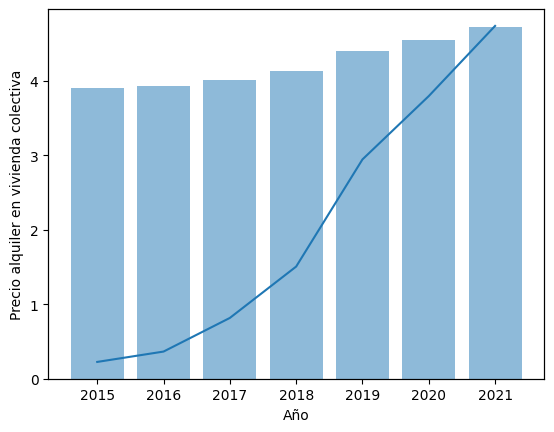

In [71]:
# lista de compresión que extrae los años del índice de columnas
años = [int(col.split("_")[-1])
        for col in df_final_no_out.filter(regex=r"^Alquiler_mes_vc")]
# Datos de la media del alquiler colectivo utilizados para el gráfico de barras
bar_data = df_final_no_out.filter(regex=r"^Alquiler_mes_vc").mean()
# Datos de la media del alquiler colectivo utilizados para el gráfico de líneas
datos = pd.DataFrame(bar_data)

# Crea una figura con 2 ejes
fig, ax1 = plt.subplots();
# Crea un gráfico de barras
plt.bar(años, bar_data, alpha=0.5);
# Etiqueta del eje x1
plt.xlabel('Año');
# Etiqueta del eje y
plt.ylabel('Precio alquiler en vivienda colectiva');

# #Crea el segundo eje x del gráfico
ax2 = ax1.twinx();
# Crear el gráfico de línea
plt.plot(años, datos);
# Elimina los números de la escala del eje y del gráfico
plt.gca().set_yticks([]);


Visualmente, parece que el precio de la vivienda aumenta con el tiempo. Sin embargo, para comprobar que no todas las variables son iguales y que al menos una variable es significativamente diferente del resto, se realiza una prueba de Friedman, la cual sirve para comparar dos o más variables no paramétricas dependientes. Para esta labor se usa la función **friedmanchisquare()** de la libreria **scipy.stats**, que está contenida dentro de la función propia denominada **get_significance_friedman()**.

In [72]:
# Obtinene si al menos uno de los grupos es significativamente diferente al resto de los grupos
fn.get_significance_friedman(df_final, "^Alquiler_mes_vc")


A menos uno de los años presenta diferencias significativas con el resto.


Realizamos el mismo proceso que anteriormente pero con las columnas que comienzan con el término **Alquiler_mes_vu**.

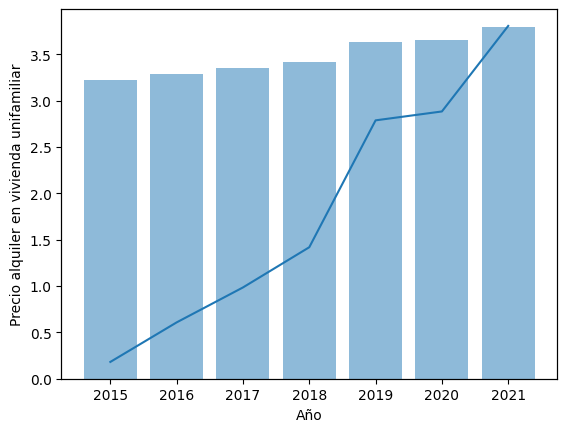

In [73]:
# lista de compresión que extrae los años del índice de columnas
años = [int(col.split("_")[-1])
        for col in df_final_no_out.filter(regex=r"^Alquiler_mes_vu")]
# Datos de la media del alquiler colectivo utilizados para el gráfico de barras
bar_data = df_final_no_out.filter(regex=r"^Alquiler_mes_vu").mean()
# Datos de la media del alquiler colectivo utilizados para el gráfico de líneas
datos = pd.DataFrame(bar_data)

# Crea una figura con 2 ejes
fig, ax1 = plt.subplots();
# Crea un gráfico de barras
plt.bar(años, bar_data, alpha=0.5);
# Etiqueta del eje x1
plt.xlabel('Año');
# Etiqueta del eje y
plt.ylabel('Precio alquiler en vivienda unifamiliar');

# #Crea el segundo eje x del gráfico
ax2 = ax1.twinx();
# Crear el gráfico de línea
plt.plot(años, datos);
# Elimina los números de la escala del eje y del gráfico
plt.gca().set_yticks([]);


Comprobamos si hay diferencias significativas entre al menos uno de los grupos.

In [74]:
# Obtinene si al menos uno de los grupos es significativamente diferente al resto de los grupos
fn.get_significance_friedman(df_final, "^Alquiler_mes_vu")


A menos uno de los años presenta diferencias significativas con el resto.


#### 5.4.4. Correlación pisos turísticos y turismo<a id='544'></a>    
  
Esta hipótesis se puede corroborar usando la metodología utilizada en el punto **[5.4.1](#541)**. Sin embargo, en este caso se usarán las columnas **Turistas_2021** y **Viviendas_turisticas_2021**.

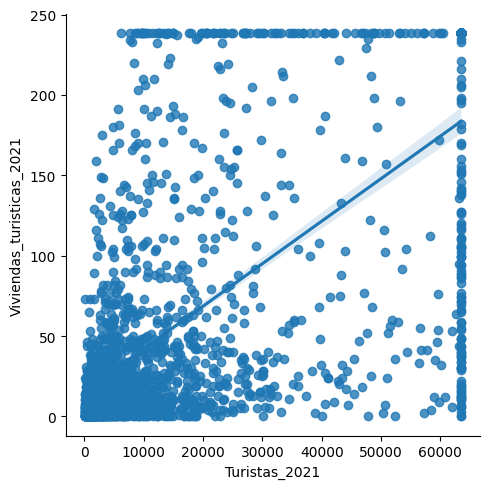

In [75]:
# Crea un gráfico lineal
sns.lmplot(x="Turistas_2021",
           y="Viviendas_turisticas_2021", data=df_final_no_out);


In [76]:
# Realiza una correlación de Pearson
sp, p_value = ss.spearmanr(
    df_final["Turistas_2021"], df_final["Viviendas_turisticas_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


Ambas variables tienen una fuerte correlación.


#### 5.4.5. Correlación pisos turísticos y alquiler<a id='545'></a>    
  
Al igual que en el apartado anterior, para corroborar esta hipótesis se debe utiliza la metodología utiliza en el punto **[5.4.1](#541)**, pero en este caso las variables con las que se trabajaran perteneceran a las columnas **Viviendas_turisticas_2021**, **Alquiler_mes_vc_m2_2021** y **Alquiler_mes_vu_m2_2021**. Primero se realizará el análisis con las viviendas colectivas y posteriormente con las viviendas unifamiliares o rurales.

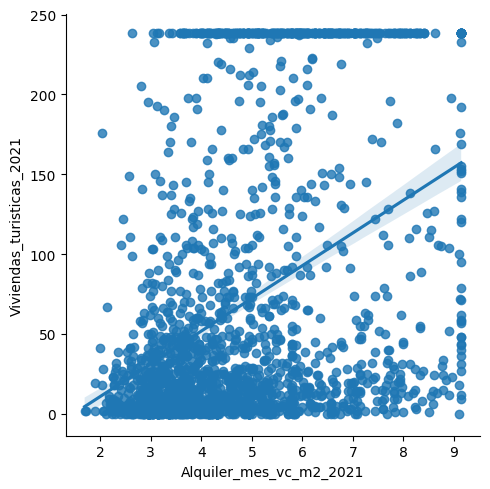

In [77]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vc_m2_2021",
           y="Viviendas_turisticas_2021", data=df_final_no_out);


In [78]:
# Realiza una correlación de Pearson
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vc_m2_2021"], df_final["Viviendas_turisticas_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


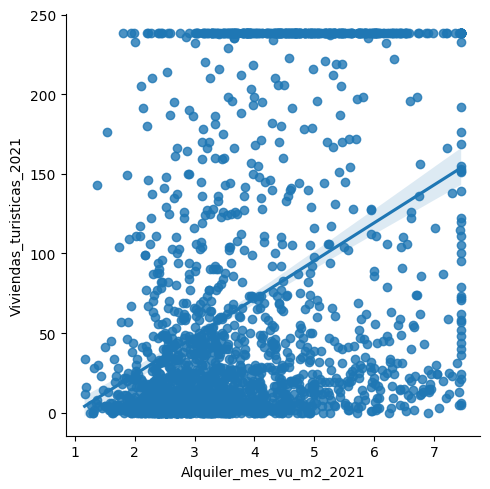

In [79]:
# Crea un gráfico lineal
sns.lmplot(x="Alquiler_mes_vu_m2_2021",
           y="Viviendas_turisticas_2021", data=df_final_no_out);


In [80]:
# Realiza una correlación de Pearson
sp, p_value = ss.spearmanr(
    df_final["Alquiler_mes_vu_m2_2021"], df_final["Viviendas_turisticas_2021"])
alpha = 0.5
if sp > alpha:
    print("Ambas variables tienen una fuerte correlación.")
else:
    print("No existe correlación significativa entre ambas variables.")


No existe correlación significativa entre ambas variables.


#### 5.4.6. El precio más alto es del municipio de mayor población<a id='546'></a>    
  
Para esta hipotesis, se toma el municipio con mayor población y el municipio con mayor alquiler de la vivienda y se compara. Para ello se utiliza la función **nlargest()**.  
  
Primero se compara el precio de la vivienda colectiva, columna **Alquiler_mes_vc_m2_2021**, con la población, columna **Poblacion_2021**. Posteriormente, se compara con la población el precio de la vivienda unifamiliar o rural, columna **Alquiler_mes_vu_m2_2021**.

In [81]:
# Municipio con la mayor población
max_poblacion = df_final["Poblacion_2021"].nlargest(1).keys()[0]
# Municipio con el alquiler más alto
max_price = df_final["Alquiler_mes_vc_m2_2021"].nlargest(1).keys()[0]

# Comparación de la población con el alquiler
if max_poblacion == max_price:
    print(
        f"El municipio con la mayor población y el alquiler más caro es el mismo y es {max_poblacion}")
else:
    print(
        f"El municipio con la mayor población no es el mismo que el municipio con el mayor alquiler.\n\tMayor población: {max_poblacion}\n\tMayor alquiler: {max_price}")


El municipio con la mayor población no es el mismo que el municipio con el mayor alquiler.
	Mayor población: Madrid
	Mayor alquiler: Formentera


Repetimos el proceso para las viviendas unifamiliares o rurales.

In [82]:
# Municipio con la mayor población
max_poblacion = df_final["Poblacion_2021"].nlargest(1).keys()[0]
# Municipio con el alquiler más alto
max_price = df_final["Alquiler_mes_vu_m2_2021"].nlargest(1).keys()[0]

# Comparación de la población con el alquiler
if max_poblacion == max_price:
    print(
        f"El municipio con la mayor población y el alquiler más caro es el mismo y es {max_poblacion}")
else:
    print(
        f"El municipio con la mayor población no es el mismo que el municipio con el mayor alquiler.\n\tMayor población: {max_poblacion}\n\tMayor alquiler: {max_price}")


El municipio con la mayor población no es el mismo que el municipio con el mayor alquiler.
	Mayor población: Madrid
	Mayor alquiler: Alcobendas


#### 5.4.7. Diferencia significativa entre alquiler de vivienda colectiva y alquiler de vivienda unifamiliar o rural<a id='547'></a>    
  
Para comparar estas dos variables, inicialmente se procede a realizar una prueba más visual y se realizan dos diagramas de cajas usando la función **boxplot()** de la librería de **seaborn**. En este caso, se aplica la función a las columnas **Alquiler_mes_vc_m2_2021** y **Alquiler_mes_vu_m2_2021**.

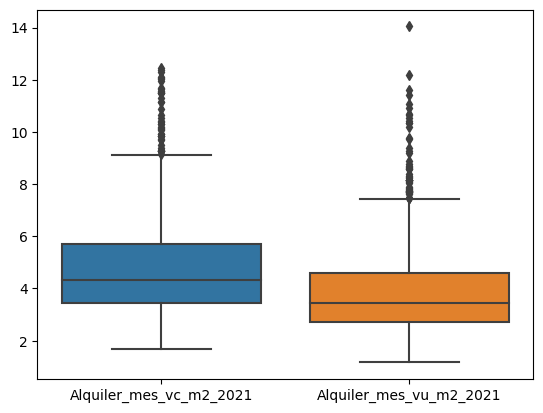

In [83]:
sns.boxplot(df_final[["Alquiler_mes_vc_m2_2021", "Alquiler_mes_vu_m2_2021"]]);


A simple vista,se observa que hay diferencia de precio entre ambos tipos de viviendas, no obstante, no existe mucha, por lo que se ralizara un test de Mann-Whitney para confirmar si esta hipótesis es cierta o no. Se realiza este test porque ambas variables son independientes y no paramétricas y se utiliza la función **mannwhitneyu()** de la librería **scipy.stats**.

In [84]:
vc = df_final["Alquiler_mes_vc_m2_2021"]
vu = df_final["Alquiler_mes_vu_m2_2021"]

U, p_valor = ss.mannwhitneyu(vc, vu)

alpha = 0.05
if p_valor < alpha:
    print("Las medianas de ambas variables son significativamente diferentes.")
else:
    print("Las medianas de ambas variables no son significativamente diferentes.")


Las medianas de ambas variables son significativamente diferentes.


#### 5.4.8. Diferencia entre pisos turísticos y pisos de alquiler dependiente del turismo<a id='548'></a>    
  
Para comprobar esta hipótesis, inicialmente se realiza un boxplot de las columnas **Viviendas_turisticas_2021**, **Total_casas_alquiler_2021** y **Turistas_2021**, usando la función **boxplot()**, para comprobar visualmente si existe una diferencia significativa.  
  
Además, se realiza un pair plot de estas columnas usando la función **pairplot()** y se comprueba si existe una correlación entre ellas usando la función **spearmanr()** para realizar un test de Spearman del mismo modo que lo hemos realizado anteriormente. 
  
Aparentemente, se observa una diferencia significativa entre ambos grupos y una fuerte correlació entre ellos, sin embargo, se comprueba esta hipótesis y si esta posible diferencia depende de la columna **Turistas_2021** analizando si existe una diferencia significativa entre ambas columnas mediante un test de Mann-Whitney usando la formula **mannwhitneyu()**. En caso de que no exista una diferencia significativa se explora si existe una diferencia significativa entre estas columnas con la variable **Turistas_2021** usando un test de Kruskal-Wallis mediante la función **kruskal()**.  
  
Tras esta comprobación, se obtienen los valores únicos de la variable **Turistas_2021** usando la función **unique()**, y los valores de **Viviendas_turisticas_2021** y **Total_casas_alquiler_2021** para cada valor único de la columna de turistas. Se hace un test de Mann-Whitney para los datos de estas dos últimas variables con cada valor único de la variable de turistas, usando de nuevo la fórmula **mannwhitneyu()**.  
  
Finalmente, se observan los p valores de este último análisis obtenido y se comprueba si existen diferencias significativas entre ambas columnas dependiente de la columna **Turistas_2021**.  
  
Todos estos análisis están contenidos dentro de la función propia **get_difference_in_terms()**. En esta función, los gráficos se realizaran con los datos sin outliers para mejorar la visualización, sin embargo, el resto de análisis se realizan con los datos con outliers.

La correlación de Spearman entre Viviendas_turisticas_2021 y Total_casas_alquiler_2021 es significativa
La correlación de Spearman entre Viviendas_turisticas_2021 y Turistas_2021 es significativa
La correlación de Spearman entre Total_casas_alquiler_2021 y Turistas_2021 es significativa
La correlación de Spearman entre Turistas_2021 y Total_casas_alquiler_2021 es significativa
Ninguna muestra es significativamente diferente dependiendo de Turistas_2021
Número de muestras paquetes de muestras que son significativamente diferentes y dependientes de Turistas_2021: 0
Porcentaje del número de muestras paquetes de muestras que son significativamente diferentes y dependientes de Turistas_2021 respecto del total: 0.0 %
Media de los p-value de cada paquete de muestras a explorar en el test: 0.978606410994313


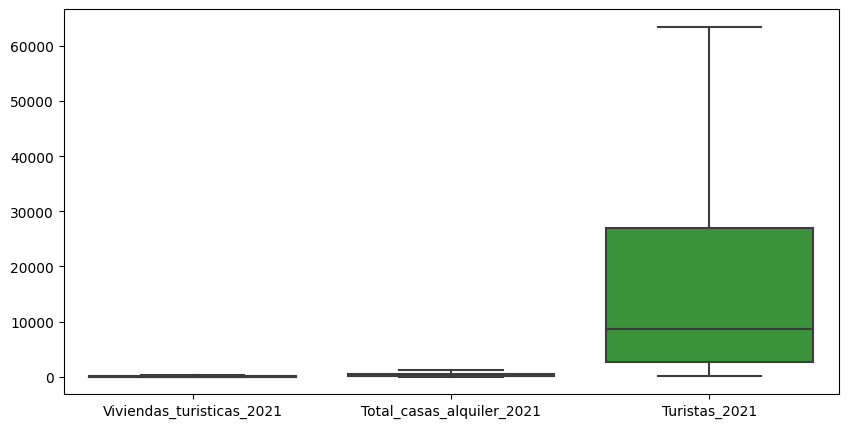

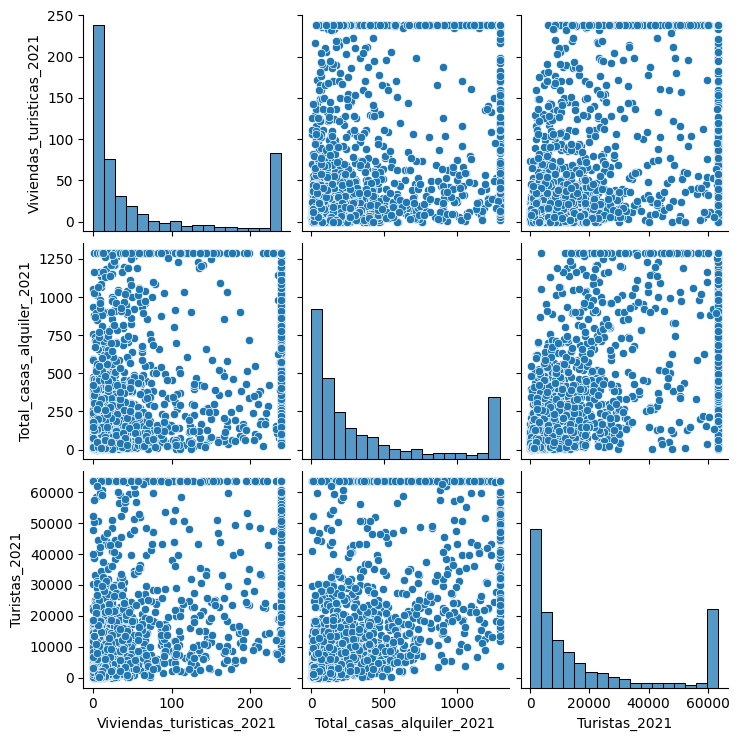

In [85]:
# Determina si las columnas Viviendas_turisticas_2021 tiene una diferencia significativa con la columna Total_casas_alquiler_2021 y dependiente de la columna Turistas_2021

df_pvalues, df_diferencias = fn.get_difference_in_terms(df_final, df_final_no_out,[
                           "Viviendas_turisticas_2021", "Total_casas_alquiler_2021"], "Turistas_2021")


In [86]:
# p_values de la diferencia significativa entre variables
df_pvalues

Viviendas_turisticas_2021 Total_casas_alquiler_2021  \
Viviendas_turisticas_2021                       1.0                       0.0   
Total_casas_alquiler_2021                       0.0                       1.0   
Turistas_2021                                   0.0                       0.0   

                          Turistas_2021  
Viviendas_turisticas_2021           0.0  
Total_casas_alquiler_2021           0.0  
Turistas_2021                       1.0

In [87]:
# Diferencia significativa entre variables
df_diferencias

Viviendas_turisticas_2021  \
Viviendas_turisticas_2021  Diferencia no significativa   
Total_casas_alquiler_2021     Diferencia significativa   
Turistas_2021                 Diferencia significativa   

                             Total_casas_alquiler_2021  \
Viviendas_turisticas_2021     Diferencia significativa   
Total_casas_alquiler_2021  Diferencia no significativa   
Turistas_2021                 Diferencia significativa   

                                         Turistas_2021  
Viviendas_turisticas_2021     Diferencia significativa  
Total_casas_alquiler_2021     Diferencia significativa  
Turistas_2021              Diferencia no significativa

## 6. Conclusiones<a id='6'></a>  

Las conclusiones obtenidas con el análisis exploratorio de datos son:  
  
----
- **No** existe una correlación entre el **precio del alquiler por metro cuadrado** y la **población** de los municipios.
- **No** existe una correlación entre el **precio del alquiler por metro cuadrado** y la cantidad de **turismo** recibido.
- El **precio del alquiler por metro cuadrado aumenta** con el tiempo de forma significativa.
- **Existe** una correlación entre la cantidad de **turismo** recibido y la cantidad de **viviendas turísticas**.
- **No** existe una correlación entre el **precio del alquiler por metro cuadrado** y la cantidad de **viviendas turísticas**.
- El **precio más alto** del alquiler por metro cuadrado **no** se da en el municipio con **mayor población**.
- El **precio del alquiler por metro cuadrado** de las viviendas **colectivas** es significativamente mayor que el de las viviendas **unifamiliares o rurales**.
- Existe una correlación entre las **viviendas turisticas** y las **casas totales en alquiler** y entre el **turismo** recibido y las **casas totales en alquiler**.
- La diferencia significativa que se da entre la cantidad de **viviendas turísticas** y la cantidad de **casas totales en alquiler no** depende del **turismo**. Sin embargo, la cantidad de **turismo** recibido **sí** depende de la cantidad de **viviendas turísticas** y la cantidad de **casas totales en alquiler**. Por tanto, esto quiere decir que la cantidad de **turismo** recibido depende de la cantidad de **viviendas turísticas** y la cantidad de **casas totales en alquiler** pero no al revés.
----